## Ramsey Simulations

## Helper Functions

In [1]:
import numpy as np 
from scipy.io import loadmat
transition_strengths = np.array([[np.nan, 0.0563, 0.055, 0.0519, 0.0341],
                        [0.0753, 0.0246, 0.0096, 0.0336, 0.056],
                        [0.053, 0.0598, 0.047, 0.0355, np.nan],
                        [np.nan, np.nan, 0.1103, 0.1061, 0.0819],
                        [np.nan, 0.1273, 0.0275, 0.0613, 0.0981],
                        [0.0973, 0.0635, 0.0919, 0.0258, 0.0932],
                        [0.1163, 0.0281, 0.0575, 0.107, np.nan],
                        [0.1105, 0.1056, 0.0814, np.nan, np.nan],
                        [np.nan, np.nan, np.nan, 0.2813, 0.0091],
                        [np.nan, np.nan, 0.2288, 0.1549, 0.0415],
                        [np.nan, 0.1517, 0.2135, 0.0697, 0.0446],
                        [0.0763, 0.2008, 0.1741, 0.003, 0.0359],
                        [0.1367, 0.2351, 0.0773, 0.039, np.nan],
                        [0.2241, 0.1763, 0.0106, np.nan, np.nan],
                        [0.268, 0.0634, np.nan, np.nan, np.nan],
                        [np.nan, np.nan, np.nan, np.nan, 0.3278],
                        [np.nan, np.nan, np.nan, 0.0828, 0.268],
                        [np.nan, np.nan, 0.0019, 0.1664, 0.234],
                        [np.nan, 0.025, 0.0679, 0.2278, 0.1523],
                        [0.0232, 0.001, 0.156, 0.2077, 0.0915],
                        [0.0309, 0.0593, 0.206, 0.1694, np.nan],
                        [0.0276, 0.1438, 0.2401, np.nan, np.nan],
                        [0.0094, 0.2862, np.nan, np.nan, np.nan],
                        [0.3278, np.nan, np.nan, np.nan, np.nan]])

import numpy as np

transition_strengths = np.loadtxt('Z:\Lab Data\Phase_and_freq_correction_180Hz\Transition_strengths_4p216.txt',delimiter=',')  # Assumes space-delimited file
transition_strengths[transition_strengths == 0] = np.nan
# print(transition_strengths)


pi_t = [18.622, 31.746, 37.865, 27.596, 36.429]
strengths = np.array([transition_strengths[23,0],transition_strengths[14,0],transition_strengths[17,4],transition_strengths[16,4],transition_strengths[15,4]])
pitime_n2 = pi_t[0] # [-2, 4, -4]
pitime_n1 = pi_t[1] # [-2, 3, -3]
pitime_0 = pi_t[2] # [2, 4, 2]
pitime_p1 = pi_t[3] # [2, 4, 3]
pitime_p2 = pi_t[4] # [2, 4, 4]

pi_t = np.array([pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2])
factors = pi_t * strengths
Fs = [1,2,3,4]
row_labels = []
for i in Fs:
    for j in range(2*i+1):
        mF = i-j
        row_labels.append([i,mF])
col_labels = [-2, -1, 0, 1, 2]

pi_times = np.zeros((24,5))
for i in range(np.shape(transition_strengths)[0]):
    for j in range(np.shape(transition_strengths)[1]):
        # print(i,j)
        if not np.isnan(transition_strengths[i,j]):

            delta_m = (row_labels[i][1]-col_labels[j])+2

            pi_times[i,j] = factors[delta_m]/transition_strengths[i,j]
print(pi_times)
def get_pi_times(transitions,matrix = pi_times):
    pi_times_list = []
    for transition in transitions:
        row_label = [transition[1],transition[2]]
        Fs = [1,2,3,4]
        states = []
        for i in Fs:
            for j in range(2*i+1):
                mF = i-j
                states.append([i,mF])
    
        row_labels = states
    
        col_label = transition[0]
    
        # Find the index of the row label
        row_index = next((i for i, label in enumerate(row_labels) if label == row_label), None)
        # Find the index of the column label
        col_index = col_labels.index(col_label)
        
        if row_index is not None and col_index in range(len(col_labels)):
            pi_times_list.append(matrix[row_index, col_index])
        else:
            pi_times_list.append(np.nan)

    return pi_times_list

def get_pulse_schedule(rabi_freqs, fractions):
    if len(rabi_freqs) != len(fractions):
        raise ValueError("rabi_freqs and fractions must have the same length.")
    
    times = []
    t_current = 0.0  # microseconds (start at time=0)
    
    for Omega, frac in zip(rabi_freqs, fractions):
        if not 0 <= frac <= 1:
            raise ValueError(f"Fraction must be between 0 and 1, got {frac}.")
        
        # Calculate the rotation angle and the pulse duration
        theta = 2.0 * np.arcsin(np.sqrt(frac))   # in radians
        t_pulse = theta / Omega if Omega > 0 else 0.0  # microseconds (if Omega in MHz)
        
        # The pulse starts at t_current, ends at t_current + t_pulse
        t_start = t_current
        t_end = t_current + t_pulse
        
        times.append((t_start, t_end))
        t_current = t_end  # next pulse starts after this one finishes
    
    return times

mat_data = loadmat('sensitivity_matrix_4p216G.mat')

matrix_sen_24x5 = mat_data['S']
matrix_sen_24x5[np.isnan(transition_strengths)] = np.nan
np.savetxt('sensitivities_4p216.txt',matrix_sen_24x5, delimiter=',')
sens_matrix = np.loadtxt('Z:\Lab Data\Phase_and_freq_correction_180Hz\sensitivities_4p216.txt',delimiter=',')
print(sens_matrix)
# print(matrix_sen_24x5)

[[   0.          211.9322501   134.46824927  170.80710206  249.8197383 ]
 [ 158.67999176  301.16549727  921.45526918  253.17624047  108.98500926]
 [ 139.52333084  148.14607451  181.16403349  171.87311245    0.        ]
 [   0.            0.          108.23055675   69.68854243  108.16046645]
 [   0.           93.77573445  268.8374713   144.6413757    86.74807471]
 [ 122.70543703  116.4129164    96.40360429  329.79550561   65.47951644]
 [  63.61091827  314.75453041  147.92715683   57.05244149    0.        ]
 [  80.1717235    80.57107542   75.00681767    0.            0.        ]
 [   0.            0.            0.           42.44279842  816.89796011]
 [   0.            0.           52.18745061   47.73855147  213.54373172]
 [   0.           78.71729484   34.64748359  127.12049517  190.86212989]
 [ 156.52264106   36.83116196   50.89949487 2802.28634035  170.05153014]
 [  54.1229026    37.67897927  110.12364584  156.61516797    0.        ]
 [  39.54078846   48.26913817  577.36344243    0.  

In [2]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.colors import Normalize
# from matplotlib.cm import ScalarMappable

# ket_lables_row = []
# for i in row_labels:
#     ket_lables_row.append(rf'|˜F=i[0],m˜F=i[1]⟩|\tilde{{F}} = {i[0]},m_\tilde{{F}} = {i[1]} \rangle')

# ket_lables_col = []
# for i in col_labels:
#     ket_lables_col.append(rf'|F=2,mF=i⟩|{{F}} = 2,m_{{F}} = {i} \rangle')


# # Create figure and set size
# fig, ax = plt.subplots(figsize=(10, 12))
# cax = ax.imshow(np.log(pi_times), aspect='auto', cmap='viridis_r')

# # Add labels
# ax.set_xticks(np.arange(len(col_labels)))
# ax.set_yticks(np.arange(len(row_labels)))
# ax.set_xticklabels(ket_lables_col, rotation=15, ha='center', fontsize=10)
# ax.set_yticklabels(ket_lables_row, fontsize=10)

# # # Annotate each cell with the numerical value
# norm = Normalize(vmin=pi_times.min(), vmax=pi_times.max())
# sm = ScalarMappable(norm=norm, cmap='viridis')

# for i in range(len(row_labels)):
#     for j in range(len(col_labels)):
#         value = pi_times[i, j]
#         color = sm.to_rgba(value)
#         luminance = (0.299 * color[0] + 0.587 * color[1] + 0.114 * color[2])
#         text_color = 'white' if value > 800 else 'black'
#         if value >0.1:
#             ax.text(j, i, f'{value:.2f}', ha='center', va='center', color=text_color, fontsize=10)

# # Add colorbar
# # cbar = fig.colorbar(cax)

# # Set title
# ax.set_title(r'tπt_\pi - times [μs\mu s]', fontsize=12)
# plt.savefig('pi_times.svg')
# plt.show()


In [3]:
%matplotlib widget

In [4]:
def assign_states(transitions):
    unique_states = {}
    state_counter = 0

    # for path in transitions:
    for transition in transitions:
        from_state = (transition[0],)
        to_state = tuple(transition[1:])
        if from_state not in unique_states:
            unique_states[from_state] = state_counter
            state_counter += 1
        if to_state not in unique_states:
            unique_states[to_state] = state_counter
            state_counter += 1

    return unique_states

def translate_transitions(transitions, unique_states):
    all_couplings = []

    translated_path = []
    for transition in transitions:
        from_state = (transition[0],)
        to_state = tuple(transition[1:])
        translated_from = unique_states[from_state]
        translated_to = unique_states[to_state]
        translated_path.append((translated_from, translated_to))
        all_couplings.append((translated_from, translated_to))

    return all_couplings


## Defining the pulse sequence

In [9]:
# d = 4
# initial_state = [[-2, 3, -1]]

# pulse_train_U1 = [[-2, 3, -2], [-2, 3, -3], [-2, 4, -4]]
# fractions_U1 = [0.25, 0.3333333333333333, 0.5]
# simulated_phase_mask_U1 = [0, 0, 0]
# fixed_phase_mask_U1 = [0, 0, 0]

# pulse_train_U2 = [[-2, 4, -4], [-2, 3, -3], [-2, 3, -2]]
# fractions_U2 = [0.5, 0.3333333333333333, 0.25]
# simulated_phase_mask_U2 = [3, 2, 1]
# fixed_phase_mask_U2 = [1, 1, 1]

# probe_trans = [[-2, 3, -2], [-2, 3, -3], [-2, 4, -4]]

#d = 8
# initial_state = [[-1, 3, -1]]

# pulse_train_U1 = [[-1, 3, -1] ,[-1, 3, -1], [-1, 2, -2], [-2, 3, -1], [-1, 3, -1], [-1, 4, -2], [0, 3, -1], [0, 4, -1], [0, 3, -1], [0, 4, 0], [1, 3, -1], [-1, 3, -1], [-1, 3, -2]]
# fractions_U1 = [1, 0.125, 1, 0.1428571428571429, 0.16666666666666663, 1, 0.19999999999999996, 1, 0.25, 1, 0.33333333333333337, 0.5, 1]
# simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# fixed_phase_mask_U1 = [0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]

# pulse_train_U2 = [[-1, 3, -2], [-1, 3, -1], [-1, 3, -2], [1, 3, -1], [0, 4, 0], [0, 3, -1], [0, 4, 0], [0, 4, -1], [0, 3, -1], [0, 4, -1], [-1, 4, -2], [-1, 3, -1], [-1, 4, -2], [-2, 3, -1], [-1, 2, -2], [-1, 3, -1], [-1, 2, -2]]
# fractions_U2 = [1, 0.5, 1, 0.33333333333333337, 1, 0.25, 1, 1, 0.19999999999999996, 1, 1, 0.16666666666666663, 1, 0.1428571428571429, 1, 0.125, 1]
# simulated_phase_mask_U2 = [0, 7, 0, 6, 0, 5, 0, 0, 4, 0, 0, 3, 0, 2, 0, 1, 0]
# fixed_phase_mask_U2 = [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]

# s12_state_shelvings = [[-2, 4, -4], [1, 4, 1]]

# probe_trans = [[-1, 3, -1], [0, 2, -2], [-2, 4, -4], [0, 4, -2], [1, 4, -1], [1, 4, 0], [1, 4, 1], [-2, 3, -2]]

# pulse_train_U2 = pulse_train_U2 + s12_state_shelvings
# fractions_U2 = fractions_U2 + [1 for i in range(len(s12_state_shelvings))]
# simulated_phase_mask_U2 = simulated_phase_mask_U2 + [0 for i in range(len(s12_state_shelvings))]
# fixed_phase_mask_U2 = fixed_phase_mask_U2 + [0 for i in range(len(s12_state_shelvings))]

# d = 5

initial_state = [[0,3,-1]]
pulse_train_U1 = [[0, 3, -1], [0, 4, 0], [0, 3, -1], [0, 4, -1], [1, 3, -1], [-1, 3, -1], [-1, 2, -2]]
fractions_U1 =  [0.2, 1, 0.25, 1, 0.3333333333333333, 0.5, 1]
simulated_phase_mask_U1 = [0,0, 0, 0, 0,0,0]
fixed_phase_mask_U1 = [1, 0, 1, 0, 1, 1, 0]
probe_trans = [[0,4,-1],[-1,2,-2],[0,3,-1]]
pulse_train_U2 =  [[-1, 2, -2], [-1, 3, -1], [-1, 2, -2], [1, 3, -1], [0, 4, -1], [0, 3, -1], [0, 4, -1], [0, 4, 0], [0, 3, -1], [0, 4, 0], [1, 4, 1], [-1,2,-2]]
fractions_U2 = [1, 0.5, 1, 0.3333333333333333, 1, 0.25, 1, 1, 0.2, 1, 1, 1]
simulated_phase_mask_U2 = [0, 4, 0, 3, 0, 2, 0, 0, 1, 0, 0, 0]
fixed_phase_mask_U2 = [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]


# initial_state = [[0, 2, 0]]

# pulse_train_U1 = [[0, 2, 0], [0, 2, -2]]
# fractions_U1 = [0.5, 1]
# simulated_phase_mask_U1 = [0, 0]
# fixed_phase_mask_U1 = [1, 0]

# pulse_train_U2 = [[0, 2, -2], [0, 2, 0], [0, 2, -2]]
# fractions_U2 = [1, 0.5, 1]
# simulated_phase_mask_U2 = [0, 1, 0]
# fixed_phase_mask_U2 = [1, 0, 0]

# s12_state_shelvings = []

# probe_trans = [[0, 2, 0], [0, 2, -2]]

# initial_state = [[0,2,-2]]
# pulse_train_U1 = [[0,2,-2],[2,1,1]]
# fractions_U1 = [0.5, (np.sin((100/287.8736)*(np.pi/2)))**2]
# simulated_phase_mask_U1 = [0, 0]
# fixed_phase_mask_U1 = [0, 0]
# probe_trans = [[0,2,-2]]
# pulse_train_U2 =  [[0,2,-2]]
# fractions_U2 = [0.5]
# simulated_phase_mask_U2 = [1]
# fixed_phase_mask_U2 = [1]

# initial_state = [[0, 2, 0]]

# pulse_train_U1 = [[0, 2, 0], [0, 2, -2], [0, 2, 0], [0, 3, 0], [-1, 2, 0], [-1, 4, -3]]
# fractions_U1 = [0.25, 1, 0.33333333333333337, 1, 0.5, 1]
# simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0]
# fixed_phase_mask_U1 = [1, 0, 1, 0, 1, 0]

# pulse_train_U2 = [[-1, 4, -3], [-1, 2, 0], [-1, 4, -3], [0, 3, 0], [0, 2, 0], [0, 3, 0], [0, 2, -2], [0, 2, 0], [0, 2, -2]]
# fractions_U2 = [1, 0.5, 1, 1, 0.33333333333333337, 1, 1, 0.25, 1]
# simulated_phase_mask_U2 = [0, 3, 0, 0, 2, 0, 0, 1, 0]
# fixed_phase_mask_U2 = [1, 0, 0, 1, 0, 0, 1, 0, 0]


# initial_state = [[0, 2, 0]]

# pulse_train_U1 = [[0, 2, 0], [0, 2, 2], [-1,4,0]]
# fractions_U1 = [0.5, 1,(np.sin((10/8068.944)*(np.pi/2)))**2]
# simulated_phase_mask_U1 = [0, 0, 0]
# fixed_phase_mask_U1 = [1, 0, 0]

# pulse_train_U2 = [[0, 2, 2], [0, 2, 0]]
# fractions_U2 = [1, 0.5]
# simulated_phase_mask_U2 = [0, 1]
# fixed_phase_mask_U2 = [1, 0]

# s12_state_shelvings = []

# probe_trans = [[0, 2, 0], [0, 2, 2]]

# initial_state = [[0, 1, 0]]

# pulse_train_U1 = [[0, 3, -2], [0, 2, 1], [0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, 0], [0, 2, -2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
# fractions_U1 = [0.058823529411764705, 0.0625, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
# simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 0], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1], [0, 2, 1], [0, 3, -2]]
# fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 0.058823529411764705]
# simulated_phase_mask_U2 = [16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
# fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# s12_state_shelvings = []
# s12_state_fractions = []
# s12_state_fixed_phases = []
# s12_state_simulated_phases = []

# probe_trans = [[-2, 3, -2]]

# initial_state = [[-1, 3, -1]]

# pulse_train_U1 = [[-1, 3, -1], [-1, 2, -2], [-2, 3, -1], [-2, 2, -1], [-1, 3, -1], [-1, 4, -2], [-1, 3, -1], [-1, 3, -2], [0, 3, -1], [0, 4, -1], [0, 3, -1], [0, 4, 0], [-2, 3, -1], [-2, 3, -3]]
# fractions_U1 = [0.125, 1, 0.1428571428571429, 1, 0.16666666666666663, 1, 0.19999999999999996, 1, 0.25, 1, 0.33333333333333337, 1, 0.5, 1]
# simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# fixed_phase_mask_U1 = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

# pulse_train_U2 = [[-2, 3, -3], [-2, 3, -1], [-2, 3, -3], [0, 4, 0], [0, 3, -1], [0, 4, 0], [0, 4, -1], [0, 3, -1], [0, 4, -1], [-1, 3, -2], [-1, 3, -1], [-1, 3, -2], [-1, 4, -2], [-1, 3, -1], [-1, 4, -2], [-2, 2, -1], [-2, 3, -1], [-2, 2, -1], [-1, 2, -2], [-1, 3, -1], [-1, 2, -2]]
# fractions_U2 = [1, 0.5, 1, 1, 0.33333333333333337, 1, 1, 0.25, 1, 1, 0.19999999999999996, 1, 1, 0.16666666666666663, 1, 1, 0.1428571428571429, 1, 1, 0.125, 1]
# simulated_phase_mask_U2 = [0, 7, 0, 0, 6, 0, 0, 5, 0, 0, 4, 0, 0, 3, 0, 0, 2, 0, 0, 1, 0]
# fixed_phase_mask_U2 = [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]

# s12_state_shelvings = []

# probe_trans = [[-1, 3, -1], [0, 2, -2], [1, 2, -1], [0, 4, -2], [-2, 3, -2], [1, 4, -1], [1, 4, 0], [-2, 3, -3]]

initial_state = [[-2, 2, -1]]

pulse_train_U1 = [[-2, 3, -1], [-2, 3, -2], [-2, 3, -3], [-2, 4, -4]]
fractions_U1 = [0.2, 0.25, 0.3333333333333333, 0.5]
simulated_phase_mask_U1 = [0, 0, 0, 0]
fixed_phase_mask_U1 = [0, 0, 0, 0]

pulse_train_U2 = [[-2, 4, -4], [-2, 3, -3], [-2, 3, -2], [-2, 3, -1]]
fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2]
simulated_phase_mask_U2 = [4, 3, 2, 1]
fixed_phase_mask_U2 = [1, 1, 1, 1]

s12_state_shelvings = []
s12_state_fractions = []
s12_state_fixed_phases = []
s12_state_simulated_phases = []

probe_trans = [[-1, 3, -1], [-2, 3, -2], [-2, 3, -3], [-2, 4, -4]]

initial_state = [[-2, 4, -4]]

pulse_train_U1 = [[-2,4,-4], [-2,3,-3], [-2,2,-2], [0,2,-2], [0, 3, -2], [0, 2, 1], [0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, 0], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
fractions_U1 = [0.05555555555555555, 0.058823529411764705, 1, 1, 0.0625, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
fixed_phase_mask_U1 = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, 0], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1], [0, 2, 1], [0, 3, -2], [0, 2, -2], [-2, 2, -2], [-2, 3, -3], [-2, 4, -4]]
fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 1, 1, 0.058823529411764705, 0.05555555555555555]
simulated_phase_mask_U2 = [17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 0, 0, 2, 1]
fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]

s12_state_shelvings = []
s12_state_fractions = []
s12_state_fixed_phases = []
s12_state_simulated_phases = []

probe_trans = [[-2,4,-4], [-2,3,-3],[-2, 3, -2], [2, 2, 1], [-2, 1, -1], [1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [2, 2, 0], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]


initial_state = [[2, 4, 3]]

pulse_train_U1 = [[2,4,3], [2,4,4], [2,2,0], [0,2,0], [0, 3, -2], [0, 2, 1], [0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, -2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
fractions_U1 = [0.05555555555555555, 0.058823529411764705, 1, 1, 0.0625, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
fixed_phase_mask_U1 = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1], [0, 2, 1], [0, 3, -2], [0, 2, 0], [2, 2, 0], [2, 4, 4], [2, 4, 3]]
fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 1, 1, 0.058823529411764705, 0.05555555555555555]
simulated_phase_mask_U2 = [17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 0, 0, 2, 1]
fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]

s12_state_shelvings = []
s12_state_fractions = []
s12_state_fixed_phases = []
s12_state_simulated_phases = []

probe_trans = [[2,4,3], [2,4,4],[-2, 3, -2], [2, 2, 1], [-2, 1, -1], [1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [2, 2, 0], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]


full_pulse_train = pulse_train_U1 + pulse_train_U2
full_fractions = fractions_U1 + fractions_U2
full_fixed_phases = fixed_phase_mask_U1 + fixed_phase_mask_U2
full_simulated_phases = simulated_phase_mask_U1 + simulated_phase_mask_U2


pi_times_list = get_pi_times(full_pulse_train)
sens_list = get_pi_times(full_pulse_train,matrix_sen_24x5)
rabi_frequencis_list = np.pi/np.array(pi_times_list)
print(assign_states(full_pulse_train))
print(translate_transitions(full_pulse_train,assign_states(full_pulse_train)))

{(2,): 0, (4, 3): 1, (4, 4): 2, (2, 0): 3, (0,): 4, (3, -2): 5, (2, 1): 6, (1, -1): 7, (2, -1): 8, (1, 1): 9, (3, -1): 10, (4, 1): 11, (2, 2): 12, (2, -2): 13, (4, 0): 14, (3, 2): 15, (3, 0): 16, (4, -1): 17, (3, 1): 18, (4, -2): 19}
[(0, 1), (0, 2), (0, 3), (4, 3), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (4, 19), (4, 18), (4, 17), (4, 16), (4, 15), (4, 14), (4, 13), (4, 12), (4, 11), (4, 10), (4, 9), (4, 8), (4, 7), (4, 6), (4, 5), (4, 3), (0, 3), (0, 2), (0, 1)]


In [10]:
sens_list

[1.1209650983801112,
 2.799248982228164,
 -1.39984438646934,
 5.830770533066243e-05,
 -1.2709188922599424,
 1.604375406714098,
 -2.6470005059309187,
 -1.5180249556578929,
 3.168970156366413,
 -0.09739998404256767,
 -0.19897855509043438,
 3.2573641647104523,
 -2.876468356589612,
 -1.3871685814592638,
 3.2013259169616504,
 1.0361749036746914,
 -2.4666051922395127,
 2.138190620826208,
 -3.420397993068036,
 -3.420397993068036,
 2.138190620826208,
 -2.4666051922395127,
 1.0361749036746914,
 3.2013259169616504,
 -1.3871685814592638,
 -2.876468356589612,
 3.2573641647104523,
 -0.19897855509043438,
 -0.09739998404256767,
 3.168970156366413,
 -1.5180249556578929,
 -2.6470005059309187,
 1.604375406714098,
 -1.2709188922599424,
 5.830770533066243e-05,
 -1.39984438646934,
 2.799248982228164,
 1.1209650983801112]

In [13]:
print(pi_times_list)

[27.596, 36.429, 65.47951644138875, 96.40360429490099, 577.3634424280433, 268.8374712970833, 181.16403348999205, 147.92715682980554, 134.46824927404052, 110.12364584170972, 108.92020488725267, 108.23055674604575, 75.00681766563767, 56.78598569433045, 52.187450607849605, 50.899494871217705, 41.30578069046855, 34.647483589995566, 25.41832876530456, 25.41832876530456, 34.647483589995566, 41.30578069046855, 50.899494871217705, 52.187450607849605, 56.78598569433045, 75.00681766563767, 108.23055674604575, 108.92020488725267, 110.12364584170972, 134.46824927404052, 147.92715682980554, 181.16403348999205, 268.8374712970833, 577.3634424280433, 96.40360429490099, 65.47951644138875, 36.429, 27.596]


## Calculating Phase due to 180Hz

### A generic 180Hz Signal 

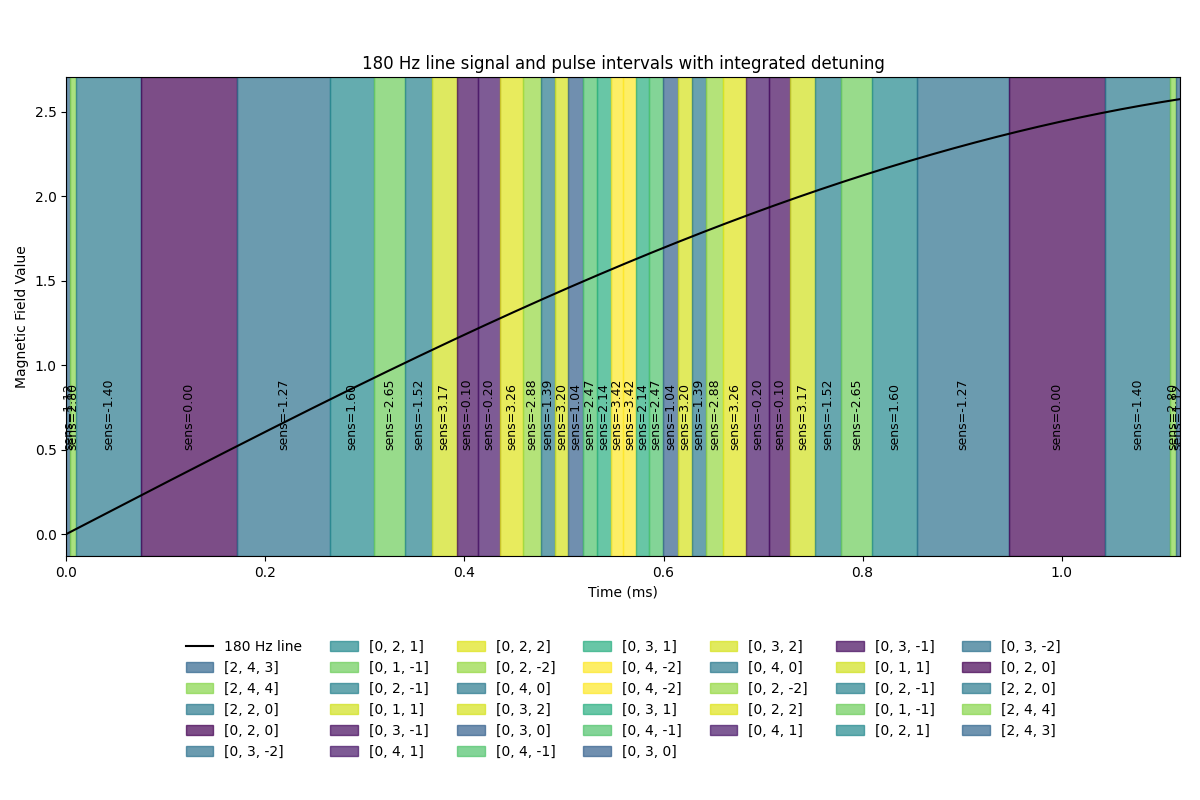

Midpoint line amplitudes for each pulse:
 [0.006382363085115398, 0.02143895930940305, 0.1300383498629197, 0.37602778850841817, 0.6595072151244245, 0.8609912017411226, 0.9699991552235401, 1.05164058971669, 1.1236540796350223, 1.1878709772776295, 1.2475315845674289, 1.3090231857397567, 1.3629829397007898, 1.4039782653266302, 1.4402961807918806, 1.4775466950802696, 1.5141433039905285, 1.5485278978415693, 1.5812313890891634, 1.61252443913558, 1.6445339712144946, 1.6774479785444694, 1.7116713495269593, 1.7456774979786398, 1.7780520407496432, 1.8136987393976107, 1.8592156160462563, 1.9092141455490066, 1.9558921241965928, 2.004195754772178, 2.056061450614371, 2.1120287164064657, 2.182255989913639, 2.299216735729683, 2.437276032577368, 2.5332730822748695, 2.568800518052692, 2.5733970623789735]
Integrated values up to pulse end times:
 [0.0, 2.5726773809736445e-08, 1.43728560522421e-07, 8.584843708798909e-06, 4.484891058080107e-05, 0.0001060840925039262, 0.00014429035565213395, 0.00017467146427

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

def integrate_line_signal(times, signal):

    return np.trapz(signal, x=times)


schedule = get_pulse_schedule(rabi_frequencis_list, full_fractions)
pulses_sec = [(start * 1e-6, end * 1e-6) for (start, end) in schedule]  # convert µs -> s

t_min = 0.0
t_max = max(max(pulses_sec))

fs = 100_000  # sample rate (points per second) to represent the line well
num_points = int(fs*(t_max - t_min)) if t_max > 0 else 1
if num_points < 2:
    num_points = 2  # at least 2 points

t_points = np.linspace(t_min, t_max, 3000)  # in seconds
A = 2.7  # amplitude
freq_line = 180.0  # Hz
line_signal = A * np.sin(2*np.pi * freq_line * t_points)

plt.figure(figsize=(12, 8))

plt.plot(t_points*1e3, line_signal, 'k-', label='180 Hz line')

norm_sens_list = np.abs(sens_list) / max(np.abs(sens_list))
cmap = viridis(norm_sens_list)

line_noise_amplitudes = []
integrated_values = []

for idx, (start_s, end_s) in enumerate(pulses_sec):
    plt.axvspan(start_s * 1e3, end_s * 1e3, color=cmap[idx], alpha=0.7,
                label=f'{full_pulse_train[idx]}')
    
    if end_s < t_min:
        continue
    if start_s > t_max:
        break

    mid_point_s = 0.5*(start_s + end_s)
    if (mid_point_s >= t_min) and (mid_point_s <= t_max):
        line_amp_mid = A * np.sin(2*np.pi*freq_line*mid_point_s)
    else:
        line_amp_mid = 0.0
    line_noise_amplitudes.append(line_amp_mid)
    

    mask = (t_points >= 0.0) & (t_points <= start_s)
    # print(mask)
    if np.any(mask):
        # print(t_points[mask],line_signal[mask])
        partial_integral = integrate_line_signal(t_points[mask], line_signal[mask])
    else:
        partial_integral = 0.0
    
    integrated_values.append(partial_integral)

    text_x_ms = mid_point_s*1e3  # ms
    text_y     = 0.5  # just above the max amplitude (which is ±1)
    label_str  = (f"sens={sens_list[idx]:.2f}")
    
    plt.text(text_x_ms, text_y, label_str,
             ha='center', va='bottom', fontsize=9,
             color='black', rotation=90)

# Final plot settings
plt.xlim(0, t_max*1e3 if t_max>0 else 1.0)
# plt.ylim(-1.2, 1.2)
plt.xlabel("Time (ms)")
plt.ylabel("Magnetic Field Value")
plt.title("180 Hz line signal and pulse intervals with integrated detuning")

# Put the legend at the bottom
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=7, fontsize=10, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# ----------------------------------------------------------------
# 7) Results
# ----------------------------------------------------------------
print("Midpoint line amplitudes for each pulse:\n", line_noise_amplitudes)
print("Integrated values up to pulse end times:\n", integrated_values)


### Measured 180Hz + 60Hz signal

0.0
7.370547311228377e-13
4.1292766893274125e-12
2.547927775178508e-10
1.3958228730640817e-09
3.453728201485185e-09
4.798932198745344e-09
5.897198698496131e-09
6.924456756279236e-09
7.978974160272477e-09
8.95994581684363e-09
1.0023862522784235e-08
1.1234698110653844e-08
1.216834699105192e-08
1.2971579358099823e-08
1.3781748571348167e-08
1.4712175801305636e-08
1.558159488344486e-08
1.6454870132789156e-08
1.7304611864813297e-08
1.817881626935521e-08
1.9131317023550834e-08
2.0139305935004423e-08
2.129091991629198e-08
2.236170599286995e-08
2.3492810407945503e-08
2.4904926411730937e-08
2.6915846113445275e-08
2.8880573154906023e-08
3.088964475030687e-08
3.33072986622335e-08
3.5983775488000395e-08
3.930417546435119e-08
4.429728794603463e-08
5.5863246864463775e-08
6.953517379911313e-08
7.973853784574647e-08
8.064969030009081e-08


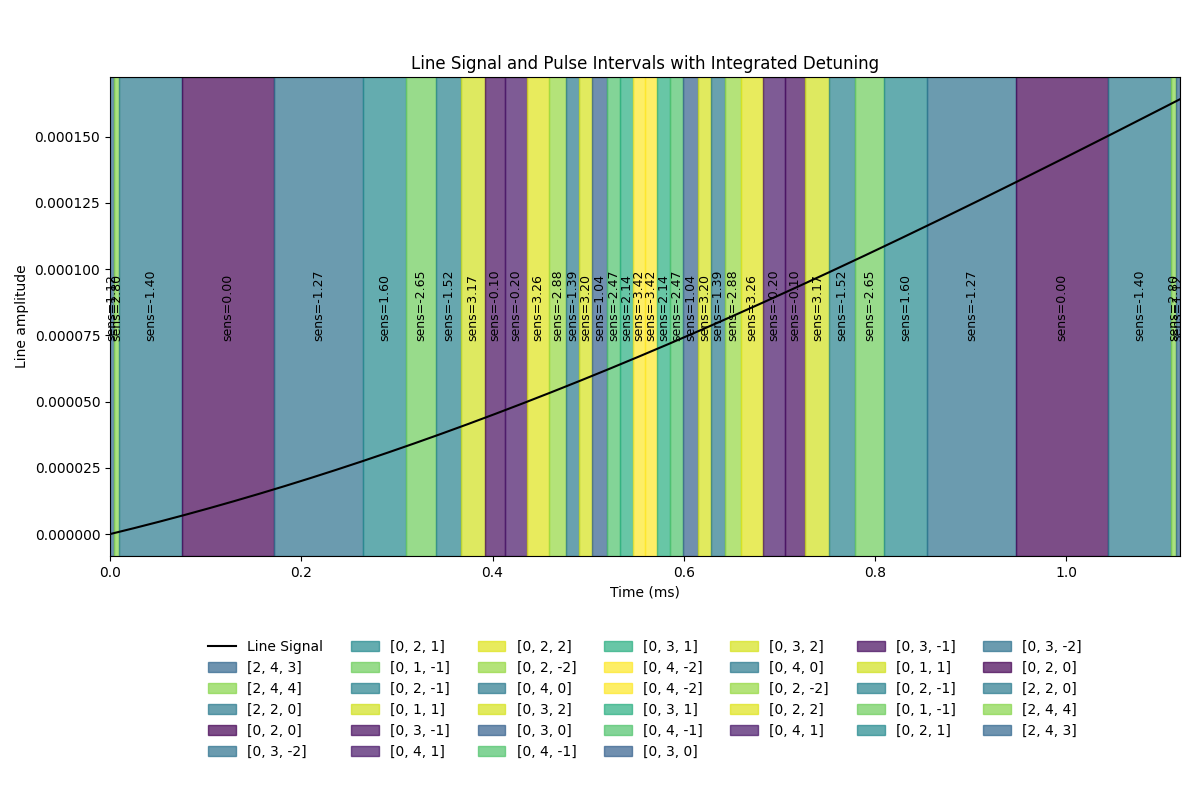

Midpoint line amplitudes for each pulse:
 [1.8275990956460116e-07, 6.161876393944419e-07, 3.838140237592846e-06, 1.1778068398380894e-05, 2.2110920775519595e-05, 3.0305824020880856e-05, 3.506500341203574e-05, 3.879106485802446e-05, 4.219945886007375e-05, 4.534018240380069e-05, 4.8348017365502135e-05, 5.1543455213515785e-05, 5.4431242078613876e-05, 5.6680037356811606e-05, 5.871346300980582e-05, 6.0840858979406315e-05, 6.297365693509627e-05, 6.501764733335855e-05, 6.699915047665833e-05, 6.893067367310862e-05, 7.094369819433084e-05, 7.30544871546693e-05, 7.529508719316622e-05, 7.756986003882804e-05, 7.978242250218033e-05, 8.227420417042521e-05, 8.554557791666656e-05, 8.926324128253086e-05, 9.286106612195794e-05, 9.672507936401725e-05, 0.00010104941833196895, 0.00010594296620571161, 0.00011246628010174055, 0.0001245089058483655, 0.00014147071795519398, 0.00015626041905163763, 0.0001628240880770415, 0.00016373613090394908]
Integrated values up to pulse end times:
 [0.0, 7.370547311228377e-13

In [20]:
##### import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

# def line_signal(t, 
#                 A1=0.000235, phi1=1.593,
#                 A2=0.000247, phi2=-0.06,
#                 offset=0.0001452):
#     return (
#         2*np.pi*A1 * np.sin(2 * np.pi * 60 * t + phi1) +
#         2*np.pi*A2 * np.sin(2 * np.pi * 180 * t + phiS2) +
#         offset
#     )*1000

    
def line_signal(t, 
                A1=3.5837380250461085e-05, phi1=-0.5679260082601475,
                A2=1.438781493988889e-05, phi2=-1.416219054525873,
                offset=0.0002242182849664514):
    return (
        2*np.pi*A1 * np.sin(2 * np.pi * 60 * t + phi1) +
        2*np.pi*A2 * np.sin(2 * np.pi * 180 * t + phi2) +
        offset
    ) - (
        2*np.pi*A1 * np.sin(2 * np.pi * 60 * 0 + phi1) +
        2*np.pi*A2 * np.sin(2 * np.pi * 180 * 0 + phi2) +
        offset
    )


def integrate_line_signal(times, signal):
    return np.trapz(signal, x=times)

schedule = get_pulse_schedule(rabi_frequencis_list, full_fractions)
pulses_sec = [(start * 1e-6, end * 1e-6) for (start, end) in schedule]
t_min = 0.0
t_max = max(end for _, end in pulses_sec) if pulses_sec else 0.0

fs = 100_000
num_points = int(fs * (t_max - t_min)) if t_max > 0 else 1
if num_points < 2:
    num_points = 2

t_points = np.linspace(t_min, t_max, 3000)
line_signal_array = line_signal(t_points)

plt.figure(figsize=(12, 8))
plt.plot(t_points * 1e3, line_signal_array, 'k-', label='Line Signal')

norm_sens_list = np.abs(sens_list) / max(np.abs(sens_list))
cmap = viridis(norm_sens_list)

line_noise_amplitudes = []
integrated_values = []

for idx, (start_s, end_s) in enumerate(pulses_sec):
    plt.axvspan(
        start_s * 1e3, 
        end_s * 1e3,
        color=cmap[idx], 
        alpha=0.7,
        label=f'{full_pulse_train[idx]}'
    )
    
    if end_s < t_min:
        continue
    if start_s > t_max:
        break

    mid_point_s = 0.5 * (start_s + end_s)
    if t_min <= mid_point_s <= t_max:
        line_amp_mid = line_signal(mid_point_s)
    else:
        line_amp_mid = 0.0
    line_noise_amplitudes.append(line_amp_mid)

    mask = (t_points >= 0.0) & (t_points <= start_s)
    if np.any(mask):
        partial_integral = integrate_line_signal(t_points[mask], line_signal(t_points[mask]))
    else:
        partial_integral = 0.0
    integrated_values.append(partial_integral)
    print(partial_integral)
    text_x_ms = mid_point_s * 1e3
    text_y = np.mean(line_signal_array)
    label_str = f"sens={sens_list[idx]:.2f}"
    plt.text(
        text_x_ms, 
        text_y, 
        label_str,
        ha='center', 
        va='bottom', 
        fontsize=9,
        color='black', 
        rotation=90
    )

plt.xlim(0, t_max * 1e3 if t_max > 0 else 1.0)
plt.xlabel("Time (ms)")
plt.ylabel("Line amplitude")
plt.title("Line Signal and Pulse Intervals with Integrated Detuning")
plt.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.15),
    ncol=7, 
    fontsize=10, 
    frameon=False
)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("Midpoint line amplitudes for each pulse:\n", line_noise_amplitudes)
print("Integrated values up to pulse end times:\n", integrated_values)


### Calculating phase with analytical integral

Analytical integral up to pulse start (s): 0.0
Analytical integral up to pulse start (s): 7.643706310879696e-13
Analytical integral up to pulse start (s): 4.266184129079204e-12
Analytical integral up to pulse start (s): 2.5710686245998244e-10
Analytical integral up to pulse start (s): 1.397280558578285e-09
Analytical integral up to pulse start (s): 3.454892544166919e-09
Analytical integral up to pulse start (s): 4.809887536970874e-09
Analytical integral up to pulse start (s): 5.904172501547637e-09
Analytical integral up to pulse start (s): 6.930903116199781e-09
Analytical integral up to pulse start (s): 7.98886694007418e-09
Analytical integral up to pulse start (s): 8.962462742986086e-09
Analytical integral up to pulse start (s): 1.0041176591951722e-08
Analytical integral up to pulse start (s): 1.124813986789072e-08
Analytical integral up to pulse start (s): 1.2187404196173411e-08
Analytical integral up to pulse start (s): 1.2981618614123087e-08
Analytical integral up to pulse start (s

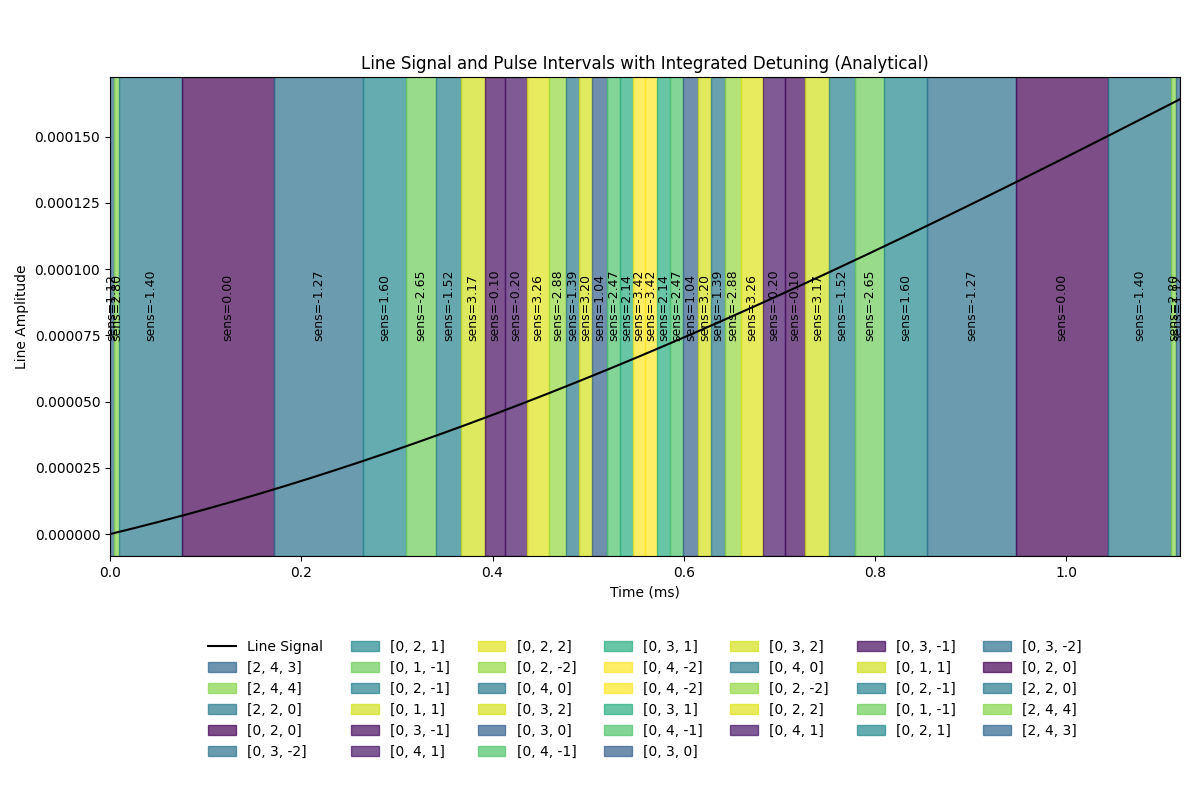

Midpoint line amplitudes for each pulse:
 [1.8275990956460116e-07, 6.161876393944419e-07, 3.838140237592846e-06, 1.1778068398380894e-05, 2.2110920775519595e-05, 3.0305824020880856e-05, 3.506500341203574e-05, 3.879106485802446e-05, 4.219945886007375e-05, 4.534018240380069e-05, 4.8348017365502135e-05, 5.1543455213515785e-05, 5.4431242078613876e-05, 5.6680037356811606e-05, 5.871346300980582e-05, 6.0840858979406315e-05, 6.297365693509627e-05, 6.501764733335855e-05, 6.699915047665833e-05, 6.893067367310862e-05, 7.094369819433084e-05, 7.30544871546693e-05, 7.529508719316622e-05, 7.756986003882804e-05, 7.978242250218033e-05, 8.227420417042521e-05, 8.554557791666656e-05, 8.926324128253086e-05, 9.286106612195794e-05, 9.672507936401725e-05, 0.00010104941833196895, 0.00010594296620571161, 0.00011246628010174055, 0.0001245089058483655, 0.00014147071795519398, 0.00015626041905163763, 0.0001628240880770415, 0.00016373613090394908]
Integrated values up to pulse start times (Analytical):
 [0.0, 7.6437

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

# Line signal: note that the signal is defined relative to its value at t=0 so that line_signal(0)=0.
def line_signal(t, 
                A1=3.5837380250461085e-05, phi1=-0.5679260082601475,
                A2=1.438781493988889e-05, phi2=-1.416219054525873,
                offset=0.0002242182849664514):
    return (
        2*np.pi*A1 * np.sin(2 * np.pi * 60 * t + phi1) +
        2*np.pi*A2 * np.sin(2 * np.pi * 180 * t + phi2) +
        offset
    ) - (
        2*np.pi*A1 * np.sin(2 * np.pi * 60 * 0 + phi1) +
        2*np.pi*A2 * np.sin(2 * np.pi * 180 * 0 + phi2) +
        offset
    )


def get_pulse_schedule(rabi_freqs, fractions):
    if len(rabi_freqs) != len(fractions):
        raise ValueError("rabi_freqs and fractions must have the same length.")
    
    times = []
    t_current = 0.0  # microseconds (start at time=0)
    
    for Omega, frac in zip(rabi_freqs, fractions):
        if not 0 <= frac <= 1:
            raise ValueError(f"Fraction must be between 0 and 1, got {frac}.")
        
        # Calculate the rotation angle and the pulse duration
        theta = 2.0 * np.arcsin(np.sqrt(frac))   # in radians
        t_pulse = theta / Omega if Omega > 0 else 0.0  # microseconds (if Omega in MHz)
        
        # The pulse starts at t_current, ends at t_current + t_pulse
        t_start = t_current
        t_end = t_current + t_pulse
        
        times.append((t_start, t_end))
        t_current = t_end  # next pulse starts after this one finishes
    
    return times

def line_signal(t, 
                A1=3.5837380250461085e-05, phi1=-0.5679260082601475,
                A2=1.438781493988889e-05, phi2=-1.416219054525873,
                offset=0.0002242182849664514):
    return (
        2*np.pi*A1 * np.sin(2 * np.pi * 60 * t + phi1) +
        2*np.pi*A2 * np.sin(2 * np.pi * 180 * t + phi2) +
        offset
    ) - (
        2*np.pi*A1 * np.sin(2 * np.pi * 60 * 0 + phi1) +
        2*np.pi*A2 * np.sin(2 * np.pi * 180 * 0 + phi2) +
        offset
    )


def analytical_integral(T, 
                A1=3.5837380250461085e-05, phi1=-0.5679260082601475,
                A2=1.438781493988889e-05, phi2=-1.416219054525873,
                offset=0.0002242182849664514):

    int_60 = (A1 / 60) * (np.cos(phi1) - np.cos(2 * np.pi * 60 * T + phi1))

    int_180 = (A2 / 180) * (np.cos(phi2) - np.cos(2 * np.pi * 180 * T + phi2))

    t0 = (2 * np.pi * A1 * np.sin(2 * np.pi * 60 * 0 + phi1) +
          2 * np.pi * A2 * np.sin(2 * np.pi * 180 * 0 + phi2) +
          offset)

    int_offset = (offset - t0) * T
    return int_60 + int_180 + int_offset

# Assume get_pulse_schedule, rabi_frequencis_list, full_fractions, sens_list, and full_pulse_train are defined externally.
schedule = get_pulse_schedule(rabi_frequencis_list, full_fractions)
pulses_sec = [(start * 1e-6, end * 1e-6) for (start, end) in schedule]
t_min = 0.0
t_max = max(end for _, end in pulses_sec) if pulses_sec else 0.0

fs = 100_000
num_points = int(fs * (t_max - t_min)) if t_max > 0 else 1
if num_points < 2:
    num_points = 2

t_points = np.linspace(t_min, t_max, 3000)
line_signal_array = line_signal(t_points)

plt.figure(figsize=(12, 8))
plt.plot(t_points * 1e3, line_signal_array, 'k-', label='Line Signal')

# Normalize sensitivity values to map colors
norm_sens_list = np.abs(sens_list) / max(np.abs(sens_list))
cmap = viridis(norm_sens_list)

line_noise_amplitudes = []
integrated_values = []

for idx, (start_s, end_s) in enumerate(pulses_sec):
    plt.axvspan(
        start_s * 1e3, 
        end_s * 1e3,
        color=cmap[idx], 
        alpha=0.7,
        label=f'{full_pulse_train[idx]}'
    )
    
    # Skip pulses completely outside the time interval.
    if end_s < t_min:
        continue
    if start_s > t_max:
        break

    mid_point_s = 0.5 * (start_s + end_s)
    if t_min <= mid_point_s <= t_max:
        line_amp_mid = line_signal(mid_point_s)
    else:
        line_amp_mid = 0.0
    line_noise_amplitudes.append(line_amp_mid)

    # Replace numerical integration with the analytical integration up to start_s.
    partial_integral = analytical_integral(start_s)
    integrated_values.append(partial_integral)
    print("Analytical integral up to pulse start (s):", partial_integral)
    
    text_x_ms = mid_point_s * 1e3
    text_y = np.mean(line_signal_array)
    label_str = f"sens={sens_list[idx]:.2f}"
    plt.text(
        text_x_ms, 
        text_y, 
        label_str,
        ha='center', 
        va='bottom', 
        fontsize=9,
        color='black', 
        rotation=90
    )

plt.xlim(0, t_max * 1e3 if t_max > 0 else 1.0)
plt.xlabel("Time (ms)")
plt.ylabel("Line Amplitude")
plt.title("Line Signal and Pulse Intervals with Integrated Detuning (Analytical)")
plt.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.15),
    ncol=7, 
    fontsize=10, 
    frameon=False
)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("Midpoint line amplitudes for each pulse:\n", line_noise_amplitudes)
print("Integrated values up to pulse start times (Analytical):\n", integrated_values)
phase_180Hz = np.array(integrated_values)*1e6 * np.array(sens_list)

### Function that returns the phase due to Line Noise

In [26]:
import numpy as np


def compute_phase_and_detuning_180Hz(pulse_train, fractions, pi_t = [19.470, 35.554, 41.166, 30.108, 39.326]):

    def line_signal(t, 
                    A1=0.000273203217587317, phi1=-0.7165710705760902,
                    A2=6.842623973133531e-05, phi2=-7.7358413871655065,
                    offset=0.0002890819550014299):
        return (
            2*np.pi*A1 * np.sin(2 * np.pi * 60 * t + phi1) +
            2*np.pi*A2 * np.sin(2 * np.pi * 180 * t + phi2) +
            offset
        ) - (
            2*np.pi*A1 * np.sin(2 * np.pi * 60 * 0 + phi1) +
            2*np.pi*A2 * np.sin(2 * np.pi * 180 * 0 + phi2) +
            offset
        )
    
    
    def analytical_integral(T, 
                    A1=0.000273203217587317, phi1=-0.7165710705760902,
                    A2=6.842623973133531e-05, phi2=-7.7358413871655065,
                    offset=0.0002890819550014299):
    
        int_60 = (A1 / 60) * (np.cos(phi1) - np.cos(2 * np.pi * 60 * T + phi1))
    
        int_180 = (A2 / 180) * (np.cos(phi2) - np.cos(2 * np.pi * 180 * T + phi2))
    
        t0 = (2 * np.pi * A1 * np.sin(2 * np.pi * 60 * 0 + phi1) +
              2 * np.pi * A2 * np.sin(2 * np.pi * 180 * 0 + phi2) +
              offset)
    
        int_offset = (offset - t0) * T
        return int_60 + int_180 + int_offset

    def compute_pi_times(pi_t):
        transition_strengths = np.loadtxt(
            'Z:\\Lab Data\\Phase_and_freq_correction_180Hz\\Transition_strengths_4p216.txt', delimiter=','
        )
        transition_strengths[transition_strengths == 0] = np.nan
    
        # pi_t = np.array([19.470, 35.554, 41.166, 30.108, 39.326])
        strengths = np.array([
            transition_strengths[23, 0], transition_strengths[14, 0],
            transition_strengths[17, 4], transition_strengths[16, 4], transition_strengths[15, 4]
        ])
    
        factors = np.array(pi_t) * strengths
        Fs = [1, 2, 3, 4]
        row_labels = [[i, i - j] for i in Fs for j in range(2 * i + 1)]
        col_labels = [-2, -1, 0, 1, 2]
    
        pi_times = np.zeros((24, 5))
        for i in range(np.shape(transition_strengths)[0]):
            for j in range(np.shape(transition_strengths)[1]):
                if not np.isnan(transition_strengths[i, j]):
                    delta_m = (row_labels[i][1] - col_labels[j]) + 2
                    pi_times[i, j] = factors[delta_m] / transition_strengths[i, j]
        
        return pi_times

    def get_pi_times(transitions,matrix):
        pi_times_list = []
        for transition in transitions:
            row_label = [transition[1],transition[2]]
            Fs = [1,2,3,4]
            states = []
            for i in Fs:
                for j in range(2*i+1):
                    mF = i-j
                    states.append([i,mF])
        
            row_labels = states
        
            col_label = transition[0]
        
            # Find the index of the row label
            row_index = next((i for i, label in enumerate(row_labels) if label == row_label), None)
            # Find the index of the column label
            col_index = col_labels.index(col_label)
            
            if row_index is not None and col_index in range(len(col_labels)):
                pi_times_list.append(matrix[row_index, col_index])
            else:
                pi_times_list.append(np.nan)
    
        return pi_times_list
    
    def get_pulse_schedule(rabi_freqs, fractions):
        if len(rabi_freqs) != len(fractions):
            raise ValueError(f"rabi_freqs {len(rabi_freqs)} and fractions {len(fractions)} must have the same length.")
        times = []
        t_current = 0.0  # start time in microseconds
        for Omega, frac in zip(rabi_freqs, fractions):
            if not 0 <= frac <= 1:
                raise ValueError(f"Fraction must be between 0 and 1, got {frac}.")
            # Calculate the rotation angle and pulse duration (in microseconds)
            theta = 2.0 * np.arcsin(np.sqrt(frac))
            t_pulse = theta / Omega if Omega > 0 else 0.0
            t_start = t_current
            t_end = t_current + t_pulse
            times.append((t_start, t_end))
            t_current = t_end
        return times

    pi_times_train = get_pi_times(pulse_train,compute_pi_times(pi_t))
    rabi_frequencis_list = np.pi/np.array(pi_times_train)

    sens_matrix = np.loadtxt('Z:\Lab Data\Phase_and_freq_correction_180Hz\sensitivities_4p216.txt',delimiter=',')
    sens_list = get_pi_times(pulse_train, sens_matrix)
    
    schedule = get_pulse_schedule(rabi_frequencis_list, fractions)
    pulses_sec = [(start * 1e-6, end * 1e-6) for (start, end) in schedule]
    # print(schedule)
    integrated_values = []
    detuning_values = []

    # For each pulse, compute the analytical integration and instantaneous detuning at the pulse start.
    for (start_s, _) in pulses_sec:
        integ = analytical_integral(start_s)
        integrated_values.append(integ)
        det = line_signal(start_s)
        detuning_values.append(det)
    
    # Convert to numpy arrays for vectorized operations.
    # print(integrated_values)
    integrated_values = np.array(integrated_values)
    detuning_values = np.array(detuning_values)
    sens_array = np.array(sens_list)
    
    # Compute phase (scaled integrated detuning) and instantaneous detuning.
    phase_180Hz = integrated_values * 1e6 * sens_array
    detuning_180Hz = detuning_values * sens_array
    
    return phase_180Hz, detuning_180Hz


In [28]:
detunings = np.array(integrated_values)*1e6 * np.array(sens_list)
print(detunings)
# print(len(full_pulse_train),len(full_fractions))
phases,_ = compute_phase_and_detuning_180Hz(full_pulse_train,full_fractions,pi_t)
print(full_pulse_train,full_fractions)

print(phases)

[ 0.00000000e+00  2.13966371e-06 -5.97199390e-06  1.49913112e-08
 -1.77583026e-03  5.54294463e-03 -1.27317747e-02 -8.96268120e-03
  2.19638251e-02 -7.78115512e-04 -1.78333789e-03  3.27077688e-02
 -3.23549184e-02 -1.69059842e-02  4.15583921e-02  1.43012381e-02
 -3.62986417e-02  3.33196413e-02 -5.63195146e-02 -5.92320218e-02
  3.89008471e-02 -4.72514625e-02  2.08917138e-02  6.81676845e-02
 -3.10411806e-02 -6.75834617e-02  8.11572212e-02 -5.35612865e-03
 -2.81580015e-03  9.79326347e-02 -5.05934177e-02 -9.52996325e-02
  6.30659442e-02 -5.63471827e-02  3.25947837e-06 -9.73466938e-02
  2.23305235e-01  9.04600181e-02]
[[2, 4, 3], [2, 4, 4], [2, 2, 0], [0, 2, 0], [0, 3, -2], [0, 2, 1], [0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, -2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2], [0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1], [0, 2, 1], [0, 

## Ramsey Simulation with Line noise no detunings 

20


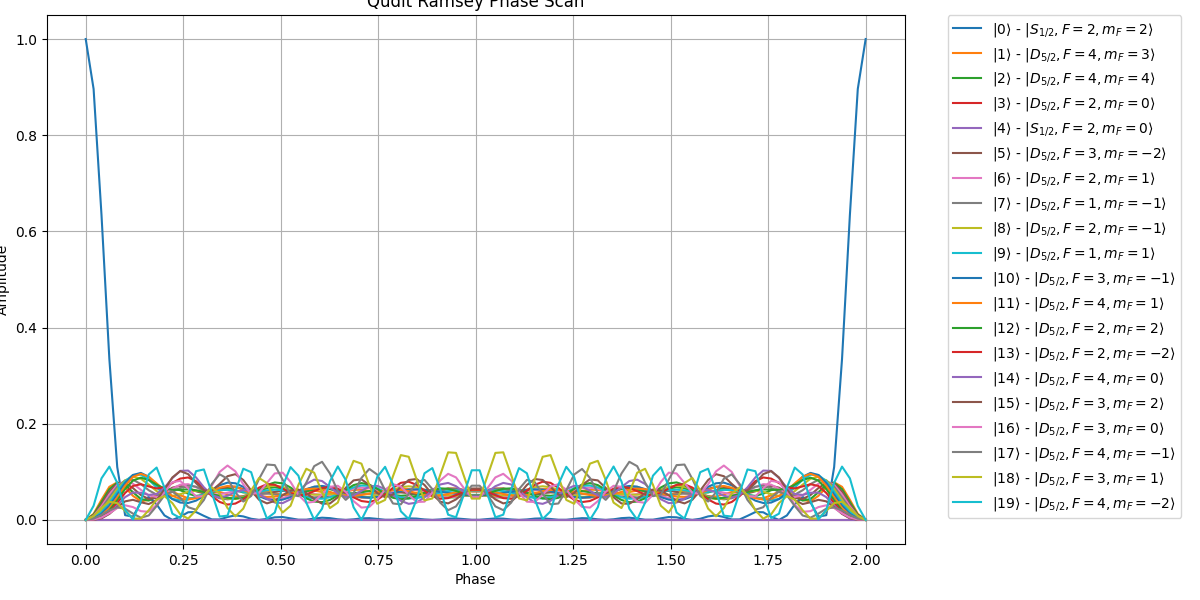

In [31]:
import numpy as np
from scipy.linalg import expm

state_mapping = assign_states(full_pulse_train)
couplings = translate_transitions(full_pulse_train,assign_states(full_pulse_train))
# print(couplings)
rabi_freqs = rabi_frequencis_list
fractions  = full_fractions

fixed_phase_flags = full_fixed_phases

sim_phase_flags   = full_simulated_phases

dim = max(max(pair) for pair in couplings) + 1
# dim = max(max(couplings))+1
print(dim)
detunings_in_mhz = np.zeros(len(couplings))
phase_180Hz = np.array(integrated_values)*1e6 * np.array(sens_list)
# detunings_in_mhz = np.array([0.001,0.001,0.001,0.001,0.001,0.001])

def coupling_operator_with_phase(i, j, dim, phi):

    op = np.zeros((dim, dim), dtype=complex)
    op[i, j] = np.exp(+1j * phi)
    op[j, i] = np.exp(-1j * phi)
    return op

def pulse_duration_for_fraction(f, Omega):

    if not (0 <= f <= 1):
        raise ValueError("Fraction f must be between 0 and 1.")
    theta = 2.0 * np.arcsin(np.sqrt(f))
    return theta / Omega if Omega != 0 else 0.0

def simulate_sequence(couplings, rabi_freqs, fractions,
                      fixed_phase_flags, sim_phase_flags,phase_180Hz,
                      detunings_in_mhz,
                      dim=4, sweeping_phase=0.0):

    state = np.zeros(dim, dtype=complex)
    state[0] = 1.0
    total_pulse_time = 0
    accumulated_phase = 0.0
    list_accumulated_phase = []
    for (levels, Omega, frac, fix_pflag, sim_pflag, p180_val, Delta_mhz) in zip(
        couplings, rabi_freqs, fractions,
        fixed_phase_flags, sim_phase_flags,phase_180Hz, detunings_in_mhz
    ):
        i, j = levels

        phi_fixed = fix_pflag * np.pi
        phi_scan  = sim_pflag * sweeping_phase

        total_phase = phi_fixed + phi_scan + p180_val + accumulated_phase

        H_op = coupling_operator_with_phase(i, j, dim, total_phase)
        H_coupling = 0.5 * Omega * H_op

        t_pulse = pulse_duration_for_fraction(frac, Omega)  
        total_pulse_time += t_pulse
        U = expm(-1j * H_coupling * t_pulse)  # e^{-i H t}
        state = U @ state
        list_accumulated_phase.append(accumulated_phase)
        accumulated_phase += 2*np.pi* Delta_mhz * t_pulse
        
    return state

num_points = 100
phase_sweep = np.linspace(0, 2*np.pi, num_points)
all_populations = []
# phase_sweep = np.array([0, phase_2])
for ph in phase_sweep:
    final_state = simulate_sequence(
        couplings, rabi_freqs, fractions,
        fixed_phase_flags, sim_phase_flags,phase_180Hz*0,
        detunings_in_mhz*0,
        dim=dim,
        sweeping_phase=ph
    )
    pops = np.abs(final_state)**2
    all_populations.append(pops)
#print(all_populations)
plt.figure(figsize = (12,6))
states = [key for key, value in state_mapping.items() if all(isinstance(k, int) for k in key)]
for i in range(dim):
    plt.plot(phase_sweep/np.pi,np.array(all_populations)[:,i], label = rf'$|{i} \rangle$ - $|D_{{5/2}}, F = {states[i][0]}, m_F = {states[i][1]}\rangle$' if len(states[i]) > 1 else rf'$|{i} \rangle$ - $|S_{{1/2}}, F = 2, m_F = {states[i][0]} \rangle$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()  # Adjust layout to make room for the legendrect=[0.2, 0, 0.95, 1]
plt.xlabel("Phase")
plt.ylabel("Amplitude")
plt.title("Qudit Ramsey Phase Scan")
plt.grid()
plt.show()

## Ramsey Simulation with Line noise with diagonal elements 

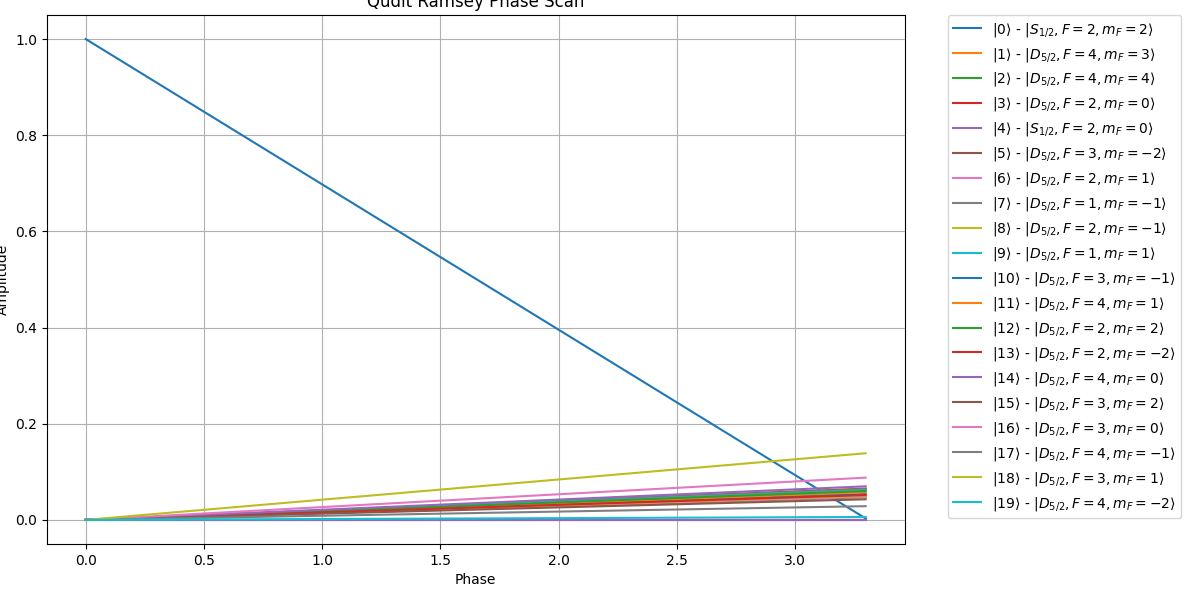

In [34]:
import numpy as np
from scipy.linalg import expm

def detuning_operator(i, j, delta_rad_us, dim):

    H_det = np.zeros((dim, dim), dtype=complex)
    H_det[i, i] = +0.5 * delta_rad_us
    H_det[j, j] = -0.5 * delta_rad_us
    return H_det

def coupling_operator_with_phase(i, j, dim, phi):
    op = np.zeros((dim, dim), dtype=complex)
    op[i, j] = np.exp(+1j * phi)
    op[j, i] = np.exp(-1j * phi)
    return op

def pulse_duration_for_fraction(f, Omega):
    if not (0 <= f <= 1):
        raise ValueError("Fraction f must be between 0 and 1.")
    theta = 2.0 * np.arcsin(np.sqrt(f))  
    return theta / Omega if Omega != 0 else 0.0

def simulate_sequence(couplings, rabi_freqs, fractions,
                      fixed_phase_flags, sim_phase_flags, phase_180Hz,
                      detunings_in_mhz,
                      dim=4, sweeping_phase=0.0):

    # Start in state 1
    state = np.zeros(dim, dtype=complex)
    state[0] = 1.0

    # Build a global detuning Hamiltonian that includes all detuning contributions.
    H_det_global = np.zeros((dim, dim), dtype=complex)
    for (levels, Delta_mhz) in zip(couplings, detunings_in_mhz):
        i, j = levels
        # Convert MHz detuning to radians per microsecond (assuming appropriate conversion)
        delta_rad_us = Delta_mhz * 2.0 * np.pi 
        H_det_global += detuning_operator(i, j, delta_rad_us, dim)

    # Process each pulse in the sequence
    for (levels, Omega, frac, fix_pflag, sim_pflag, p180_val, Delta_mhz) in zip(
        couplings, rabi_freqs, fractions,
        fixed_phase_flags, sim_phase_flags, phase_180Hz, detunings_in_mhz
    ):
        i, j = levels

        # Construct total phase for the coupling
        phi_fixed = fix_pflag * np.pi
        phi_scan  = sim_pflag * sweeping_phase
        total_phase = phi_fixed + phi_scan + p180_val

        # Build the coupling Hamiltonian for the current pulse
        H_coupling = 0.5 * Omega * coupling_operator_with_phase(i, j, dim, total_phase)

        # The total Hamiltonian now includes the global detunings plus the pulse's coupling
        H_pulse = H_det_global + H_coupling

        # Determine the pulse duration
        t_pulse = pulse_duration_for_fraction(frac, Omega)

        # Evolve the state under the total Hamiltonian
        U = expm(-1j * H_pulse * t_pulse)
        state = U @ state

    return state


# Example usage: sweep phase
num_points = 100
phase_2 = (dim+1)/(2*dim)*2*np.pi
phase_sweep = np.array([0, phase_2])# np.linspace(0, 2*np.pi, num_points)
all_populations = []

for ph in phase_sweep:
    final_state = simulate_sequence(
        couplings, rabi_freqs, fractions,
        fixed_phase_flags, sim_phase_flags, phase_180Hz*0,
        detunings_in_mhz*0,
        dim=dim,
        sweeping_phase=ph
    )
    pops = np.abs(final_state)**2
    all_populations.append(pops)

plt.figure(figsize = (12,6))
states = [key for key, value in state_mapping.items() if all(isinstance(k, int) for k in key)]
for i in range(dim):
    plt.plot(phase_sweep,np.array(all_populations)[:,i], label = rf'$|{i} \rangle$ - $|D_{{5/2}}, F = {states[i][0]}, m_F = {states[i][1]}\rangle$' if len(states[i]) > 1 else rf'$|{i} \rangle$ - $|S_{{1/2}}, F = 2, m_F = {states[i][0]} \rangle$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()  # Adjust layout to make room for the legendrect=[0.2, 0, 0.95, 1]
plt.xlabel("Phase")
plt.ylabel("Amplitude")
plt.title("Qudit Ramsey Phase Scan")
plt.grid()
plt.show()

In [36]:
def detuning_operator(i, j, delta_rad_us, dim):

    H_det = np.zeros((dim, dim), dtype=complex)
    H_det[i, i] = +0.5 * delta_rad_us
    H_det[j, j] = -0.5 * delta_rad_us
    return H_det

def coupling_operator_with_phase(i, j, dim, phi):
    op = np.zeros((dim, dim), dtype=complex)
    op[i, j] = np.exp(+1j * phi)
    op[j, i] = np.exp(-1j * phi)
    return op

def pulse_duration_for_fraction(f, Omega):
    if not (0 <= f <= 1):
        raise ValueError("Fraction f must be between 0 and 1.")
    theta = 2.0 * np.arcsin(np.sqrt(f))  
    return theta / Omega if Omega != 0 else 0.0

def simulate_sequence(couplings, rabi_freqs, fractions,
                      fixed_phase_flags, sim_phase_flags, phase_180Hz,
                      detunings_in_mhz,
                      dim=4, sweeping_phase=0.0):

    # Start in state 1
    state = np.zeros(dim, dtype=complex)
    state[1] = 1.0

    # Build a global detuning Hamiltonian that includes all detuning contributions.
    H_det_global = np.zeros((dim, dim), dtype=complex)
    for (levels, Delta_mhz) in zip(couplings, detunings_in_mhz):
        i, j = levels
        # Convert MHz detuning to radians per microsecond (assuming appropriate conversion)
        delta_rad_us = Delta_mhz * 2.0 * np.pi 
        H_det_global += detuning_operator(i, j, delta_rad_us, dim)

    # Process each pulse in the sequence
    for (levels, Omega, frac, fix_pflag, sim_pflag, p180_val, Delta_mhz) in zip(
        couplings, rabi_freqs, fractions,
        fixed_phase_flags, sim_phase_flags, phase_180Hz, detunings_in_mhz
    ):
        i, j = levels

        # Construct total phase for the coupling
        phi_fixed = fix_pflag * np.pi
        phi_scan  = sim_pflag * sweeping_phase
        total_phase = phi_fixed + phi_scan + p180_val

        # Build the coupling Hamiltonian for the current pulse
        H_coupling = 0.5 * Omega * coupling_operator_with_phase(i, j, dim, total_phase)

        # The total Hamiltonian now includes the global detunings plus the pulse's coupling
        H_pulse = H_det_global + H_coupling

        # Determine the pulse duration
        t_pulse = pulse_duration_for_fraction(frac, Omega)

        # Evolve the state under the total Hamiltonian
        U = expm(-1j * H_pulse * t_pulse)
        state = U @ state

    return state


## Monte-Carlo

In [40]:

# import numpy as np
# import matplotlib.pyplot as plt

# # Define noise parameters
# num_shots = 100  # Number of Monte Carlo runs
# noise_mean = 0.0  # Mean of the Gaussian noise in MHz
# noise_std = 0.001  # Standard deviation of the noise in MHz

# # Initialize storage for averaged populations
# all_populations_mc = np.zeros((num_points, dim))

# for _ in range(num_shots):
#     # Generate random detunings for each coupling using Gaussian sampling
#     detunings_sampled = [np.random.normal(noise_mean, noise_std, size=len(couplings))][0]
#     detunings_sampled.fill(0.001)
#     # print(detunings_sampled)
#     # print(len(couplings), len(rabi_freqs), fractions,
#     #         fixed_phase_flags, sim_phase_flags, phase_180Hz,
#     #         detunings_sampled, dim, ph)
#     # Run the phase sweep simulation with sampled detunings
#     all_populations = []
#     for ph in phase_sweep:
#         final_state = simulate_sequence(
#             couplings, rabi_freqs, fractions,
#             fixed_phase_flags, sim_phase_flags, phase_180Hz,
#             detunings_sampled, dim=dim, sweeping_phase=ph
#         )
#         pops = np.abs(final_state) ** 2
#         all_populations.append(pops)
#         # print(pops)
#     # Accumulate results over Monte Carlo runs
#     all_populations_mc += np.array(all_populations)

# # Average over all shots
# all_populations_mc /= num_shots
# # print(all_populations_mc)
# # Plot the results
# plt.figure(figsize=(12, 6))
# for i in range(dim)[:]:
#     plt.plot(phase_sweep / np.pi, all_populations_mc[:, i], label=rf'$|{i} \rangle$')
# plt.legend()
# plt.xlabel("Phase")
# plt.ylabel("Amplitude")
# plt.title("Qudit Ramsey Phase Scan with Gaussian Detuning Noise")
# plt.grid()
# plt.show()



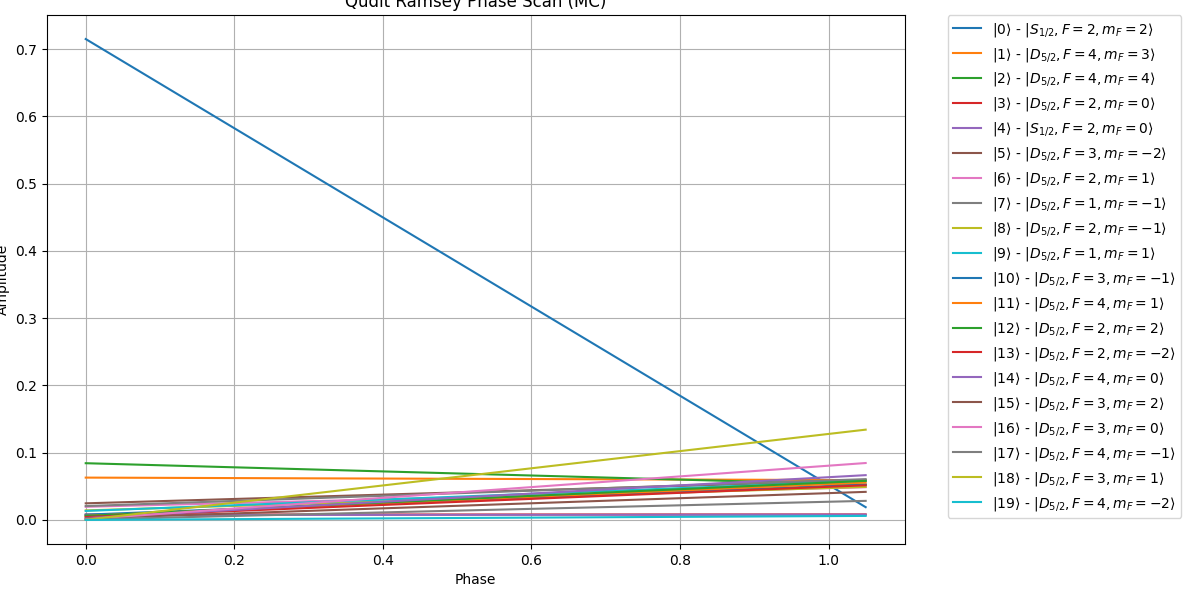

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy
from scipy.special import voigt_profile

T = 2*np.pi*1460.2780575922604e-6
L = 2*np.pi*3175.261928681799e-6 

sigma = np.sqrt(2) / T
gamma = 1.0 / L

def V(x):
    return voigt_profile(x, sigma, gamma)


x_min = -1000
x_max = 1000
res = 1000000  
x_vals = np.linspace(x_min, x_max, num_points)
dx = x_vals[1] - x_vals[0]

V_vals = V(x_vals)

cdf = np.cumsum(V_vals) * dx
cdf /= cdf[-1]  

def detuning_operator(i, j, delta_rad_us, dim):

    H_det = np.zeros((dim, dim), dtype=complex)
    H_det[i, i] = 0
    H_det[j, j] = delta_rad_us
    return H_det

def coupling_operator_with_phase(i, j, dim, phi):

    op = np.zeros((dim, dim), dtype=complex)
    op[i, j] = np.exp(+1j * phi)
    op[j, i] = np.exp(-1j * phi)
    return op

def pulse_duration_for_fraction(f, Omega):

    if not (0 <= f <= 1):
        raise ValueError("Fraction f must be between 0 and 1.")
    theta = 2.0 * np.arcsin(np.sqrt(f))
    return theta / Omega if Omega != 0 else 0.0

def simulate_sequence(couplings, rabi_freqs, fractions,
                      fixed_phase_flags, sim_phase_flags,phase_180Hz,
                      detunings_in_mhz,
                      dim=4, sweeping_phase=0.0):

    state = np.zeros(dim, dtype=complex)
    state[0] = 1.0
    total_pulse_time = 0
    accumulated_phase = 0.0
    list_accumulated_phase = []
    for (levels, Omega, frac, fix_pflag, sim_pflag, p180_val, Delta_mhz) in zip(
        couplings, rabi_freqs, fractions,
        fixed_phase_flags, sim_phase_flags,phase_180Hz, detunings_in_mhz
    ):
        i, j = levels

        phi_fixed = fix_pflag * np.pi
        phi_scan  = sim_pflag * sweeping_phase

        t_pulse = pulse_duration_for_fraction(frac, Omega)  
        # print(t_pulse)
        accumulated_phase = 2*np.pi* Delta_mhz * total_pulse_time
        total_phase = phi_fixed + phi_scan + p180_val + accumulated_phase
        # print(total_phase)
        H_op = coupling_operator_with_phase(i, j, dim, total_phase)
        H_det =  detuning_operator(i, j, 2*np.pi* Delta_mhz, dim)
        H_coupling = 0.5 * Omega * H_op + H_det


        # Evolve the state
        U = expm(-1j * H_coupling * t_pulse)  # e^{-i H t}
        state = U @ state
        list_accumulated_phase.append(accumulated_phase)
        total_pulse_time += t_pulse
        # print(total_pulse_time)
    return state

def sample_voigt(n_samples):
    u = np.random.rand(n_samples)
    samples = np.interp(u, cdf, x_vals)
    return samples


def generate_detunings(sensitivities, num_couplings, mag_noise_std=4.9e-5, calib_fwhm=0.000078):

    # mag_noise = [1 * np.random.normal(0, mag_noise_std) for s in sensitivities]
    mag_noise = np.random.normal(0,mag_noise_std)*np.array(sensitivities)
    # print(mag_noise)
    # laser_noise = norm.rvs(loc=0, scale=sigma, size=num_couplings) + cauchy.rvs(loc=0, scale=gamma, size=num_couplings)
    laser_noise = np.full(num_couplings, sample_voigt(1)[0])*1e-6
    # print(laser_noise*1e-6)
    # print(laser_noise)
    
    calib_noise = np.full(num_couplings, cauchy.rvs(loc=-0.000001, scale=calib_fwhm, size=1)[0])

    detunings = np.array(mag_noise) + np.array(laser_noise) + np.array(calib_noise)
    # print(laser_noise)
    return detunings

num_shots = 500
phase_2 = (dim+1)/(2*dim)*2*np.pi
phase_sweep = np.array([0, phase_2])
# phase_sweep = np.linspace(0, 2*np.pi, 30)
all_populations_mc = np.zeros((len(phase_sweep), dim))
all_experiments_list = []

for _ in range(num_shots):

    all_populations = []

    for ph in phase_sweep:
        detunings_sampled = generate_detunings(sens_list, len(couplings))
        # print(detunings_sampled)
        final_state= simulate_sequence(
            couplings, rabi_freqs, fractions,
            fixed_phase_flags, sim_phase_flags, phase_180Hz,
            detunings_sampled, dim=dim, sweeping_phase=ph
        )
        pops = np.abs(final_state) ** 2
        # print(pops)
        all_populations.append(pops)
        # print(len(all_populations))
    all_populations_mc += np.array(all_populations)
    all_experiments_list.append(all_populations)
all_populations_mc /= num_shots

plt.figure(figsize = (12,6))
states = [key for key, value in state_mapping.items() if all(isinstance(k, int) for k in key)]
for i in range(dim):
    plt.plot(phase_sweep/np.pi,np.array(all_populations_mc)[:,i], label = rf'$|{i} \rangle$ - $|D_{{5/2}}, F = {states[i][0]}, m_F = {states[i][1]}\rangle$' if len(states[i]) > 1 else rf'$|{i} \rangle$ - $|S_{{1/2}}, F = 2, m_F = {states[i][0]} \rangle$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()  # Adjust layout to make room for the legendrect=[0.2, 0, 0.95, 1]
plt.xlabel("Phase")
plt.ylabel("Amplitude")
plt.title("Qudit Ramsey Phase Scan (MC)")
plt.grid()
plt.show()

In [43]:
generate_detunings(sens_list, len(couplings))

array([0.0007264 , 0.00075217, 0.00068768, 0.00070918, 0.00068966,
       0.00073382, 0.00066853, 0.00068587, 0.00075785, 0.00070769,
       0.00070613, 0.00075921, 0.000665  , 0.00068788, 0.00075835,
       0.00072509, 0.0006713 , 0.00074202, 0.00065665, 0.00065665,
       0.00074202, 0.0006713 , 0.00072509, 0.00075835, 0.00068788,
       0.000665  , 0.00075921, 0.00070613, 0.00070769, 0.00075785,
       0.00068587, 0.00066853, 0.00073382, 0.00068966, 0.00070918,
       0.00068768, 0.00075217, 0.0007264 ])

0.6959576489490298


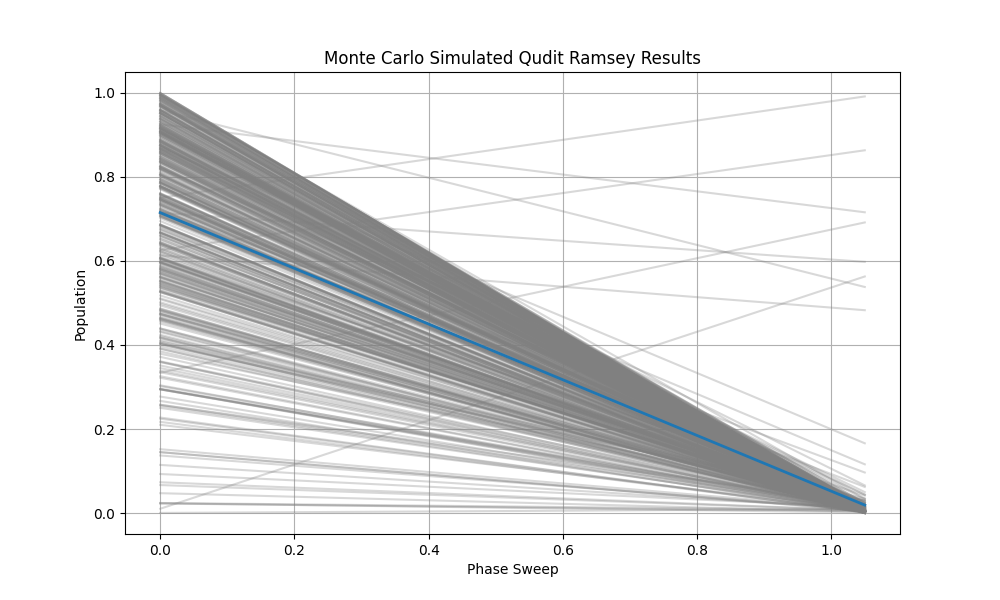

In [44]:
import numpy as np
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 6))

for experiment in all_experiments_list:
    plt.plot(phase_sweep/np.pi, np.array(experiment)[:,0], color='gray', alpha=0.3)

plt.plot(phase_sweep/np.pi, all_populations_mc[:,0], linewidth=2, label="Final Averaged Result")
print(max(all_populations_mc[:,0]) - min(all_populations_mc[:,0]))
plt.xlabel("Phase Sweep")
plt.ylabel("Population")
plt.title("Monte Carlo Simulated Qudit Ramsey Results")
# plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## QuDit Contrast Decay Simulations

### Defining pulse Sequences for QuDit Ramsey

In [50]:
# def pulse_sequence(dim):
#     if dim==2:
#         ############################ DIMENSION = 2
#         initial_state = [[2,4,4]]

#         pulse_train_U1 = [[2,4,2]]
#         fractions_U1 = [0.5]
#         simulated_phase_mask_U1 = [0]
#         fixed_phase_mask_U1 = [0]

#         pulse_train_U2 = [[2,4,2]]
#         fractions_U2 = [0.5]
#         simulated_phase_mask_U2 = [1]
#         fixed_phase_mask_U2 = [1]

#         s12_state_shelvings = []
#         s12_state_fractions = []
#         s12_state_fixed_phases = []
#         s12_state_simulated_phases = []

#         probe_trans = [[2,4,2]]

#     elif dim==3:
#         ############################### DIMENSION = 3
#         initial_state = [[-2, 3, -2]]

#         pulse_train_U1 = [[-2, 3, -3], [-2, 4, -4]]
#         fractions_U1 = [0.3333333333333333, 0.5]
#         simulated_phase_mask_U1 = [0, 0]
#         fixed_phase_mask_U1 = [0, 0]

#         pulse_train_U2 = [[-2, 4, -4], [-2, 3, -3]]
#         fractions_U2 = [0.5, 0.3333333333333333]
#         simulated_phase_mask_U2 = [2, 1]
#         fixed_phase_mask_U2 = [1, 1]

#         s12_state_shelvings = []
#         s12_state_fractions = []
#         s12_state_fixed_phases = []
#         s12_state_simulated_phases = []

#         probe_trans = [[-2, 3, -3], [-2, 4, -4]]

#     elif dim==4:
#         initial_state = [[-2, 3, -1]]

#         pulse_train_U1 = [[-2, 3, -2], [-2, 3, -3], [-2, 4, -4]]
#         fractions_U1 = [0.25, 0.3333333333333333, 0.5]
#         simulated_phase_mask_U1 = [0, 0, 0]
#         fixed_phase_mask_U1 = [0, 0, 0]

#         pulse_train_U2 = [[-2, 4, -4], [-2, 3, -3], [-2, 3, -2]]
#         fractions_U2 = [0.5, 0.3333333333333333, 0.25]
#         simulated_phase_mask_U2 = [3, 2, 1]
#         fixed_phase_mask_U2 = [1, 1, 1]

#         s12_state_shelvings = []
#         s12_state_fractions = []
#         s12_state_fixed_phases = []
#         s12_state_simulated_phases = []

#         probe_trans = [[-2, 3, -2], [-2, 3, -3], [-2, 4, -4]]

#     elif dim==5:
#         initial_state = [[-2, 2, -1]]

#         pulse_train_U1 = [[-2, 3, -1], [-2, 3, -2], [-2, 3, -3], [-2, 4, -4]]
#         fractions_U1 = [0.2, 0.25, 0.3333333333333333, 0.5]
#         simulated_phase_mask_U1 = [0, 0, 0, 0]
#         fixed_phase_mask_U1 = [0, 0, 0, 0]

#         pulse_train_U2 = [[-2, 4, -4], [-2, 3, -3], [-2, 3, -2], [-2, 3, -1]]
#         fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2]
#         simulated_phase_mask_U2 = [4, 3, 2, 1]
#         fixed_phase_mask_U2 = [1, 1, 1, 1]

#         s12_state_shelvings = []
#         s12_state_fractions = []
#         s12_state_fixed_phases = []
#         s12_state_simulated_phases = []

#         probe_trans = [[-1, 3, -1], [-2, 3, -2], [-2, 3, -3], [-2, 4, -4]]

#     elif dim==6:
#         initial_state = [[1, 3, 2]]

#         pulse_train_U1 = [[1, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]
#         fractions_U1 = [0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
#         simulated_phase_mask_U1 = [0, 0, 0, 0, 0]
#         fixed_phase_mask_U1 = [0, 0, 0, 0, 0]

#         pulse_train_U2 = [[1, 4, -1], [1, 4, 1], [1, 3, 3], [1, 4, 0], [1, 4, 2]]
#         fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666]
#         simulated_phase_mask_U2 = [5, 4, 3, 2, 1]
#         fixed_phase_mask_U2 = [1, 1, 1, 1, 1]

#         s12_state_shelvings = []
#         s12_state_fractions = []
#         s12_state_fixed_phases = []
#         s12_state_simulated_phases = []

#         probe_trans = [[2, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]

#     elif dim==7:
#         initial_state = [[1, 2, -1]]

#         pulse_train_U1 = [[1, 3, 2], [1, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]
#         fractions_U1 = [0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
#         simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0]
#         fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0]

#         pulse_train_U2 = [[1, 4, -1], [1, 4, 1], [1, 3, 3], [1, 4, 0], [1, 4, 2], [1, 3, 2]]
#         fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285]
#         simulated_phase_mask_U2 = [6, 5, 4, 3, 2, 1]
#         fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1]

#         s12_state_shelvings = []
#         s12_state_fractions = []
#         s12_state_fixed_phases = []
#         s12_state_simulated_phases = []

#         probe_trans = [[1, 3, 2], [2, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]

#     elif dim==8:
#         initial_state = [[1, 2, 2]]

#         pulse_train_U1 = [[1, 2, -1], [1, 3, 2], [1, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]
#         fractions_U1 = [0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
#         simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0]
#         fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0]

#         pulse_train_U2 = [[1, 4, -1], [1, 4, 1], [1, 3, 3], [1, 4, 0], [1, 4, 2], [1, 3, 2], [1, 2, -1]]
#         fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125]
#         simulated_phase_mask_U2 = [7, 6, 5, 4, 3, 2, 1]
#         fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1]

#         s12_state_shelvings = []
#         s12_state_fractions = []
#         s12_state_fixed_phases = []
#         s12_state_simulated_phases = []

#         probe_trans = [[1, 2, -1], [1, 3, 2], [2, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]

#     elif dim==9:
#         initial_state = [[1, 3, 1]]

#         pulse_train_U1 = [[1, 2, 2], [1, 2, -1], [1, 3, 2], [1, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]
#         fractions_U1 = [0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
#         simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0]
#         fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0]

#         pulse_train_U2 = [[1, 4, -1], [1, 4, 1], [1, 3, 3], [1, 4, 0], [1, 4, 2], [1, 3, 2], [1, 2, -1], [1, 2, 2]]
#         fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111]
#         simulated_phase_mask_U2 = [8, 7, 6, 5, 4, 3, 2, 1]
#         fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1]

#         s12_state_shelvings = []
#         s12_state_fractions = []
#         s12_state_fixed_phases = []
#         s12_state_simulated_phases = []

#         probe_trans = [[1, 2, 2], [1, 2, -1], [1, 3, 2], [2, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]

#     elif dim==10:
#         initial_state = [[1, 4, 3]]

#         pulse_train_U1 = [[1, 3, 1], [1, 2, 2], [1, 2, -1], [1, 3, 2], [1, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]
#         fractions_U1 = [0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
#         simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0]
#         fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0]

#         pulse_train_U2 = [[1, 4, -1], [1, 4, 1], [1, 3, 3], [1, 4, 0], [1, 4, 2], [1, 3, 2], [1, 2, -1], [1, 2, 2], [1, 3, 1]]
#         fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1]
#         simulated_phase_mask_U2 = [9, 8, 7, 6, 5, 4, 3, 2, 1]
#         fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1]

#         s12_state_shelvings = []
#         s12_state_fractions = []
#         s12_state_fixed_phases = []
#         s12_state_simulated_phases = []

#         probe_trans = [[0, 3, 1], [1, 2, 2], [1, 2, -1], [1, 3, 2], [2, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]

#     elif dim==11:
#         initial_state = [[1, 2, 1]]

#         pulse_train_U1 = [[1, 4, 3], [1, 3, 1], [1, 2, 2], [1, 2, -1], [1, 3, 2], [1, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]
#         fractions_U1 = [0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
#         simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#         fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#         pulse_train_U2 = [[1, 4, -1], [1, 4, 1], [1, 3, 3], [1, 4, 0], [1, 4, 2], [1, 3, 2], [1, 2, -1], [1, 2, 2], [1, 3, 1], [1, 4, 3]]
#         fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091]
#         simulated_phase_mask_U2 = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
#         fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#         s12_state_shelvings = []
#         s12_state_fractions = []
#         s12_state_fixed_phases = []
#         s12_state_simulated_phases = []

#         probe_trans = [[2, 4, 3], [0, 3, 1], [1, 2, 2], [1, 2, -1], [1, 3, 2], [2, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]

#     elif dim==12:
#         initial_state = [[0, 1, 1]]

#         pulse_train_U1 = [[0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, 0], [0, 2, -2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
#         fractions_U1 = [0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
#         simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#         fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#         pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 0], [0, 2, 2], [0, 4, 1], [0, 3, -1]]
#         fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333]
#         simulated_phase_mask_U2 = [11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
#         fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#         s12_state_shelvings = []
#         s12_state_fractions = []
#         s12_state_fixed_phases = []
#         s12_state_simulated_phases = []

#         probe_trans = [[-1, 3, -1], [1, 4, 1], [1, 2, 2], [2, 2, 0], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]

#     elif dim==13:
#         initial_state = [[0, 2, -1]]

#         pulse_train_U1 = [[0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, 0], [0, 2, -2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
#         fractions_U1 = [0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
#         simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#         fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#         pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 0], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1]]
#         fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693]
#         simulated_phase_mask_U2 = [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
#         fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#         s12_state_shelvings = []
#         s12_state_fractions = []
#         s12_state_fixed_phases = []
#         s12_state_simulated_phases = []

#         probe_trans = [[0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [2, 2, 0], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]

#     elif dim==14:
#         initial_state = [[0, 1, -1]]

#         pulse_train_U1 = [[0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, 0], [0, 2, -2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
#         fractions_U1 = [0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
#         simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#         fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#         pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 0], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1]]
#         fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142]
#         simulated_phase_mask_U2 = [13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
#         fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#         s12_state_shelvings = []
#         s12_state_fractions = []
#         s12_state_fixed_phases = []
#         s12_state_simulated_phases = []

#         probe_trans = [[1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [2, 2, 0], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]

#     elif dim==15:
#         initial_state = [[0, 2, 1]]

#         pulse_train_U1 = [[0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, 0], [0, 2, -2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
#         fractions_U1 = [0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
#         simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#         fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#         pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 0], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1]]
#         fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667]
#         simulated_phase_mask_U2 = [14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
#         fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#         s12_state_shelvings = []
#         s12_state_fractions = []
#         s12_state_fixed_phases = []
#         s12_state_simulated_phases = []

#         probe_trans = [[-2, 1, -1], [1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [2, 2, 0], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]
#     elif dim==16:
#         initial_state = [[0, 3, -2]]

#         pulse_train_U1 = [[0, 2, 1], [0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, 0], [0, 2, -2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
#         fractions_U1 = [0.0625, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
#         simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#         fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#         pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 0], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1], [0, 2, 1]]
#         fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625]
#         simulated_phase_mask_U2 = [15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
#         fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#         s12_state_shelvings = []
#         s12_state_fractions = []
#         s12_state_fixed_phases = []
#         s12_state_simulated_phases = []

#         probe_trans = [[2, 2, 1], [-2, 1, -1], [1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [2, 2, 0], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]

#     elif dim==17:
#         initial_state = [[0, 1, 0]]

#         pulse_train_U1 = [[0, 3, -2], [0, 2, 1], [0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, 0], [0, 2, -2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
#         fractions_U1 = [0.058823529411764705, 0.0625, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
#         simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#         fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#         pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 0], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1], [0, 2, 1], [0, 3, -2]]
#         fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 0.058823529411764705]
#         simulated_phase_mask_U2 = [16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
#         fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#         s12_state_shelvings = []
#         s12_state_fractions = []
#         s12_state_fixed_phases = []
#         s12_state_simulated_phases = []

#         probe_trans = [[-2, 3, -2], [2, 2, 1], [-2, 1, -1], [1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [2, 2, 0], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]

#     elif dim==18:
        # # initial_state = [[-2, 4, -4]]

        # # pulse_train_U1 = [[-2,4,-4], [-2,3,-3], [-2,2,-2], [0,2,-2], [0, 3, -2], [0, 2, 1], [0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, 0], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
        # # fractions_U1 = [0.05555555555555555, 0.058823529411764705, 1, 1, 0.0625, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        # # simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        # # fixed_phase_mask_U1 = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        
        # # pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, 0], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1], [0, 2, 1], [0, 3, -2], [0, 2, -2], [-2, 2, -2], [-2, 3, -3], [-2, 4, -4]]
        # # fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 1, 1, 0.058823529411764705, 0.05555555555555555]
        # # simulated_phase_mask_U2 = [17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 0, 0, 2, 1]
        # # fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
        
        # # s12_state_shelvings = []
        # # s12_state_fractions = []
        # # s12_state_fixed_phases = []
        # # s12_state_simulated_phases = []
        
        # # probe_trans = [[-2,4,-4], [-2,3,-3],[-2, 3, -2], [2, 2, 1], [-2, 1, -1], [1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [2, 2, 0], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]


        # initial_state = [[2, 4, 3]]
        
        # pulse_train_U1 = [[2,4,3], [2,4,4], [2,2,0], [0,2,0], [0, 3, -2], [0, 2, 1], [0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, -2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
        # fractions_U1 = [0.05555555555555555, 0.058823529411764705, 1, 1, 0.0625, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        # simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        # fixed_phase_mask_U1 = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        
        # pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1], [0, 2, 1], [0, 3, -2], [0, 2, 0], [2, 2, 0], [2, 4, 4], [2, 4, 3]]
        # fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 1, 1, 0.058823529411764705, 0.05555555555555555]
        # simulated_phase_mask_U2 = [17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 0, 0, 2, 1]
        # fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
        
        # s12_state_shelvings = []
        # s12_state_fractions = []
        # s12_state_fixed_phases = []
        # s12_state_simulated_phases = []
        
        # probe_trans = [[2,4,3], [2,4,4],[-2, 3, -2], [2, 2, 1], [-2, 1, -1], [1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [2, 2, 0], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]
        
#     return  initial_state, pulse_train_U1, fractions_U1, simulated_phase_mask_U1, fixed_phase_mask_U1, pulse_train_U2, fractions_U2, simulated_phase_mask_U2, fixed_phase_mask_U2, probe_trans

def pulse_sequence(dim):
    if dim==2:
        ############################ DIMENSION = 2
        initial_state = [[2, 4, 2]]

        pulse_train_U1 = [[2, 4, 2]]
        fractions_U1 = [0.5]
        simulated_phase_mask_U1 = [0]
        fixed_phase_mask_U1 = [0]

        pulse_train_U2 = [[2, 4, 2]]
        fractions_U2 = [0.5]
        simulated_phase_mask_U2 = [1]
        fixed_phase_mask_U2 = [1]

        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []

        probe_trans = [[2,4,2]]

    elif dim==3:
        ############################### DIMENSION = 3
        initial_state = [[-2, 4, -4]]

        pulse_train_U1 = [[-2, 3, -3], [-2, 4, -4]]
        fractions_U1 = [0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0]
        fixed_phase_mask_U1 = [0, 0]

        pulse_train_U2 = [[-2, 4, -4], [-2, 3, -3]]
        fractions_U2 = [0.5, 0.3333333333333333]
        simulated_phase_mask_U2 = [2, 1]
        fixed_phase_mask_U2 = [1, 1]

        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []

        probe_trans = [[-2, 3, -3], [-2, 4, -4]]

    elif dim==4:
        initial_state = [[-2, 4, -4]]

        pulse_train_U1 = [[-2, 3, -2], [-2, 3, -3], [-2, 4, -4]]
        fractions_U1 = [0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 0]

        pulse_train_U2 = [[-2, 4, -4], [-2, 3, -3], [-2, 3, -2]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25]
        simulated_phase_mask_U2 = [3, 2, 1]
        fixed_phase_mask_U2 = [1, 1, 1]

        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []

        probe_trans = [[-2, 3, -2], [-2, 3, -3], [-2, 4, -4]]

    elif dim==5:
        initial_state = [[-2, 4, -4]]

        pulse_train_U1 = [[-2, 3, -1], [-2, 3, -2], [-2, 3, -3], [-2, 4, -4]]
        fractions_U1 = [0.2, 0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 0, 0]

        pulse_train_U2 = [[-2, 4, -4], [-2, 3, -3], [-2, 3, -2], [-2, 3, -1]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2]
        simulated_phase_mask_U2 = [4, 3, 2, 1]
        fixed_phase_mask_U2 = [1, 1, 1, 1]

        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []

        probe_trans = [[-1, 3, -1], [-2, 3, -2], [-2, 3, -3], [-2, 4, -4]]

    elif dim==6:
        initial_state = [[1, 4, -1]]

        pulse_train_U1 = [[1, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]
        fractions_U1 = [0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 0, 0, 0]

        pulse_train_U2 = [[1, 4, -1], [1, 4, 1], [1, 3, 3], [1, 4, 0], [1, 4, 2]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666]
        simulated_phase_mask_U2 = [5, 4, 3, 2, 1]
        fixed_phase_mask_U2 = [1, 1, 1, 1, 1]

        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []

        probe_trans = [[2, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]

    elif dim==7:
        initial_state = [[1, 4, -1]]

        pulse_train_U1 = [[1, 3, 2], [1, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]
        fractions_U1 = [0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0]

        pulse_train_U2 = [[1, 4, -1], [1, 4, 1], [1, 3, 3], [1, 4, 0], [1, 4, 2], [1, 3, 2]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285]
        simulated_phase_mask_U2 = [6, 5, 4, 3, 2, 1]
        fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1]

        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []

        probe_trans = [[1, 3, 2], [2, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]

    elif dim==8:
        initial_state = [[1, 4, -1]]

        pulse_train_U1 = [[1, 2, -1], [1, 3, 2], [1, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]
        fractions_U1 = [0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0]

        pulse_train_U2 = [[1, 4, -1], [1, 4, 1], [1, 3, 3], [1, 4, 0], [1, 4, 2], [1, 3, 2], [1, 2, -1]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125]
        simulated_phase_mask_U2 = [7, 6, 5, 4, 3, 2, 1]
        fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1]

        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []

        probe_trans = [[1, 2, -1], [1, 3, 2], [2, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]

    elif dim==9:
        initial_state = [[1, 4, -1]]

        pulse_train_U1 = [[1, 2, 2], [1, 2, -1], [1, 3, 2], [1, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]
        fractions_U1 = [0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0]

        pulse_train_U2 = [[1, 4, -1], [1, 4, 1], [1, 3, 3], [1, 4, 0], [1, 4, 2], [1, 3, 2], [1, 2, -1], [1, 2, 2]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111]
        simulated_phase_mask_U2 = [8, 7, 6, 5, 4, 3, 2, 1]
        fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1]

        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []

        probe_trans = [[1, 2, 2], [1, 2, -1], [1, 3, 2], [2, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]

    elif dim==10:
        initial_state = [[1, 4, -1]]

        pulse_train_U1 = [[1, 3, 1], [1, 2, 2], [1, 2, -1], [1, 3, 2], [1, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]
        fractions_U1 = [0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0]

        pulse_train_U2 = [[1, 4, -1], [1, 4, 1], [1, 3, 3], [1, 4, 0], [1, 4, 2], [1, 3, 2], [1, 2, -1], [1, 2, 2], [1, 3, 1]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1]
        simulated_phase_mask_U2 = [9, 8, 7, 6, 5, 4, 3, 2, 1]
        fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1]

        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []

        probe_trans = [[0, 3, 1], [1, 2, 2], [1, 2, -1], [1, 3, 2], [2, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]

    elif dim==11:
        initial_state = [[1, 4, -1]]

        pulse_train_U1 = [[1, 4, 3], [1, 3, 1], [1, 2, 2], [1, 2, -1], [1, 3, 2], [1, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]
        fractions_U1 = [0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

        pulse_train_U2 = [[1, 4, -1], [1, 4, 1], [1, 3, 3], [1, 4, 0], [1, 4, 2], [1, 3, 2], [1, 2, -1], [1, 2, 2], [1, 3, 1], [1, 4, 3]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091]
        simulated_phase_mask_U2 = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
        fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []

        probe_trans = [[2, 4, 3], [0, 3, 1], [1, 2, 2], [1, 2, -1], [1, 3, 2], [2, 4, 2], [1, 4, 0], [1, 3, 3], [1, 4, 1], [1, 4, -1]]

    elif dim==12:
        initial_state = [[0, 4, -2]]

        pulse_train_U1 = [[0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, 0], [0, 2, -2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
        fractions_U1 = [0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

        pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 0], [0, 2, 2], [0, 4, 1], [0, 3, -1]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333]
        simulated_phase_mask_U2 = [11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
        fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []

        probe_trans = [[-1, 3, -1], [1, 4, 1], [1, 2, 2], [2, 2, 0], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]

    elif dim==13:
        initial_state = [[0, 4, -2]]

        pulse_train_U1 = [[0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, 0], [0, 2, -2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
        fractions_U1 = [0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

        pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 0], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693]
        simulated_phase_mask_U2 = [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
        fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []

        probe_trans = [[0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [2, 2, 0], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]

    elif dim==14:
        initial_state = [[0, 4, -2]]

        pulse_train_U1 = [[0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, 0], [0, 2, -2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
        fractions_U1 = [0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

        pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 0], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142]
        simulated_phase_mask_U2 = [13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
        fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []

        probe_trans = [[1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [2, 2, 0], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]

    elif dim==15:
        initial_state = [[0, 4, -2]]

        pulse_train_U1 = [[0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, 0], [0, 2, -2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
        fractions_U1 = [0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

        pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 0], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667]
        simulated_phase_mask_U2 = [14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
        fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []

        probe_trans = [[-2, 1, -1], [1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [2, 2, 0], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]
    elif dim==16:
        initial_state = [[0, 4, -2]]

        pulse_train_U1 = [[0, 2, 1], [0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, 0], [0, 2, -2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
        fractions_U1 = [0.0625, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

        pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 0], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1], [0, 2, 1]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625]
        simulated_phase_mask_U2 = [15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
        fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []

        probe_trans = [[2, 2, 1], [-2, 1, -1], [1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [2, 2, 0], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]

    elif dim==17:
        initial_state = [[0, 4, -2]]

        pulse_train_U1 = [[0, 3, -2], [0, 2, 1], [0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, 0], [0, 2, -2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
        fractions_U1 = [0.058823529411764705, 0.0625, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

        pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 0], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1], [0, 2, 1], [0, 3, -2]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 0.058823529411764705]
        simulated_phase_mask_U2 = [16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
        fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []

        probe_trans = [[-2, 3, -2], [2, 2, 1], [-2, 1, -1], [1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [2, 2, 0], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]

    elif dim==18:
        # initial_state = [[2, 4, 3]]

        # pulse_train_U1 = [[2,4,3], [2,4,4], [2,2,0], [0,2,0], [0, 3, -2], [0, 2, 1], [0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, -2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
        # fractions_U1 = [0.05555555555555555, 0.058823529411764705, 1, 1, 0.0625, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        # simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        # fixed_phase_mask_U1 = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

        # pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1], [0, 2, 1], [0, 3, -2], [0, 2, 0], [2, 2, 0], [2, 4, 4], [2, 4, 3]]
        # fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 1, 1, 0.058823529411764705, 0.05555555555555555]
        # simulated_phase_mask_U2 = [17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 0, 0, 2, 1]
        # fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]

        # s12_state_shelvings = []
        # s12_state_fractions = []
        # s12_state_fixed_phases = []
        # s12_state_simulated_phases = []

        # probe_trans = [[2,4,3], [2,4,4],[-2, 3, -2], [2, 2, 1], [-2, 1, -1], [1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [2, 2, 0], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]

        initial_state = [[-2, 4, -4]]

        pulse_train_U1 = [[-2,4,-4], [-2,3,-3], [-2,2,-2], [0,2,-2], [0, 3, -2], [0, 2, 1], [0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, 0], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
        fractions_U1 = [0.05555555555555555, 0.058823529411764705, 1, 1, 0.0625, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        
        pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, 0], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1], [0, 2, 1], [0, 3, -2], [0, 2, -2], [-2, 2, -2], [-2, 3, -3], [-2, 4, -4]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 1, 1, 0.058823529411764705, 0.05555555555555555]
        simulated_phase_mask_U2 = [17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 0, 0, 2, 1]
        fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
        
        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []
        
        probe_trans = [[-2,4,-4], [-2,3,-3],[-2, 3, -2], [2, 2, 1], [-2, 1, -1], [1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [2, 2, 0], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]



    elif dim==19:
            
        initial_state = [[-2, 4, -4]]
         
        pulse_train_U1 = [[-2,4,-4], [-2,3,-3], [-2,3,-2], [-2,2,-2], [0,2,-2], [0, 3, -2], [0, 2, 1], [0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, 0], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
        fractions_U1 = [0.05263157894736842, 0.05555555555555555, 0.058823529411764705, 1, 1, 0.0625, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
         
        pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, 0], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1], [0, 2, 1], [0, 3, -2], [0, 2, -2], [-2, 2, -2], [-2, 3, -2], [-2, 3, -3], [-2, 4, -4]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 1, 1, 0.058823529411764705, 0.05555555555555555, 0.05263157894736842]
        simulated_phase_mask_U2 = [18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 0, 0, 3, 2, 1]
        fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
         
        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []
         
        probe_trans = [[-2,4,-4], [-2,3,-3], [-2,3,-2], [-2, 3, -2], [2, 2, 1], [-2, 1, -1], [1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [2, 2, 0], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]

    elif dim == 20:
        initial_state = [[2, 4, 3]]
         
        pulse_train_U1 = [[2,4,4], [2,4,3], [2,4,2], [2,1,0], [2,2,0], [0,2,0], [0, 3, -2], [0, 2, 1], [0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0,2,-2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
        fractions_U1 = [0.05, 0.05263157894736842, 0.05555555555555555, 0.058823529411764705, 1, 1, 0.0625, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
         
        pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1], [0, 2, 1], [0, 3, -2], [0, 2, 0], [2, 2, 0], [2, 1, 0], [2, 4, 2], [2, 4, 3], [2, 4, 4]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 1, 1, 0.058823529411764705, 0.05555555555555555, 0.05263157894736842, 0.05]
        simulated_phase_mask_U2 = [19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 0, 0, 4, 3, 2, 1]
        fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
         
        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []
         
        probe_trans = [[2, 4, 4], [2, 4, 3], [2, 4, 2], [2, 1, 0], [-2, 3, -2], [2, 2, 1], [-2, 1, -1], [1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]

    elif dim==21:


        initial_state = [[-2, 4, -4]]

        pulse_train_U1 = [[-2,4,-4], [-2,2,0], [2,2,0], [2,4,4], [2,4,3], [2,4,2], [2,1,0], [2,2,0], [0,2,0], [0, 3, -2], [0, 2, 1], [0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0,2,-2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
        fractions_U1 = [0.04761904762, 1, 1, 0.05, 0.05263157894736842, 0.05555555555555555, 0.058823529411764705, 1, 1, 0.0625, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

        pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1], [0, 2, 1], [0, 3, -2], [0, 2, 0], [2, 2, 0], [2, 1, 0], [2, 4, 2], [2, 4, 3], [2, 4, 4], [2, 2, 0], [-2, 2, 0], [-2, 4, -4]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 1, 1, 0.058823529411764705, 0.05555555555555555, 0.05263157894736842, 0.05, 1, 1, 0.04761904762]
        simulated_phase_mask_U2 = [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 0, 0, 5, 4, 3, 2, 0, 0, 1]
        fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1]

        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []

        probe_trans = [[-2, 4, -4], [2, 4, 4], [2, 4, 3], [2, 4, 2], [2, 1, 0], [-2, 3, -2], [2, 2, 1], [-2, 1, -1], [1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]


    elif dim==22:
        initial_state = [[-2, 4, -4]]

        pulse_train_U1 = [[-2,4,-4], [-2,3,-3], [-2,2,0], [2,2,0], [2,4,4], [2,4,3], [2,4,2], [2,1,0], [2,2,0], [0,2,0], [0, 3, -2], [0, 2, 1], [0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0,2,-2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
        fractions_U1 = [0.04545454545, 0.04761904762, 1, 1, 0.05, 0.05263157894736842, 0.05555555555555555, 0.058823529411764705, 1, 1, 0.0625, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

        pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1], [0, 2, 1], [0, 3, -2], [0, 2, 0], [2, 2, 0], [2, 1, 0], [2, 4, 2], [2, 4, 3], [2, 4, 4], [2, 2, 0], [-2, 2, 0], [-2, 3, -3], [-2, 4, -4]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 1, 1, 0.058823529411764705, 0.05555555555555555, 0.05263157894736842, 0.05, 1, 1, 0.04761904762, 0.04545454545]
        simulated_phase_mask_U2 = [21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 0, 0, 6, 5, 4, 3, 0, 0, 2, 1]
        fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]

        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []

        probe_trans = [[-2, 4, -4], [-2, 3, -3], [2, 4, 4], [2, 4, 3], [2, 4, 2], [2, 1, 0], [-2, 3, -2], [2, 2, 1], [-2, 1, -1], [1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]

    elif dim==23:

        initial_state = [[-1, 4, -3]]

        pulse_train_U1 = [[-1,4,-3],[-1,2,0],[-2,2,0],[-2,4,-4], [-2,3,-3], [-2,2,0], [2,2,0], [2,4,4], [2,4,3], [2,4,2], [2,1,0], [2,2,0], [0,2,0], [0, 3, -2], [0, 2, 1], [0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0,2,-2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
        fractions_U1 = [0.043478260869565216, 1, 1, 0.04545454545, 0.04761904762, 1, 1, 0.05, 0.05263157894736842, 0.05555555555555555, 0.058823529411764705, 1, 1, 0.0625, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

        pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1], [0, 2, 1], [0, 3, -2], [0, 2, 0], [2, 2, 0], [2, 1, 0], [2, 4, 2], [2, 4, 3], [2, 4, 4], [2, 2, 0], [-2, 2, 0], [-2, 3, -3], [-2, 4, -4], [-2, 2, 0], [-1, 2, 0], [-1, 4, -3]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 1, 1, 0.058823529411764705, 0.05555555555555555, 0.05263157894736842, 0.05, 1, 1, 0.04761904762, 0.04545454545, 1, 1, 0.043478260869565216]
        simulated_phase_mask_U2 = [22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 0, 0, 6, 5, 4, 0, 0, 3, 2, 0, 0, 1]
        fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1]

        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []

        probe_trans = [[-1, 4, -3], [-2, 4, -4], [-2, 3, -3], [2, 4, 4], [2, 4, 3], [2, 4, 2], [2, 1, 0], [-2, 3, -2], [2, 2, 1], [-2, 1, -1], [1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]
        
    elif dim==24:

        initial_state = [[1, 3, 3]]

        pulse_train_U1 = [[1,3,3],[1,2,0],[-1,2,0],[-1,4,-3],[-1,2,0],[-2,2,0],[-2,4,-4], [-2,3,-3], [-2,2,0], [2,2,0], [2,4,4], [2,4,3], [2,4,2], [2,1,0], [2,2,0], [0,2,0], [0, 3, -2], [0, 2, 1], [0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0,2,-2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
        fractions_U1 = [0.0416666666, 1, 1, 0.043478260869565216, 1, 1, 0.04545454545, 0.04761904762, 1, 1, 0.05, 0.05263157894736842, 0.05555555555555555, 0.058823529411764705, 1, 1, 0.0625, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
        simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        fixed_phase_mask_U1 = [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

        pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1], [0, 2, 1], [0, 3, -2], [0, 2, 0], [2, 2, 0], [2, 1, 0], [2, 4, 2], [2, 4, 3], [2, 4, 4], [2, 2, 0], [-2, 2, 0], [-2, 3, -3], [-2, 4, -4], [-2, 2, 0], [-1, 2, 0], [-1, 4, -3], [-1, 2, 0], [1, 2, 0], [1, 3, 3]]
        fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 1, 1, 0.058823529411764705, 0.05555555555555555, 0.05263157894736842, 0.05, 1, 1, 0.04761904762, 0.04545454545, 1, 1, 0.043478260869565216, 1, 1, 0.0416666666]
        simulated_phase_mask_U2 = [23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 0, 0, 7, 6, 5, 0, 0, 4, 3, 0, 0, 2, 0, 0, 1]
        fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1]

        s12_state_shelvings = []
        s12_state_fractions = []
        s12_state_fixed_phases = []
        s12_state_simulated_phases = []

        probe_trans = [[1, 3, 3], [-1, 4, -3], [-2, 4, -4], [-2, 3, -3], [2, 4, 4], [2, 4, 3], [2, 4, 2], [2, 1, 0], [-2, 3, -2], [2, 2, 1], [-2, 1, -1], [1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]

    return  initial_state, pulse_train_U1, fractions_U1, simulated_phase_mask_U1, fixed_phase_mask_U1, pulse_train_U2, fractions_U2, simulated_phase_mask_U2, fixed_phase_mask_U2, probe_trans


In [51]:


def plot_contrast_decay(dimensions, ln = 1, bn = 1, cn = 1):
    contrast = []
    for dim in dimensions:

        T = 2*np.pi*1950e-6
        L = 2*np.pi*2065.9e-6 
        
        sigma = 1 / T
        gamma = 1/ L
        
        def V(x):
            return voigt_profile(x, sigma, gamma)
        
        
        x_min = -1000
        x_max = 1000
        res = 1000000  
        x_vals = np.linspace(x_min, x_max, 100000)
        dx = x_vals[1] - x_vals[0]
        
        V_vals = V(x_vals)
        
        cdf = np.cumsum(V_vals) * dx
        cdf /= cdf[-1]  
        
        def detuning_operator(i, j, delta_rad_us, dim):
        
            H_det = np.zeros((dim, dim), dtype=complex)
            H_det[i, i] = 0
            H_det[j, j] = delta_rad_us
            return H_det
        
        def coupling_operator_with_phase(i, j, dim, phi):
        
            op = np.zeros((dim, dim), dtype=complex)
            op[i, j] = np.exp(+1j * phi)
            op[j, i] = np.exp(-1j * phi)
            return op
        
        def pulse_duration_for_fraction(f, Omega):
        
            if not (0 <= f <= 1):
                raise ValueError("Fraction f must be between 0 and 1.")
            theta = 2.0 * np.arcsin(np.sqrt(f))
            return theta / Omega if Omega != 0 else 0.0
        
        def simulate_sequence(couplings, rabi_freqs, rbf_variation_factor, fractions,
                              fixed_phase_flags, sim_phase_flags,phase_180Hz,
                              detunings_in_mhz,
                              dim=4, sweeping_phase=0.0):
        
            state = np.zeros(dim, dtype=complex)
            state[0] = 1.0
            total_pulse_time = 0
            accumulated_phase = 0.0
            list_accumulated_phase = []
            for (levels, Omega, frac, fix_pflag, sim_pflag, p180_val, Delta_mhz) in zip(
                couplings, rabi_freqs, fractions,
                fixed_phase_flags, sim_phase_flags,phase_180Hz, detunings_in_mhz
            ):
                i, j = levels
        
                phi_fixed = fix_pflag * np.pi
                phi_scan  = sim_pflag * sweeping_phase
        
                t_pulse = pulse_duration_for_fraction(frac, Omega)  
                # print(t_pulse)
                accumulated_phase = 2*np.pi* Delta_mhz * total_pulse_time
                total_phase = phi_fixed + phi_scan + p180_val + accumulated_phase
                # print(total_phase)
                H_op = 0.5 * (Omega * (1 + rbf_variation_factor)) * coupling_operator_with_phase(i, j, dim, total_phase)
                H_det =  detuning_operator(i, j, 2*np.pi* Delta_mhz, dim)
                H_coupling =  H_op + H_det
        
        
                # Evolve the state
                U = expm(-1j * H_coupling * t_pulse)  # e^{-i H t}
                state = U @ state
                list_accumulated_phase.append(accumulated_phase)
                total_pulse_time += t_pulse
                # print(total_pulse_time)
            return state

        
        def sample_voigt(n_samples):
            u = np.random.rand(n_samples)
            samples = np.interp(u, cdf, x_vals)
            return samples
        
        
        def generate_detunings(sensitivities, num_couplings, ln , bn , cn , mag_noise_std=4.9e-5, calib_fwhm=0.000078):
        
            # mag_noise = [1 * np.random.normal(0, mag_noise_std) for s in sensitivities]
            mag_noise = np.random.normal(0,mag_noise_std, size = 1)*np.array(sensitivities)

            laser_noise = np.full(num_couplings, sample_voigt(1)[0])*1e-6
            # print(laser_noise*1e-6)
            # print(laser_noise)
            
            # calib_noise = np.full(num_couplings, cauchy.rvs(loc=-0.000001, scale=calib_fwhm, size=1)[0])
            calib_noise =  list(np.random.normal(0,calib_fwhm, size = 1))*len(sensitivities)
            # print(calib_noise)
            detunings = np.array(mag_noise)*bn + np.array(laser_noise)*ln + np.array(calib_noise)*cn
            # print(laser_noise)
            return detunings

        
        initial_state, pulse_train_U1, fractions_U1, simulated_phase_mask_U1, fixed_phase_mask_U1, pulse_train_U2, fractions_U2, simulated_phase_mask_U2, fixed_phase_mask_U2, probe_trans = pulse_sequence(dim)
        full_pulse_train = pulse_train_U1 + pulse_train_U2
        full_fractions = fractions_U1 + fractions_U2
        full_fixed_phases = fixed_phase_mask_U1 + fixed_phase_mask_U2
        full_simulated_phases = simulated_phase_mask_U1 + simulated_phase_mask_U2
        
        pi_times_list = get_pi_times(full_pulse_train)
        sens_list = get_pi_times(full_pulse_train,matrix_sen_24x5)
        rabi_frequencis_list = np.pi/np.array(pi_times_list)
        phase_180Hz,_ = compute_phase_and_detuning_180Hz(full_pulse_train,full_fractions)
        state_mapping = assign_states(full_pulse_train)
        couplings = translate_transitions(full_pulse_train,assign_states(full_pulse_train))
        # print(couplings)
        rabi_freqs = rabi_frequencis_list
        fractions  = full_fractions
        
        fixed_phase_flags = full_fixed_phases
        
        sim_phase_flags   = full_simulated_phases
        
        dim_r = max(max(pair) for pair in couplings) + 1
        detunings_in_mhz = np.zeros(len(couplings))
        if dim%2 ==0:
            phase_2 = np.pi
        else:
            phase_2 = (dim+1)/(2*dim)*2*np.pi
        phase_sweep = np.array([0, phase_2])
        # phase_sweep = np.linspace(0, 2*np.pi, num_points)
        all_populations_mc = np.zeros((len(phase_sweep), dim_r))
        all_experiments_list = []
        num_shots = 1000
        
        for _ in range(num_shots):
        
            all_populations = []
        
            for ph in phase_sweep:
                detunings_sampled = generate_detunings(sens_list, len(couplings), ln, bn, cn)
                # print(detunings_sampled)
                # rabi_frequencis_list = np.pi/np.array(pi_times_list)
                rbf_variation_factor = np.random.normal(loc=0.0, scale=0.0177, size=1)[0]
                final_state= simulate_sequence(
                    couplings, rabi_freqs, rbf_variation_factor, fractions,
                    fixed_phase_flags, sim_phase_flags, phase_180Hz*bn,
                    detunings_sampled, dim=dim_r, sweeping_phase=ph
                )
                pops = np.abs(final_state) ** 2
                # print(pops)
                all_populations.append(pops)
                # print(len(all_populations))
            all_populations_mc += np.array(all_populations)
            all_experiments_list.append(all_populations)
        all_populations_mc /= num_shots
        
        # plt.figure(figsize = (12,6))
        # states = [key for key, value in state_mapping.items() if all(isinstance(k, int) for k in key)]
        # for i in range(dim):
        #     plt.plot(phase_sweep/np.pi,np.array(all_populations_mc)[:,i], label = rf'$|{i} \rangle$ - $|D_{{5/2}}, F = {states[i][0]}, m_F = {states[i][1]}\rangle$' if len(states[i]) > 1 else rf'$|{i} \rangle$ - $|S_{{1/2}}, F = 2, m_F = {states[i][0]} \rangle$')
        # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        # plt.tight_layout()  # Adjust layout to make room for the legendrect=[0.2, 0, 0.95, 1]
        # plt.xlabel("Phase")
        # plt.ylabel("Amplitude")
        # plt.title("Qudit Ramsey Phase Scan (MC)")
        # plt.grid()
        # plt.show()
        
        # plt.figure(figsize=(10, 6))
        
        # for experiment in all_experiments_list:
        #     plt.plot(phase_sweep/np.pi, np.array(experiment)[:,0], color='gray', alpha=0.3)
        
        # plt.plot(phase_sweep/np.pi, all_populations_mc[:,0], linewidth=2, label="Final Averaged Result")
        contrast.append(max(all_populations_mc[:,0]) - min(all_populations_mc[:,0]))
        print(dim, max(all_populations_mc[:,0]) - min(all_populations_mc[:,0]))
        # plt.xlabel("Phase Sweep")
        # plt.ylabel("Population")
        # plt.title("Monte Carlo Simulated Qudit Ramsey Results")
        # # plt.legend()
        # plt.grid(True)
        
        # # Show the plot
        # plt.show()
    return contrast

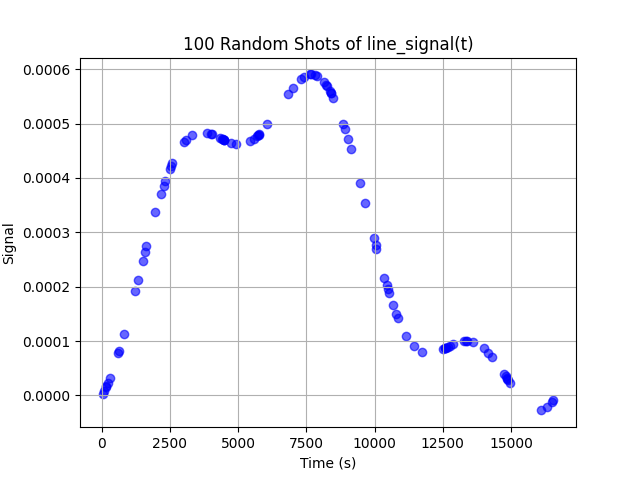

In [52]:
import numpy as np

def line_signal(t, 
                A1=0.000283762506054274, phi1=-0.7596569528155931,
                A2=8.616192521626061e-05, phi2=-1.4623968603999518,
                offset=0.0):
    return (
         A1 * np.sin(2 * np.pi * 60e-6 * t + phi1) +
         A2 * np.sin(2 * np.pi * 180e-6 * t + phi2) +
        offset
    ) - (
        A1 * np.sin(phi1) +
        A2 * np.sin(phi2) +
        offset
    )

# Number of samples
num_samples = 100

# Arrays to store the sampled time and signal values
times = np.zeros(num_samples)
values = np.zeros(num_samples)

# Take 100 random samples
for i in range(num_samples):
    t = np.random.uniform(0, 1e6/60)  # Sample time in one 60 Hz period
    times[i] = t
    values[i] = line_signal(t)

# Now you have the `times` and `values` arrays
# You can plot or analyze them as needed

# Example plot
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(times, values, color='blue', alpha=0.6)
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.title('100 Random Shots of line_signal(t)')
plt.grid(True)
plt.show()


In [182]:
import numpy as np

import numpy as np

def sample_line_signal():
    def line_signal(t, 
                    A1=0.000225, phi1=-0.575,
                    A2=0.00009, phi2=-1.455,
                    offset=0.0002234):
        return (
             A1 * np.sin(2 * np.pi * 60e-6 * t + phi1) +
             A2 * np.sin(2 * np.pi * 180e-6 * t + phi2) +
            offset
        ) - (
            A1 * np.sin(phi1) +
            A2 * np.sin(phi2) +
            offset
        )
    t = np.random.uniform(0, 1e6/60)  # Random time in one 60 Hz cycle
    return line_signal(t)


def compute_phase_and_detuning_180Hz(pulse_train, fractions, pi_t = [18.622, 31.746, 37.865, 27.596, 36.429]):
# pi_t = [18.622, 31.746, 37.865, 27.596, 36.429]
    def line_signal(t, 
                    A1=0.000225, phi1=-0.575,
                    A2=0.00009, phi2=-1.455,
                    offset=0.0002234):
        return (
            2*np.pi*A1 * np.sin(2 * np.pi * 60 * t + phi1) +
            2*np.pi*A2 * np.sin(2 * np.pi * 180 * t + phi2) +
            offset
        ) - (
            2*np.pi*A1 * np.sin(2 * np.pi * 60 * 0 + phi1) +
            2*np.pi*A2 * np.sin(2 * np.pi * 180 * 0 + phi2) +
            offset
        )
    
    
    def analytical_integral(T, 
                    A1=0.000225, phi1=-0.575,
                    A2=0.00009, phi2=-1.455,
                    offset=0.0002234):
    
        int_60 = (A1 / 60) * (np.cos(phi1) - np.cos(2 * np.pi * 60 * T + phi1))
    
        int_180 = (A2 / 180) * (np.cos(phi2) - np.cos(2 * np.pi * 180 * T + phi2))
    
        t0 = (2 * np.pi * A1 * np.sin(2 * np.pi * 60 * 0 + phi1) +
              2 * np.pi * A2 * np.sin(2 * np.pi * 180 * 0 + phi2) +
              offset)
    
        int_offset = (offset - t0) * T
        return int_60 + int_180 + int_offset

    def compute_pi_times(pi_t):
        transition_strengths = np.loadtxt(
            'Z:\\Lab Data\\Phase_and_freq_correction_180Hz\\Transition_strengths_4p216.txt', delimiter=','
        )
        transition_strengths[transition_strengths == 0] = np.nan
    
        # pi_t = np.array([19.470, 35.554, 41.166, 30.108, 39.326])
        strengths = np.array([
            transition_strengths[23, 0], transition_strengths[14, 0],
            transition_strengths[17, 4], transition_strengths[16, 4], transition_strengths[15, 4]
        ])
    
        factors = np.array(pi_t) * strengths
        Fs = [1, 2, 3, 4]
        row_labels = [[i, i - j] for i in Fs for j in range(2 * i + 1)]
        col_labels = [-2, -1, 0, 1, 2]
    
        pi_times = np.zeros((24, 5))
        for i in range(np.shape(transition_strengths)[0]):
            for j in range(np.shape(transition_strengths)[1]):
                if not np.isnan(transition_strengths[i, j]):
                    delta_m = (row_labels[i][1] - col_labels[j]) + 2
                    pi_times[i, j] = factors[delta_m] / transition_strengths[i, j]
        
        return pi_times

    def get_pi_times(transitions,matrix):
        pi_times_list = []
        for transition in transitions:
            row_label = [transition[1],transition[2]]
            Fs = [1,2,3,4]
            states = []
            for i in Fs:
                for j in range(2*i+1):
                    mF = i-j
                    states.append([i,mF])
        
            row_labels = states
        
            col_label = transition[0]
        
            # Find the index of the row label
            row_index = next((i for i, label in enumerate(row_labels) if label == row_label), None)
            # Find the index of the column label
            col_index = col_labels.index(col_label)
            
            if row_index is not None and col_index in range(len(col_labels)):
                pi_times_list.append(matrix[row_index, col_index])
            else:
                pi_times_list.append(np.nan)
    
        return pi_times_list
    
    def get_pulse_schedule(rabi_freqs, fractions):
        if len(rabi_freqs) != len(fractions):
            raise ValueError(f"rabi_freqs {len(rabi_freqs)} and fractions {len(fractions)} must have the same length.")
        times = []
        t_current = 0.0  # start time in microseconds
        for Omega, frac in zip(rabi_freqs, fractions):
            if not 0 <= frac <= 1:
                raise ValueError(f"Fraction must be between 0 and 1, got {frac}.")
            # Calculate the rotation angle and pulse duration (in microseconds)
            theta = 2.0 * np.arcsin(np.sqrt(frac))
            t_pulse = theta / Omega if Omega > 0 else 0.0
            t_start = t_current
            t_end = t_current + t_pulse
            times.append((t_start, t_end))
            t_current = t_end
        return times

    pi_times_train = get_pi_times(pulse_train,compute_pi_times(pi_t))
    rabi_frequencis_list = np.pi/np.array(pi_times_train)

    sens_matrix = np.loadtxt('Z:\Lab Data\Phase_and_freq_correction_180Hz\sensitivities_4p216.txt',delimiter=',')
    sens_list = get_pi_times(pulse_train, sens_matrix)
    
    schedule = get_pulse_schedule(rabi_frequencis_list, fractions)
    pulses_sec = [(start * 1e-6, end * 1e-6) for (start, end) in schedule]
    print(max(schedule))
    integrated_values = []
    detuning_values = []

    # For each pulse, compute the analytical integration and instantaneous detuning at the pulse start.
    for (start_s, _) in pulses_sec:
        integ = analytical_integral(start_s)
        integrated_values.append(integ)
        det = line_signal(start_s)
        detuning_values.append(det)
    
    # Convert to numpy arrays for vectorized operations.
    # print(integrated_values)
    integrated_values = np.array(integrated_values)
    detuning_values = np.array(detuning_values)
    sens_array = np.array(sens_list)
    
    # Compute phase (scaled integrated detuning) and instantaneous detuning.
    phase_180Hz = integrated_values * 1e6 * sens_array
    detuning_180Hz = detuning_values * sens_array
    
    return phase_180Hz, detuning_180Hz


def plot_contrast_decay(dimensions, ln = 1, bn = 1, cn = 1, n_180 = 1, rbf_n = 1):
    contrast = []
    total_op_time = []
    for dim in dimensions:

        T = 2*np.pi*1521.1210128727998 
        L = 2*np.pi*3038.1329363025798  
        
        sigma = np.sqrt(2)*1e6/T
        gamma = 1e6/L
        
        def V(x):
            return voigt_profile(x, sigma, gamma)
        
        
        x_min = -1000
        x_max = 1000
        res = 1000000  
        x_vals = np.linspace(x_min, x_max, 100000)
        dx = x_vals[1] - x_vals[0]
        
        V_vals = V(x_vals)
        
        cdf = np.cumsum(V_vals) * dx
        cdf /= cdf[-1]  
        
        def detuning_operator(i, j, delta_rad_us, dim):
        
            H_det = np.zeros((dim, dim), dtype=complex)
            H_det[i, i] = 0
            H_det[j, j] = -delta_rad_us
            return H_det
        
        def coupling_operator_with_phase(i, j, dim, phi):
        
            op = np.zeros((dim, dim), dtype=complex)
            op[i, j] = np.exp(+1j * phi)
            op[j, i] = np.exp(-1j * phi)
            return op
        
        def pulse_duration_for_fraction(f, Omega):
        
            if not (0 <= f <= 1):
                raise ValueError("Fraction f must be between 0 and 1.")
            theta = 2.0 * np.arcsin(np.sqrt(f))
            return theta / Omega if Omega != 0 else 0.0
        
        def simulate_sequence(couplings, rabi_freqs, rbf_variation_factor, fractions,
                              fixed_phase_flags, sim_phase_flags,phase_180Hz,
                              detunings_in_mhz,
                              dim=4, sweeping_phase=0.0):
        
            state = np.zeros(dim, dtype=complex)
            state[1] = 1.0
            # print(state)
            total_pulse_time = 0
            accumulated_phase = 0.0
            list_accumulated_phase = []
            for (levels, Omega, frac, fix_pflag, sim_pflag, p180_val, Delta_mhz) in zip(
                couplings, rabi_freqs, fractions,
                fixed_phase_flags, sim_phase_flags,phase_180Hz, detunings_in_mhz
            ):
                i, j = levels
                delta_rad_us = 2*np.pi* Delta_mhz
                phi_fixed = fix_pflag * np.pi
                phi_scan  = sim_pflag * sweeping_phase
        
                t_pulse = pulse_duration_for_fraction(frac, Omega)
                
                # print(t_pulse)
                accumulated_phase = delta_rad_us * total_pulse_time
                total_phase = phi_fixed + phi_scan + p180_val + accumulated_phase
                # print(total_phase)
                H_op = 0.5 * (Omega * (1 + rbf_variation_factor)) * coupling_operator_with_phase(i, j, dim, total_phase)

                H_det =  detuning_operator(i, j, delta_rad_us, dim)
                H_coupling =  H_op + H_det
        
        
                # Evolve the state
                U = expm(-1j * H_coupling * t_pulse)  # e^{-i H t}
                state = U @ state
                list_accumulated_phase.append(accumulated_phase)
                total_pulse_time += t_pulse
                # print(state)
                # print(total_pulse_time)
            return state, total_pulse_time

        
        def sample_voigt(n_samples):
            u = np.random.rand(n_samples)
            samples = np.interp(u, cdf, x_vals)
            return samples
        

        def calib_freq_error(n):
        
            mu = 5.5878153388
            sigma = 68.4208980916
            gamma = 21.5584249041
            # (mu=5.5878153388, sigma=68.4208980916, gamma=21.5584249041)
            # Voigt PDF
            def voigt_pdf(x):
                return voigt_profile(x - mu, sigma, gamma)
            
            # Rejection sampling
            def sample_voigt_scipy(num_samples):
                samples = []
                x_min, x_max = mu - 5*gamma, mu + 5*gamma
                x = np.linspace(x_min, x_max, 1000)
                y = voigt_pdf(x)
                ymax = y.max()
            
                while len(samples) < num_samples:
                    x_candidate = np.random.uniform(x_min, x_max)
                    y_candidate = np.random.uniform(0, ymax)
                    if y_candidate < voigt_pdf(x_candidate):
                        samples.append(x_candidate)
            
                return np.array(samples)
            return sample_voigt_scipy(n)
        
        def generate_detunings(sensitivities, num_couplings, ln , bn , cn , mag_noise_std=11.1e-6, calib_fwhm=0.000111):
        
            # mag_noise = [1 * np.random.normal(0, mag_noise_std) for s in sensitivities]
            mag_noise = np.random.normal(0,mag_noise_std, size = 1)*np.array(sensitivities)

            laser_noise = np.full(num_couplings, sample_voigt(1)[0])*1e-6
            # print(laser_noise*1e-6)
            # print(laser_noise)
            
            # calib_noise = np.full(num_couplings, cauchy.rvs(loc=-0.000001, scale=calib_fwhm, size=1)[0])
            # calib_noise =  list(np.random.normal(0,calib_fwhm, size = 1))*len(sensitivities)
            calib_noise = list(calib_freq_error(1)*1e-6) * len(sensitivities)
            # calib_noise =   list(np.random.normal(0,calib_fwhm, size=1))*len(sensitivities)
            detunings = np.array(mag_noise)*bn + np.array(laser_noise)*ln + np.array(calib_noise)*cn
            # print(laser_noise)
            return detunings


        initial_state, pulse_train_U1, fractions_U1, simulated_phase_mask_U1, fixed_phase_mask_U1, pulse_train_U2, fractions_U2, simulated_phase_mask_U2, fixed_phase_mask_U2, probe_trans = pulse_sequence(dim)

        full_pulse_train = initial_state + pulse_train_U1 + pulse_train_U2
        full_fractions = [1] + fractions_U1 + fractions_U2
        full_fixed_phases = [0] + fixed_phase_mask_U1 + fixed_phase_mask_U2
        full_simulated_phases = [0] + simulated_phase_mask_U1 + simulated_phase_mask_U2
        print(full_pulse_train)
        print(len(full_pulse_train), len(full_fractions), len(full_fixed_phases), len(full_simulated_phases))
        pi_times_list = get_pi_times(full_pulse_train)
        sens_list = get_pi_times(full_pulse_train,matrix_sen_24x5)
        rabi_frequencis_list = np.pi/np.array(pi_times_list)
        phase_180Hz,_ = compute_phase_and_detuning_180Hz(full_pulse_train[1:],full_fractions[1:])
        phase_180Hz = np.array([0] + list(phase_180Hz))
        print(phase_180Hz)
        state_mapping = assign_states(full_pulse_train)
        couplings = translate_transitions(full_pulse_train,assign_states(full_pulse_train))
        print(couplings)
        rabi_freqs = rabi_frequencis_list
        fractions  = full_fractions
        
        fixed_phase_flags = full_fixed_phases
        
        sim_phase_flags   = full_simulated_phases
        
        dim_r = max(max(pair) for pair in couplings) + 1
        detunings_in_mhz = np.zeros(len(couplings))
        if dim%2 ==0:
            phase_2 = np.pi
        else:
            phase_2 = np.pi*(dim-1)/(dim)
        phase_sweep = np.array([0, phase_2])
        # phase_sweep = np.linspace(0, 2*np.pi, 30)
        # all_populations_mc = 0#np.zeros((len(phase_sweep), dim))
        # all_experiments_list = []
        # num_shots = 1000
        
        # for _ in range(num_shots):
        #     all_populations = []
        
        #     for ph in phase_sweep:
        #         detunings_sampled = generate_detunings(sens_list, len(couplings), ln, bn, cn)
        #         detunings_sampled[0] = (detunings_sampled[0] + sample_line_signal()* sens_list[0])
        #         rbf_variation_factor = np.random.normal(loc=0.0, scale=0.0177, size=1)[0]*rbf_n
        #         # print(detunings_sampled)
        #         final_state= simulate_sequence(
        #             couplings, rabi_freqs, rbf_variation_factor, fractions,
        #             fixed_phase_flags, sim_phase_flags, phase_180Hz*bn,
        #             detunings_sampled, dim=dim_r, sweeping_phase=ph
        #         )
        #         pops = np.abs(final_state) ** 2
        #         # print(pops)
        #         all_populations.append(pops)
        #         # print(len(all_populations))
        #     all_populations_mc += np.array(all_populations)
        #     all_experiments_list.append(all_populations)
        # all_populations_mc /= num_shots
        num_shots = 1000
        all_populations_mc = []
        all_experiments_list = []
        
        for ph in phase_sweep:
            pop_accumulator = np.zeros(dim_r)
            pop_list_for_phase = []
        
            for _ in range(num_shots):
                detunings_sampled = generate_detunings(sens_list, len(couplings), ln, bn, cn)
                detunings_sampled[0] = (detunings_sampled[0] + sample_line_signal() * sens_list[0])*0
                
                rbf_variation_factor = np.random.normal(loc=0.0, scale=0.0261, size=1)[0]*rbf_n

                final_state, op_time = simulate_sequence(
                    couplings, rabi_freqs, rbf_variation_factor, fractions,
                    fixed_phase_flags, sim_phase_flags, phase_180Hz * n_180,
                    detunings_sampled, dim=dim_r, sweeping_phase=ph
                )
        
                pops = np.abs(final_state) ** 2
                pop_accumulator += pops
                pop_list_for_phase.append(pops)
        
            averaged_pop = pop_accumulator / num_shots
            all_populations_mc.append(averaged_pop)
            all_experiments_list.append(pop_list_for_phase)
        
        all_populations_mc = np.array(all_populations_mc)
        total_op_time.append(op_time - pi_times_list[0])
        
        # plt.figure(figsize = (12,6))
        # states = [key for key, value in state_mapping.items() if all(isinstance(k, int) for k in key)]
        # for i in range(dim_r):
        #     plt.plot(phase_sweep/np.pi,np.array(all_populations_mc)[:,i], label = rf'$|{i} \rangle$ - $|D_{{5/2}}, F = {states[i][0]}, m_F = {states[i][1]}\rangle$' if len(states[i]) > 1 else rf'$|{i} \rangle$ - $|S_{{1/2}}, F = 2, m_F = {states[i][0]} \rangle$')
        # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        # plt.tight_layout()  # Adjust layout to make room for the legendrect=[0.2, 0, 0.95, 1]
        # plt.xlabel("Phase")
        # plt.ylabel("Amplitude")
        # plt.title("Qudit Ramsey Phase Scan (MC)")
        # plt.grid()
        # plt.show()
        
        # plt.figure(figsize=(10, 6))
        
        # for experiment in all_experiments_list:
        #     plt.plot(phase_sweep/np.pi, np.array(experiment)[:,0], color='gray', alpha=0.3)
        
        # plt.plot(phase_sweep/np.pi, all_populations_mc[:,0], linewidth=2, label="Final Averaged Result")
        contrast.append(max(all_populations_mc[:,0]) - min(all_populations_mc[:,0]))
        print(dim, max(all_populations_mc[:,0]) - min(all_populations_mc[:,0]))
        # plt.xlabel("Phase Sweep")
        # plt.ylabel("Population")
        # plt.title("Monte Carlo Simulated Qudit Ramsey Results")
        # # plt.legend()
        # plt.grid(True)
        
        # # Show the plot
        # plt.show()
    return contrast, total_op_time

In [185]:
sample_line_signal()

0.0003270719052296747

In [187]:
import numpy as np

dimensions = list(range(2,25)) 
# dimensions = list(range(2,5))
contrasts, total_op_time = plot_contrast_decay(dimensions, ln = 1, bn = 1, cn = 1, n_180 = 1, rbf_n = 1)

[[2, 4, 2], [2, 4, 2], [2, 4, 2]]
3 3 3 3
(18.932500000000005, 37.86500000000001)
[ 0.00000000e+00 -0.00000000e+00 -2.85988662e-05]
[(0, 1), (0, 1), (0, 1)]
2 0.9896911195209188
[[-2, 4, -4], [-2, 3, -3], [-2, 4, -4], [-2, 4, -4], [-2, 3, -3]]
5 5 5 5
(31.060925720763656, 43.49985144152731)
[ 0.         -0.         -0.0001136  -0.00034902 -0.00028647]
[(0, 1), (0, 2), (0, 1), (0, 1), (0, 2)]
3 0.993921744150005
[[-2, 4, -4], [-2, 3, -2], [-2, 3, -3], [-2, 4, -4], [-2, 4, -4], [-2, 3, -3], [-2, 3, -2]]
7 7 7 7
(56.68011426229513, 69.86037708306294)
[ 0.00000000e+00  0.00000000e+00 -5.11026017e-05 -4.85228390e-04
 -9.06396170e-04 -5.85144778e-04  1.14757381e-04]
[(0, 1), (0, 2), (0, 3), (0, 1), (0, 1), (0, 3), (0, 2)]
4 0.9934447570593412
[[-2, 4, -4], [-2, 3, -1], [-2, 3, -2], [-2, 3, -3], [-2, 4, -4], [-2, 4, -4], [-2, 3, -3], [-2, 3, -2], [-2, 3, -1]]
9 9 9 9
(85.83568460895023, 101.81099213483752)
[ 0.00000000e+00  0.00000000e+00  8.92623593e-06 -2.52152272e-04
 -1.28968615e-03 -1.94

In [189]:
print(total_op_time)

[37.865000000000016, 43.49985144152731, 69.86037708306294, 101.81099213483753, 142.79766218771456, 166.35680102543472, 192.60702372172273, 222.76082339763093, 274.8377083492653, 331.10299635153353, 370.2205524132631, 418.3366200986189, 469.2937767149187, 529.5337061417117, 616.0247676247809, 796.1139642336735, 1111.394538799516, 1123.290247353966, 1163.4740102188048, 1545.0598908027077, 1553.830035842141, 2037.7717092448422, 2941.297467336918]


In [63]:
import numpy as np

dimensions = list(range(2, 25))

# Dictionary to hold contrast results for each flag
contrast_results = {}

# List of flag names
flag_names = ['ln', 'bn', 'cn', 'n_180', 'rbf_n']

# Loop over each flag, turning one on at a time
for flag in flag_names:
    flags = {k: 0 for k in flag_names}  # All flags off
    flags[flag] = 1                     # Turn on only the current flag
    
    # Call the function with current flags
    contrast = plot_contrast_decay(dimensions, **flags)
    
    # Store result
    contrast_results[flag] = contrast

# At this point, contrast_results['ln'], contrast_results['bn'], etc.
# each hold the contrast list for that specific flag


[[2, 4, 2], [2, 4, 2], [2, 4, 2]]
3 3 3 3
(18.932500000000005, 37.86500000000001)
[ 0.00000000e+00 -0.00000000e+00 -2.85988662e-05]
[(0, 1), (0, 1), (0, 1)]
2 0.9981401973572546
[[-2, 4, -4], [-2, 3, -3], [-2, 4, -4], [-2, 4, -4], [-2, 3, -3]]
5 5 5 5
(31.060925720763656, 43.49985144152731)
[ 0.         -0.         -0.0001136  -0.00034902 -0.00028647]
[(0, 1), (0, 2), (0, 1), (0, 1), (0, 2)]
3 0.9988744310332268
[[-2, 4, -4], [-2, 3, -2], [-2, 3, -3], [-2, 4, -4], [-2, 4, -4], [-2, 3, -3], [-2, 3, -2]]
7 7 7 7
(56.68011426229513, 69.86037708306294)
[ 0.00000000e+00  0.00000000e+00 -5.11026017e-05 -4.85228390e-04
 -9.06396170e-04 -5.85144778e-04  1.14757381e-04]
[(0, 1), (0, 2), (0, 3), (0, 1), (0, 1), (0, 3), (0, 2)]
4 0.9981503354487063
[[-2, 4, -4], [-2, 3, -1], [-2, 3, -2], [-2, 3, -3], [-2, 4, -4], [-2, 4, -4], [-2, 3, -3], [-2, 3, -2], [-2, 3, -1]]
9 9 9 9
(85.83568460895023, 101.81099213483752)
[ 0.00000000e+00  0.00000000e+00  8.92623593e-06 -2.52152272e-04
 -1.28968615e-03 -1.9

KeyboardInterrupt: 

In [86]:
import numpy as np

# Save (convert lists to arrays first)
np.savez('contrast_results_for_different_noise.npz', **{k: np.array(v) for k, v in contrast_results.items()})


In [166]:
data = np.load('contrast_results_for_different_noise.npz')
contrast_results = {k: data[k].tolist() for k in data}

In [168]:
print(contrast_results)

{'ln': [0.9980852771868388, 0.9988485963437128, 0.9981768201299208, 0.9964506299883154, 0.9939889023450107, 0.9919678146441911, 0.9910219912129075, 0.9885887016376128, 0.9848737021639736, 0.9789207320317721, 0.9711017373262819, 0.9660613028578797, 0.95882909600876, 0.9512242365277072, 0.9336837301833133, 0.9197081896395717, 0.8947679062330024, 0.8424206164479338, 0.863260886084083, 0.84962350657199, 0.8436894724062594, 0.8265923882221792, 0.8151276061422759], 'bn': [0.9999995760790126, 0.9999945333584495, 0.9999959141682021, 0.999975157294952, 0.9997957236112514, 0.9997311795659893, 0.9996713860620048, 0.9994623308673533, 0.9995420271568654, 0.9994042755534267, 0.9993895744080797, 0.9988252515966716, 0.9986743920590515, 0.9981820279226628, 0.9979509954352579, 0.9978582916317875, 0.9935139326612596, 0.9940704968055459, 0.9919005725060492, 0.9816276989401029, 0.9799494481766655, 0.9638760674600767, 0.9435351179623174], 'cn': [0.9998896917824815, 0.9999328109887067, 0.9998887041031712, 0.

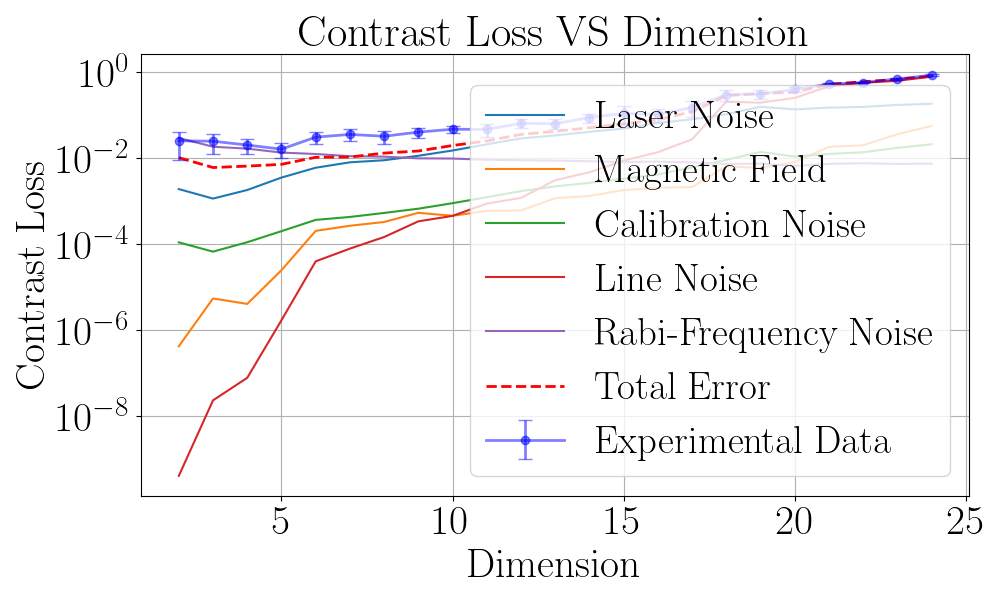

In [191]:
from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

plt.figure(figsize=(10, 6))
['ln', 'bn', 'cn', 'n_180', 'rbf_n']
label_names = {'ln': 'Laser Noise','bn': 'Magnetic Field','cn': 'Calibration Noise','n_180': 'Line Noise','rbf_n': 'Rabi-Frequency Noise'}
for flag, contrast in contrast_results.items():
    plt.plot(dimensions, 1-np.array(contrast), label=label_names[flag])

plt.plot(dimensions, 1 - np.array(contrasts), '--',linewidth=2, color = 'red', label = 'Total Error')
plt.errorbar(dimensions, 1 - np.array(unweighted_means), yerr=unweighted_stds, fmt='o-', color='blue',
             label='Experimental Data', linewidth=2, capsize=5, alpha = 0.5)

plt.xlabel('Dimension')
plt.ylabel('Contrast Loss')
plt.title('Contrast Loss VS Dimension')
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

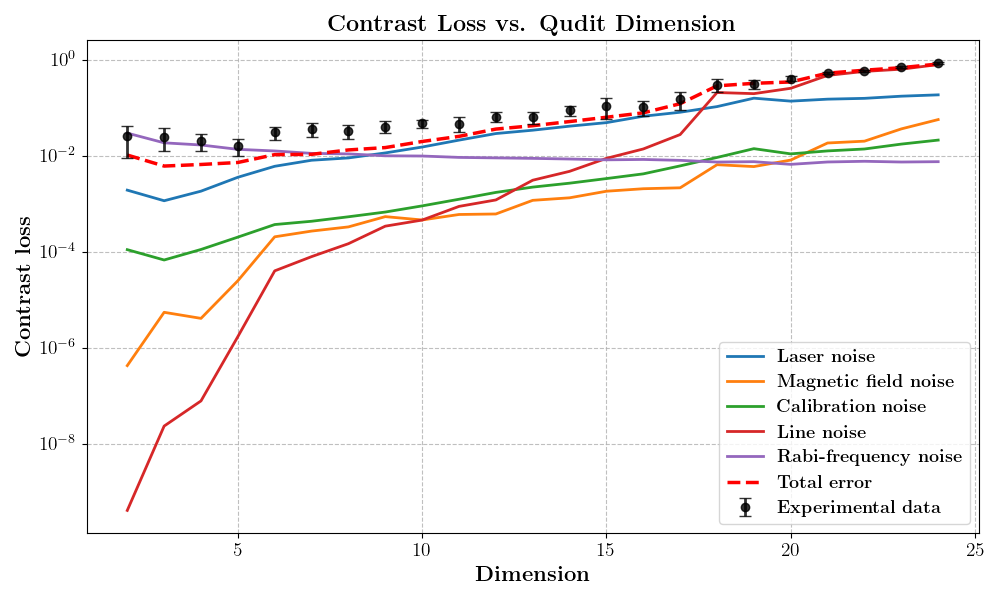

In [193]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# LaTeX and serif font setup
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True
rcParams['axes.labelsize'] = 16
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['legend.fontsize'] = 13
rcParams['axes.titlesize'] = 17

# Prepare figure
plt.figure(figsize=(10, 6))

label_names = {
    'ln': r'\textbf{Laser noise}',
    'bn': r'\textbf{Magnetic field noise}',
    'cn': r'\textbf{Calibration noise}',
    'n_180': r'\textbf{Line noise}',
    'rbf_n': r'\textbf{Rabi-frequency noise}'
}

# Plot individual contributions
for flag, contrast in contrast_results.items():
    plt.plot(dimensions, 1 - np.array(contrast), label=label_names[flag], linewidth=2)

# Plot total error
plt.plot(dimensions, 1 - np.array(contrasts), '--', linewidth=2.5, color='red', label=r'\textbf{Total error}')

# Plot experimental data with error bars
plt.errorbar(
    d_values, 1 - np.array(unweighted_means), yerr=unweighted_stds,
    fmt='o', color='black', label=r'\textbf{Experimental data}',
    linewidth=2, markersize=6, capsize=4, alpha=0.8
)

# Labels, title, formatting
plt.xlabel(r'\textbf{Dimension}')
plt.ylabel(r'\textbf{Contrast loss}')
plt.title(r'\textbf{Contrast Loss vs. Qudit Dimension}')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', alpha=0.8)
plt.legend(frameon=True, fancybox=True, framealpha=0.8)
plt.tight_layout()
plt.show()


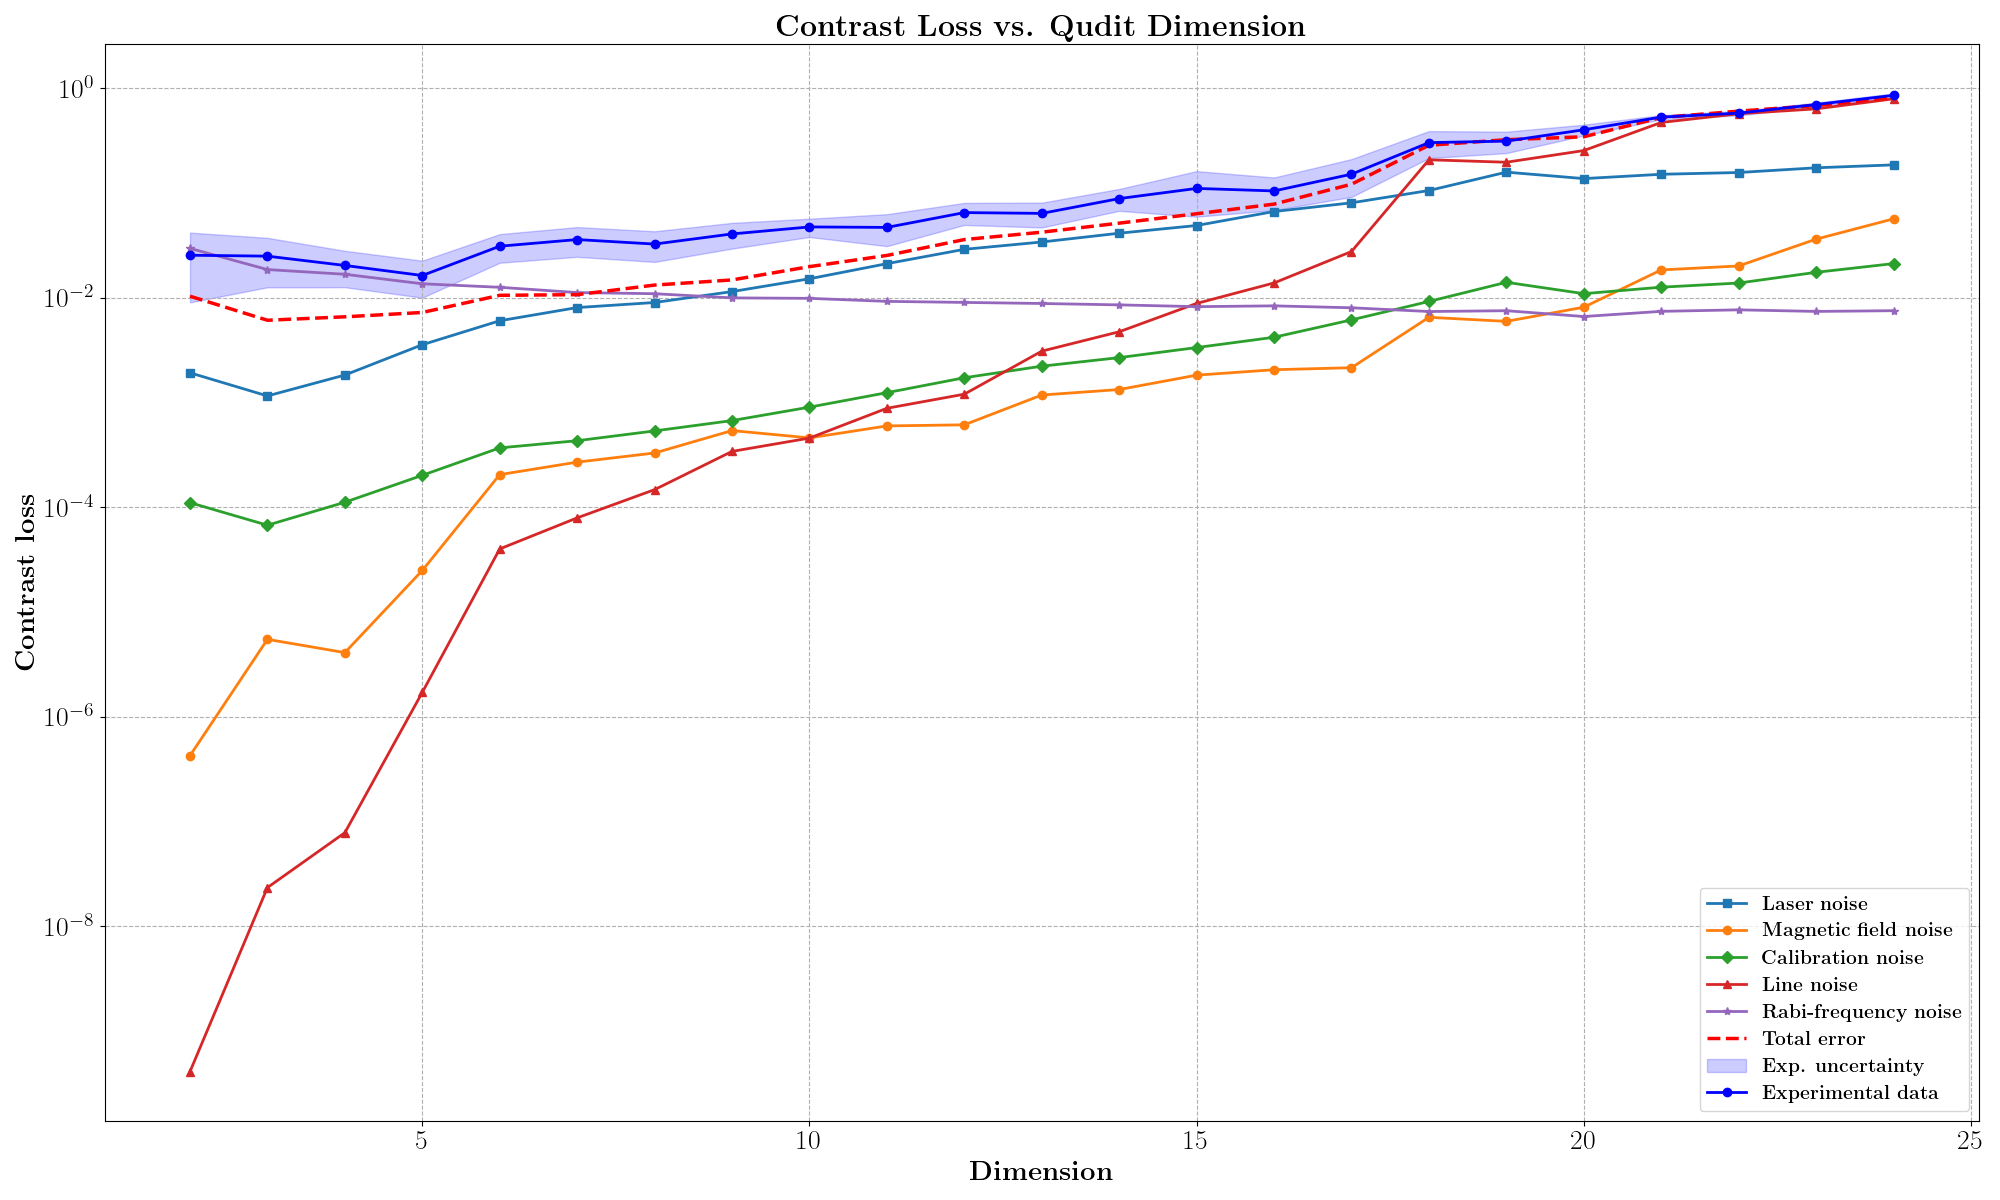

In [195]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# LaTeX and serif font setup
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True
rcParams['axes.labelsize'] = 20
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20
rcParams['legend.fontsize'] = 14
rcParams['axes.titlesize'] = 22

plt.figure(figsize=(20, 12))

# Define label names and markers for each flag
label_names = {
    'ln': r'\textbf{Laser noise}',
    'bn': r'\textbf{Magnetic field noise}',
    'cn': r'\textbf{Calibration noise}',
    'n_180': r'\textbf{Line noise}',
    'rbf_n': r'\textbf{Rabi-frequency noise}'
}
marker_styles = {
    'ln': 's',
    'bn': 'o',
    'cn': 'D',
    'n_180': '^',
    'rbf_n': '*'
}

# Plot individual theoretical noise contributions
for flag, contrast in contrast_results.items():
    plt.plot(dimensions, 1 - np.array(contrast), label=label_names[flag],
             linewidth=2, marker=marker_styles[flag], markersize=6)

# Plot total contrast loss
plt.plot(dimensions, 1 - np.array(contrasts), '--', linewidth=2.5, color='red',
         label=r'\textbf{Total error}')

# Experimental data shaded region
exp_x = np.array(d_values)
exp_y = 1 - np.array(unweighted_means)
exp_err = np.array(unweighted_stds)

plt.fill_between(exp_x, exp_y - exp_err, exp_y + exp_err, color='blue', alpha=0.2, label=r'\textbf{Exp. uncertainty}')
plt.plot(exp_x, exp_y, 'o-', color='blue', label=r'\textbf{Experimental data}', linewidth=2, markersize=6)

# Axis labels and formatting
plt.xlabel(r'\textbf{Dimension}')
plt.ylabel(r'\textbf{Contrast loss}')
plt.title(r'\textbf{Contrast Loss vs. Qudit Dimension}')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', alpha=1)
plt.legend(frameon=True, fancybox=True, framealpha=0.8)
plt.tight_layout()
plt.savefig('contrast_loss_vs_dimesions.svg')
plt.show()


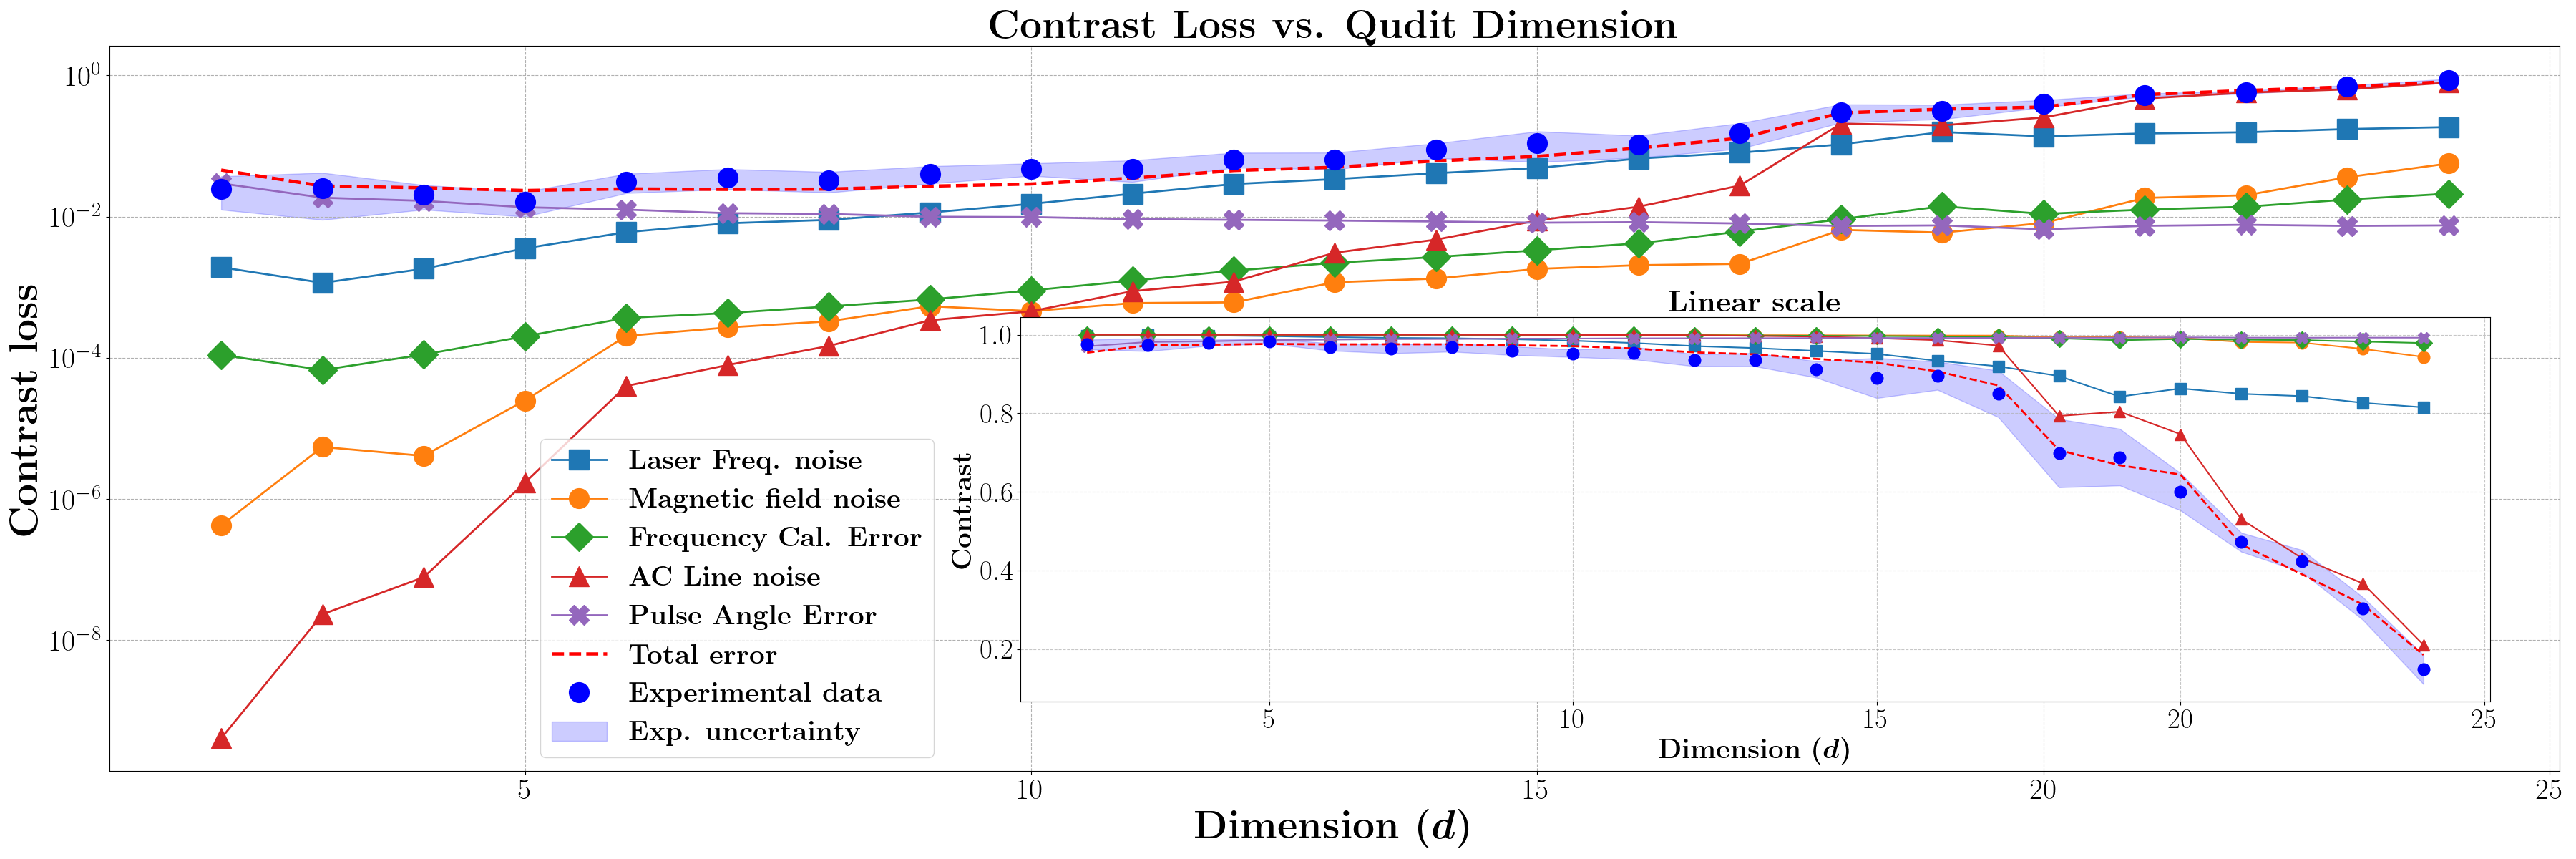

In [176]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# LaTeX and serif font setup
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True
rcParams['axes.labelsize'] = 30
rcParams['xtick.labelsize'] = 30
rcParams['ytick.labelsize'] = 30
rcParams['legend.fontsize'] = 28
rcParams['axes.titlesize'] = 32

plt.figure(figsize=(36, 12))

# Define label names and markers for each flag
label_names = {
    'ln': r'\textbf{Laser Freq. noise}',
    'bn': r'\textbf{Magnetic field noise}',
    'cn': r'\textbf{Frequency Cal. Error}',
    'n_180': r'\textbf{AC Line noise}',
    'rbf_n': r'\textbf{Pulse Angle Error}'
}
marker_styles = {
    'ln': 's',
    'bn': 'o',
    'cn': 'D',
    'n_180': '^',
    'rbf_n': 'X'
}

# Plot individual theoretical noise contributions
for flag, contrast in contrast_results.items():
    plt.plot(dimensions, 1 - np.array(contrast), label=label_names[flag],
             linewidth=2, marker=marker_styles[flag], markersize=20)

# Plot total contrast loss
plt.plot(dimensions, 1 - np.array(contrasts), '--', linewidth=3.25, color='red',
         label=r'\textbf{Total error}')

# Experimental data shaded region
exp_x = np.array(d_values)
exp_y = 1 - np.array(unweighted_means)
exp_err = np.array(unweighted_stds)



plt.plot(exp_x, exp_y, 'o', color='blue', label=r'\textbf{Experimental data}', linewidth=2, markersize=20)
plt.fill_between(exp_x, exp_y - exp_err, exp_y + exp_err, color='blue', alpha=0.2, label=r'\textbf{Exp. uncertainty}')


# Axis labels and formatting
plt.xlabel(r'\textbf{Dimension \boldmath$(d)$}',fontsize = 40)
plt.ylabel(r'\textbf{Contrast loss}',fontsize = 40)
plt.title(r'\textbf{Contrast Loss vs. Qudit Dimension}',fontsize = 40)
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', alpha=1)
# plt.legend(frameon=True, fancybox=True, framealpha=0.8, loc = 'lower left')


# Legend: move to right of plot
plt.legend(frameon=True, fancybox=True, framealpha=0.8,
           loc='lower left', bbox_to_anchor=(0.17, 0.0))
plt.tight_layout()
# Inset axes (shifted up slightly and smaller)
ax_inset = inset_axes(plt.gca(), width="60%", height="53%",
                      loc='lower right', borderpad=2.5)

# ax_inset = inset_axes(plt.gca(), width="55%", height="55%", loc='lower right', borderpad=2)

# Plot again in inset with linear y-scale
for flag, contrast in contrast_results.items():
    ax_inset.plot(dimensions, np.array(contrast), linewidth=1.5, marker=marker_styles[flag], markersize=12)
exp_y = np.array(unweighted_means)
ax_inset.plot(dimensions, np.array(contrasts), '--', linewidth=2, color='red')
ax_inset.plot(exp_x, exp_y, 'o', color='blue', linewidth=2.25, markersize=12)
ax_inset.fill_between(exp_x, exp_y - exp_err, exp_y + exp_err, color='blue', alpha=0.2)

ax_inset.set_title(r'\textbf{Linear scale}', fontsize=30)
ax_inset.set_xlabel(r'\textbf{Dimension} \boldmath$(d)$', fontsize=28)
ax_inset.set_ylabel(r'\textbf{Contrast}', fontsize=28)
ax_inset.tick_params(labelsize=28)
ax_inset.grid(True, linestyle='--', alpha=0.7)

# Save and show
plt.savefig('contrast_loss_vs_dimensions_with_inset.svg')
plt.show()


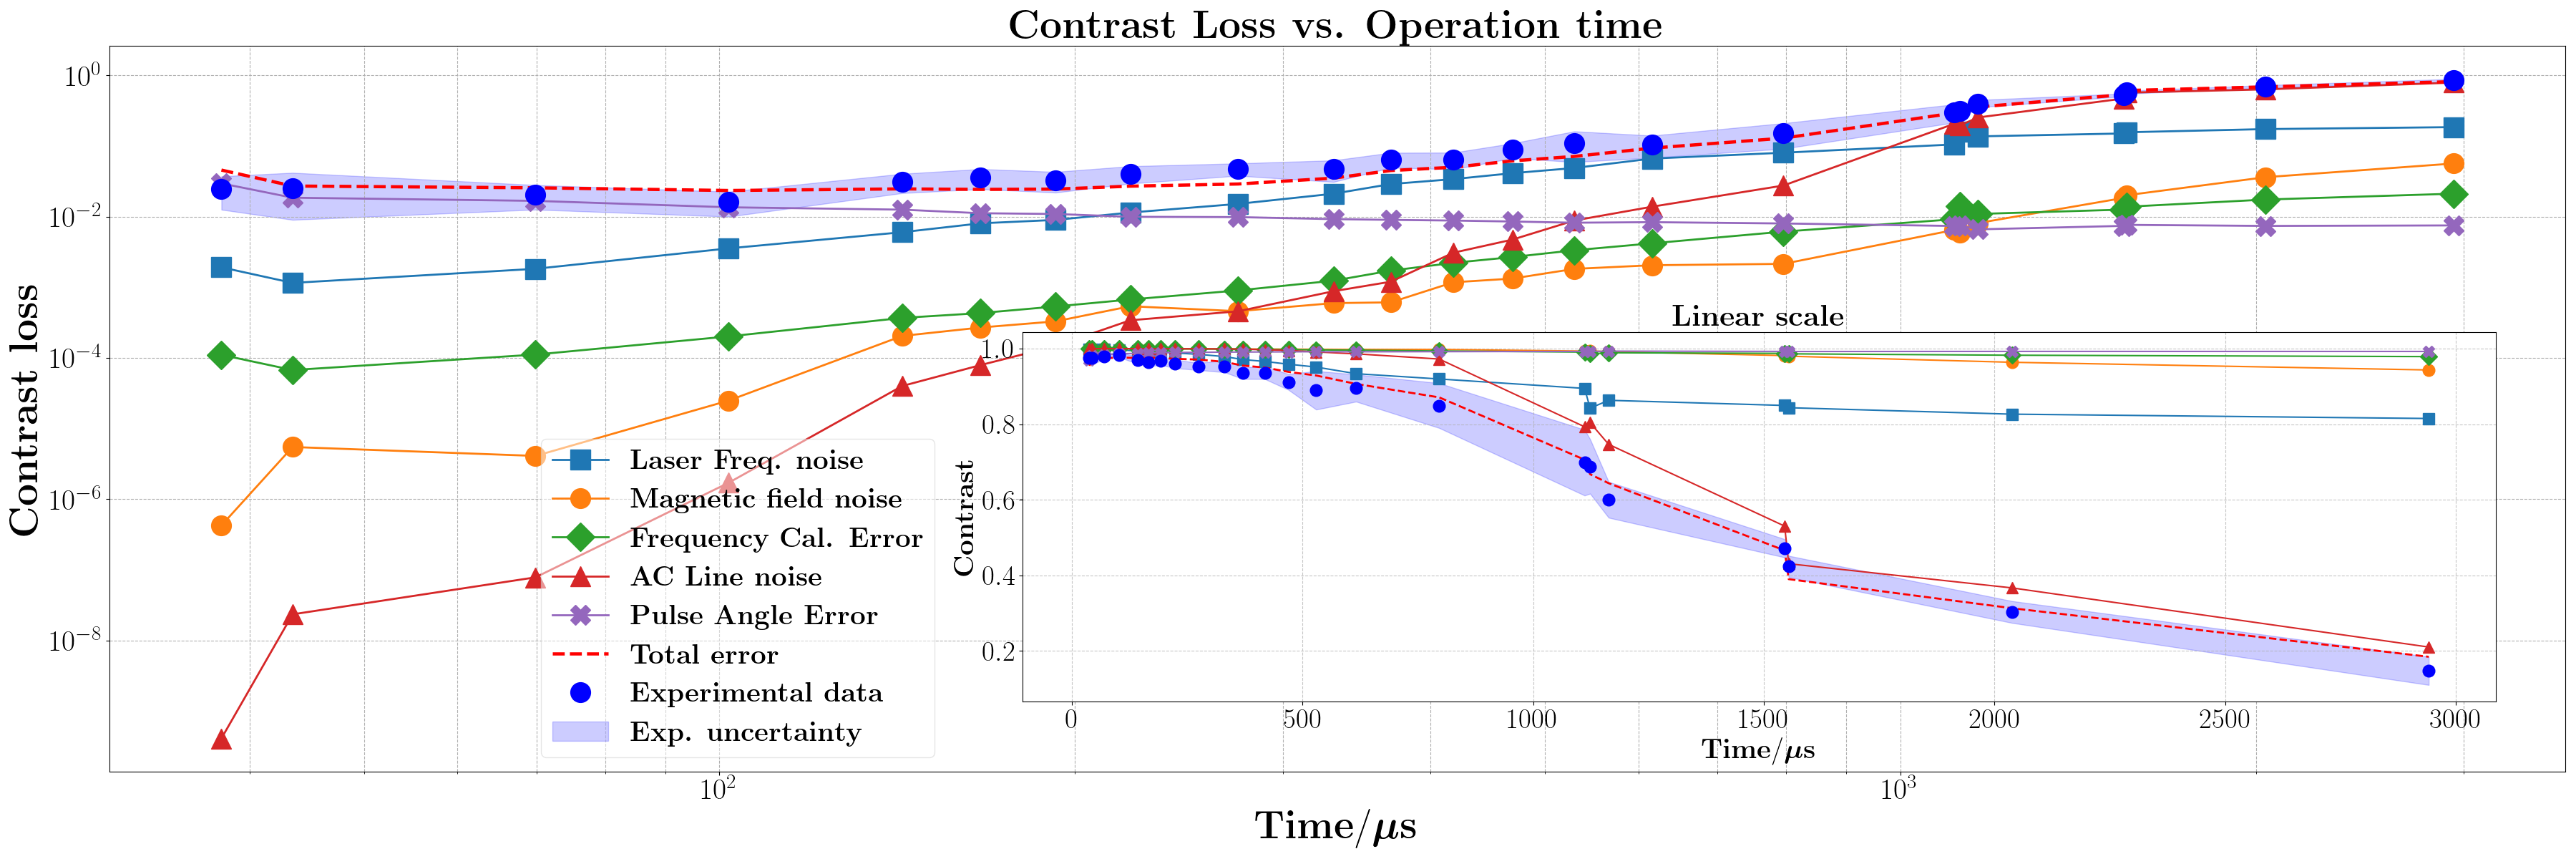

In [178]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# LaTeX and serif font setup
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True
rcParams['axes.labelsize'] = 30
rcParams['xtick.labelsize'] = 30
rcParams['ytick.labelsize'] = 30
rcParams['legend.fontsize'] = 28
rcParams['axes.titlesize'] = 32

plt.figure(figsize=(36, 12))

# Define label names and markers for each flag
label_names = {
    'ln': r'\textbf{Laser Freq. noise}',
    'bn': r'\textbf{Magnetic field noise}',
    'cn': r'\textbf{Frequency Cal. Error}',
    'n_180': r'\textbf{AC Line noise}',
    'rbf_n': r'\textbf{Pulse Angle Error}'
}
marker_styles = {
    'ln': 's',
    'bn': 'o',
    'cn': 'D',
    'n_180': '^',
    'rbf_n': 'X'
}

# Sort everything by total_op_time
# sorted_indices = np.argsort(total_op_time)
# total_op_time = np.array(total_op_time)[sorted_indices]
# contrasts = np.array(contrasts)[sorted_indices]
# unweighted_means = np.array(unweighted_means)[sorted_indices]
# unweighted_stds = np.array(unweighted_stds)[sorted_indices]

# # Sort each noise channel
# for flag in contrast_results:
#     contrast_results[flag] = np.array(contrast_results[flag])[sorted_indices]


# Plot individual theoretical noise contributions
for flag, contrast in contrast_results.items():
    plt.plot(total_op_time, 1 - np.array(contrast), label=label_names[flag],
             linewidth=2, marker=marker_styles[flag], markersize=20)

# Plot total contrast loss
plt.plot(total_op_time, 1 - np.array(contrasts), '--', linewidth=3.25, color='red',
         label=r'\textbf{Total error}')

# Experimental data shaded region
exp_x = np.array(total_op_time)
exp_y = 1 - np.array(unweighted_means)
exp_err = np.array(unweighted_stds)



plt.plot(exp_x, exp_y, 'o', color='blue', label=r'\textbf{Experimental data}', linewidth=2, markersize=20)
plt.fill_between(exp_x, exp_y - exp_err, exp_y + exp_err, color='blue', alpha=0.2, label=r'\textbf{Exp. uncertainty}')


# Axis labels and formatting
plt.xlabel(r'\textbf{Time}/\boldmath$\mu$\textbf{s}',fontsize = 40)
plt.ylabel(r'\textbf{Contrast loss}',fontsize = 40)
plt.title(r'\textbf{Contrast Loss vs. Operation time}',fontsize = 40)
plt.yscale('log')
plt.xscale('log')
plt.grid(True, which='both', linestyle='--', alpha=1)
# plt.legend(frameon=True, fancybox=True, framealpha=0.8, loc = 'lower left')


# Legend: move to right of plot
plt.legend(frameon=True, fancybox=True, framealpha=0.5,
           loc='lower left', bbox_to_anchor=(0.17, 0.0))
plt.tight_layout()
# Inset axes (shifted up slightly and smaller)
ax_inset = inset_axes(plt.gca(), width="60%", height="51%",
                      loc='lower right', borderpad=2.5)

# ax_inset = inset_axes(plt.gca(), width="55%", height="55%", loc='lower right', borderpad=2)

# Plot again in inset with linear y-scale
for flag, contrast in contrast_results.items():
    ax_inset.plot(total_op_time, np.array(contrast), linewidth=1.5, marker=marker_styles[flag], markersize=12)
exp_y = np.array(unweighted_means)
ax_inset.plot(total_op_time, np.array(contrasts), '--', linewidth=2, color='red')
ax_inset.plot(exp_x, exp_y, 'o', color='blue', linewidth=2.25, markersize=12)
ax_inset.fill_between(exp_x, exp_y - exp_err, exp_y + exp_err, color='blue', alpha=0.2)

ax_inset.set_title(r'\textbf{Linear scale}', fontsize=30)
ax_inset.set_xlabel(r'\textbf{Time}/\boldmath$\mu$\textbf{s}', fontsize=28)
ax_inset.set_ylabel(r'\textbf{Contrast}', fontsize=28)
ax_inset.tick_params(labelsize=28)
ax_inset.grid(True, linestyle='--', alpha=0.7)

# Save and show
plt.savefig('contrast_loss_vs_time_with_inset.svg')
plt.show()


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24] [0.9589708559688828, 0.9709905794673971, 0.9739591476532603, 0.9766807134398529, 0.9762720740250874, 0.9749431196592855, 0.9743864627030191, 0.9720665128636553, 0.9712673516732256, 0.9650572099632218, 0.9568800061535128, 0.9453614584409636, 0.9377117900054817, 0.9268196672566373, 0.9070498389443142, 0.8793616815003135, 0.7120560184746759, 0.6703117016883193, 0.6496127335080599, 0.4664186953161778, 0.39045560524136413, 0.316055415126657, 0.18291587407481164]


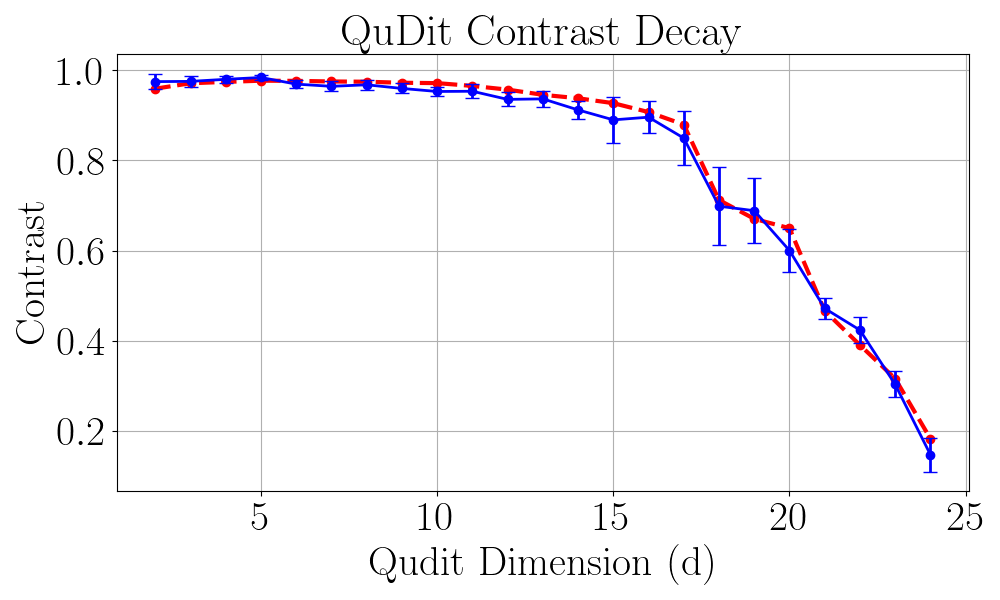

In [101]:
d_values =  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
unweighted_means=[0.9746243198941509, 0.9751331792118328, 0.9797303991429688, 0.9837478129419317, 0.9690606017845903, 0.9641878187262762, 0.9675687023658773, 0.9594827412225081, 0.9527347070014405, 0.9532257567061488, 0.9352135485420109, 0.9363541918033307, 0.9118685926204764, 0.8897933171677727, 0.8957499175744237, 0.8493528120901896, 0.6983903756295652, 0.6884042053391878, 0.6001455194916206, 0.47174465948903943, 0.423691002873044, 0.30320230936182024, 0.14746244066767547]
unweighted_stds=[0.016373191318695125, 0.012330684111125057, 0.007710487534255474, 0.006268496962386803, 0.009434733545819859, 0.01130959042861035, 0.010533886493173694, 0.011161545617521584, 0.009387868943129585, 0.015799638069944895, 0.01538691348590878, 0.016951926914623078, 0.02080906329883904, 0.05102492568262053, 0.03592436216639484, 0.05927903410830684, 0.08698960254342508, 0.07209466766852173, 0.04747811360113549, 0.024157382573218956, 0.028219982152040197, 0.0289084568561744, 0.037331568223632344]

plt.figure(figsize = (10,6))
plt.plot(d_values, np.array(contrasts), 'o--',linewidth=3, color = 'red')
plt.errorbar(d_values, unweighted_means, yerr=unweighted_stds, fmt='o-', color='blue',
             label='Experimental Data', linewidth=2, capsize=5)
print(dimensions, contrasts)
plt.xlabel('Qudit Dimension (d)')
plt.ylabel('Contrast')
# plt.yscale('log')
plt.title('QuDit Contrast Decay')
plt.grid()
plt.tight_layout()
plt.show()

## testing 

In [686]:
import numpy as np

import numpy as np

import numpy as np 
from scipy.io import loadmat
transition_strengths = np.array([[np.nan, 0.0563, 0.055, 0.0519, 0.0341],
                        [0.0753, 0.0246, 0.0096, 0.0336, 0.056],
                        [0.053, 0.0598, 0.047, 0.0355, np.nan],
                        [np.nan, np.nan, 0.1103, 0.1061, 0.0819],
                        [np.nan, 0.1273, 0.0275, 0.0613, 0.0981],
                        [0.0973, 0.0635, 0.0919, 0.0258, 0.0932],
                        [0.1163, 0.0281, 0.0575, 0.107, np.nan],
                        [0.1105, 0.1056, 0.0814, np.nan, np.nan],
                        [np.nan, np.nan, np.nan, 0.2813, 0.0091],
                        [np.nan, np.nan, 0.2288, 0.1549, 0.0415],
                        [np.nan, 0.1517, 0.2135, 0.0697, 0.0446],
                        [0.0763, 0.2008, 0.1741, 0.003, 0.0359],
                        [0.1367, 0.2351, 0.0773, 0.039, np.nan],
                        [0.2241, 0.1763, 0.0106, np.nan, np.nan],
                        [0.268, 0.0634, np.nan, np.nan, np.nan],
                        [np.nan, np.nan, np.nan, np.nan, 0.3278],
                        [np.nan, np.nan, np.nan, 0.0828, 0.268],
                        [np.nan, np.nan, 0.0019, 0.1664, 0.234],
                        [np.nan, 0.025, 0.0679, 0.2278, 0.1523],
                        [0.0232, 0.001, 0.156, 0.2077, 0.0915],
                        [0.0309, 0.0593, 0.206, 0.1694, np.nan],
                        [0.0276, 0.1438, 0.2401, np.nan, np.nan],
                        [0.0094, 0.2862, np.nan, np.nan, np.nan],
                        [0.3278, np.nan, np.nan, np.nan, np.nan]])

import numpy as np

transition_strengths = np.loadtxt('Z:\Lab Data\Phase_and_freq_correction_180Hz\Transition_strengths_4p216.txt',delimiter=',')  # Assumes space-delimited file
transition_strengths[transition_strengths == 0] = np.nan
# print(transition_strengths)


pi_t = [18.622, 31.746, 37.865, 27.596, 36.429]
strengths = np.array([transition_strengths[23,0],transition_strengths[14,0],transition_strengths[17,4],transition_strengths[16,4],transition_strengths[15,4]])
pitime_n2 = pi_t[0] # [-2, 4, -4]
pitime_n1 = pi_t[1] # [-2, 3, -3]
pitime_0 = pi_t[2] # [2, 4, 2]
pitime_p1 = pi_t[3] # [2, 4, 3]
pitime_p2 = pi_t[4] # [2, 4, 4]

pi_t = np.array([pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2])
factors = pi_t * strengths
Fs = [1,2,3,4]
row_labels = []
for i in Fs:
    for j in range(2*i+1):
        mF = i-j
        row_labels.append([i,mF])
col_labels = [-2, -1, 0, 1, 2]

pi_times = np.zeros((24,5))
for i in range(np.shape(transition_strengths)[0]):
    for j in range(np.shape(transition_strengths)[1]):
        # print(i,j)
        if not np.isnan(transition_strengths[i,j]):

            delta_m = (row_labels[i][1]-col_labels[j])+2

            pi_times[i,j] = factors[delta_m]/transition_strengths[i,j]


def get_pi_time_matrix(pi_t = [18.622, 31.746, 37.865, 27.596, 36.429]):
    strengths = np.array([transition_strengths[23,0],transition_strengths[14,0],transition_strengths[17,4],transition_strengths[16,4],transition_strengths[15,4]])
    pitime_n2 = pi_t[0] # [-2, 4, -4]
    pitime_n1 = pi_t[1] # [-2, 3, -3]
    pitime_0 = pi_t[2] # [2, 4, 2]
    pitime_p1 = pi_t[3] # [2, 4, 3]
    pitime_p2 = pi_t[4] # [2, 4, 4]
    
    pi_t = np.array([pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2])
    factors = pi_t * strengths
    Fs = [1,2,3,4]
    row_labels = []
    for i in Fs:
        for j in range(2*i+1):
            mF = i-j
            row_labels.append([i,mF])
    col_labels = [-2, -1, 0, 1, 2]
    
    pi_times = np.zeros((24,5))
    for i in range(np.shape(transition_strengths)[0]):
        for j in range(np.shape(transition_strengths)[1]):
            # print(i,j)
            if not np.isnan(transition_strengths[i,j]):
    
                delta_m = (row_labels[i][1]-col_labels[j])+2
    
                pi_times[i,j] = factors[delta_m]/transition_strengths[i,j]
    return pi_times

pi_times = get_pi_time_matrix(pi_t)
print(pi_times)
def get_pi_times(transitions,matrix = pi_times):
    pi_times_list = []
    for transition in transitions:
        row_label = [transition[1],transition[2]]
        Fs = [1,2,3,4]
        states = []
        for i in Fs:
            for j in range(2*i+1):
                mF = i-j
                states.append([i,mF])
    
        row_labels = states
    
        col_label = transition[0]
    
        # Find the index of the row label
        row_index = next((i for i, label in enumerate(row_labels) if label == row_label), None)
        # Find the index of the column label
        col_index = col_labels.index(col_label)
        
        if row_index is not None and col_index in range(len(col_labels)):
            pi_times_list.append(matrix[row_index, col_index])
        else:
            pi_times_list.append(np.nan)

    return pi_times_list

def get_pulse_schedule(rabi_freqs, fractions):
    if len(rabi_freqs) != len(fractions):
        raise ValueError("rabi_freqs and fractions must have the same length.")
    
    times = []
    t_current = 0.0  # microseconds (start at time=0)
    
    for Omega, frac in zip(rabi_freqs, fractions):
        if not 0 <= frac <= 1:
            raise ValueError(f"Fraction must be between 0 and 1, got {frac}.")
        
        # Calculate the rotation angle and the pulse duration
        theta = 2.0 * np.arcsin(np.sqrt(frac))   # in radians
        t_pulse = theta / Omega if Omega > 0 else 0.0  # microseconds (if Omega in MHz)
        
        # The pulse starts at t_current, ends at t_current + t_pulse
        t_start = t_current
        t_end = t_current + t_pulse
        
        times.append((t_start, t_end))
        t_current = t_end  # next pulse starts after this one finishes
    
    return times

mat_data = loadmat('sensitivity_matrix_4p216G.mat')

matrix_sen_24x5 = mat_data['S']
matrix_sen_24x5[np.isnan(transition_strengths)] = np.nan
np.savetxt('sensitivities_4p216.txt',matrix_sen_24x5, delimiter=',')
sens_matrix = np.loadtxt('Z:\Lab Data\Phase_and_freq_correction_180Hz\sensitivities_4p216.txt',delimiter=',')
# print(sens_matrix)
# print(matrix_sen_24x5)

def sample_line_signal():
    def line_signal(t, 
                    A1=0.000225, phi1=-0.575,
                    A2=0.00009, phi2=-1.455,
                    offset=0.0002234):
        return (
             A1 * np.sin(2 * np.pi * 60e-6 * t + phi1) +
             A2 * np.sin(2 * np.pi * 180e-6 * t + phi2) +
            offset
        ) - (
            A1 * np.sin(phi1) +
            A2 * np.sin(phi2) +
            offset
        )
    t = np.random.uniform(0, 1e6/60)  # Random time in one 60 Hz cycle
    return line_signal(t)


def compute_phase_and_detuning_180Hz(pulse_train, fractions, pi_t = [18.622, 31.746, 37.865, 27.596, 36.429]):
# pi_t = [18.622, 31.746, 37.865, 27.596, 36.429]
    def line_signal(t, 
                    A1=0.000225, phi1=-0.575,
                    A2=0.00009, phi2=-1.455,
                    offset=0.0002234):
        return (
            2*np.pi*A1 * np.sin(2 * np.pi * 60 * t + phi1) +
            2*np.pi*A2 * np.sin(2 * np.pi * 180 * t + phi2) +
            offset
        ) - (
            2*np.pi*A1 * np.sin(2 * np.pi * 60 * 0 + phi1) +
            2*np.pi*A2 * np.sin(2 * np.pi * 180 * 0 + phi2) +
            offset
        )
    
    
    def analytical_integral(T, 
                    A1=0.000225, phi1=-0.575,
                    A2=0.00009, phi2=-1.455,
                    offset=0.0002234):
    
        int_60 = (A1 / 60) * (np.cos(phi1) - np.cos(2 * np.pi * 60 * T + phi1))
    
        int_180 = (A2 / 180) * (np.cos(phi2) - np.cos(2 * np.pi * 180 * T + phi2))
    
        t0 = (2 * np.pi * A1 * np.sin(2 * np.pi * 60 * 0 + phi1) +
              2 * np.pi * A2 * np.sin(2 * np.pi * 180 * 0 + phi2) +
              offset)
    
        int_offset = (offset - t0) * T
        return int_60 + int_180 + int_offset

    def compute_pi_times(pi_t):
        transition_strengths = np.loadtxt(
            'Z:\\Lab Data\\Phase_and_freq_correction_180Hz\\Transition_strengths_4p216.txt', delimiter=','
        )
        transition_strengths[transition_strengths == 0] = np.nan
    
        # pi_t = np.array([19.470, 35.554, 41.166, 30.108, 39.326])
        strengths = np.array([
            transition_strengths[23, 0], transition_strengths[14, 0],
            transition_strengths[17, 4], transition_strengths[16, 4], transition_strengths[15, 4]
        ])
    
        factors = np.array(pi_t) * strengths
        Fs = [1, 2, 3, 4]
        row_labels = [[i, i - j] for i in Fs for j in range(2 * i + 1)]
        col_labels = [-2, -1, 0, 1, 2]
    
        pi_times = np.zeros((24, 5))
        for i in range(np.shape(transition_strengths)[0]):
            for j in range(np.shape(transition_strengths)[1]):
                if not np.isnan(transition_strengths[i, j]):
                    delta_m = (row_labels[i][1] - col_labels[j]) + 2
                    pi_times[i, j] = factors[delta_m] / transition_strengths[i, j]
        
        return pi_times

    def get_pi_times(transitions,matrix):
        pi_times_list = []
        for transition in transitions:
            row_label = [transition[1],transition[2]]
            Fs = [1,2,3,4]
            states = []
            for i in Fs:
                for j in range(2*i+1):
                    mF = i-j
                    states.append([i,mF])
        
            row_labels = states
        
            col_label = transition[0]
        
            # Find the index of the row label
            row_index = next((i for i, label in enumerate(row_labels) if label == row_label), None)
            # Find the index of the column label
            col_index = col_labels.index(col_label)
            
            if row_index is not None and col_index in range(len(col_labels)):
                pi_times_list.append(matrix[row_index, col_index])
            else:
                pi_times_list.append(np.nan)
    
        return pi_times_list
    
    def get_pulse_schedule(rabi_freqs, fractions):
        if len(rabi_freqs) != len(fractions):
            raise ValueError(f"rabi_freqs {len(rabi_freqs)} and fractions {len(fractions)} must have the same length.")
        times = []
        t_current = 0.0  # start time in microseconds
        for Omega, frac in zip(rabi_freqs, fractions):
            if not 0 <= frac <= 1:
                raise ValueError(f"Fraction must be between 0 and 1, got {frac}.")
            # Calculate the rotation angle and pulse duration (in microseconds)
            theta = 2.0 * np.arcsin(np.sqrt(frac))
            t_pulse = theta / Omega if Omega > 0 else 0.0
            t_start = t_current
            t_end = t_current + t_pulse
            times.append((t_start, t_end))
            t_current = t_end
        return times

    pi_times_train = get_pi_times(pulse_train,compute_pi_times(pi_t))
    rabi_frequencis_list = np.pi/np.array(pi_times_train)

    sens_matrix = np.loadtxt('Z:\Lab Data\Phase_and_freq_correction_180Hz\sensitivities_4p216.txt',delimiter=',')
    sens_list = get_pi_times(pulse_train, sens_matrix)
    
    schedule = get_pulse_schedule(rabi_frequencis_list, fractions)
    pulses_sec = [(start * 1e-6, end * 1e-6) for (start, end) in schedule]
    # print(schedule)
    integrated_values = []
    detuning_values = []

    # For each pulse, compute the analytical integration and instantaneous detuning at the pulse start.
    for (start_s, _) in pulses_sec:
        integ = analytical_integral(start_s)
        integrated_values.append(integ)
        det = line_signal(start_s)
        detuning_values.append(det)
    
    # Convert to numpy arrays for vectorized operations.
    # print(integrated_values)
    integrated_values = np.array(integrated_values)
    detuning_values = np.array(detuning_values)
    sens_array = np.array(sens_list)
    
    # Compute phase (scaled integrated detuning) and instantaneous detuning.
    phase_180Hz = integrated_values * 1e6 * sens_array
    detuning_180Hz = detuning_values * sens_array
    
    return phase_180Hz, detuning_180Hz


def plot_contrast_decay(dimensions, pi_t_dict, ln = 1, bn = 1, cn = 1, n_180 = 1, rbf_n = 1):
    contrast = []
    for dim in dimensions:
        pi_t = pi_t_dict[str(dim)]
        T = 2*np.pi*1521.1210128727998 
        L = 2*np.pi*3038.1329363025798  
        
        sigma = np.sqrt(2)*1e6/T
        gamma = 1e6/L
        
        def V(x):
            return voigt_profile(x, sigma, gamma)
        
        
        x_min = -1000
        x_max = 1000
        res = 1000000  
        x_vals = np.linspace(x_min, x_max, 100000)
        dx = x_vals[1] - x_vals[0]
        
        V_vals = V(x_vals)
        
        cdf = np.cumsum(V_vals) * dx
        cdf /= cdf[-1]  
        
        def detuning_operator(i, j, delta_rad_us, dim):
        
            H_det = np.zeros((dim, dim), dtype=complex)
            H_det[i, i] = 0
            H_det[j, j] = -delta_rad_us
            return H_det
        
        def coupling_operator_with_phase(i, j, dim, phi):
        
            op = np.zeros((dim, dim), dtype=complex)
            op[i, j] = np.exp(+1j * phi)
            op[j, i] = np.exp(-1j * phi)
            return op
        
        def pulse_duration_for_fraction(f, Omega):
        
            if not (0 <= f <= 1):
                raise ValueError("Fraction f must be between 0 and 1.")
            theta = 2.0 * np.arcsin(np.sqrt(f))
            return theta / Omega if Omega != 0 else 0.0
        
        def simulate_sequence(couplings, rabi_freqs, rbf_variation_factor, fractions,
                              fixed_phase_flags, sim_phase_flags,phase_180Hz, detunings_180Hz,
                              detunings_in_mhz,
                              dim=4, sweeping_phase=0.0):
        
            state = np.zeros(dim, dtype=complex)
            state[1] = 1.0
            # print(state)
            total_pulse_time = 0
            accumulated_phase = 0.0
            list_accumulated_phase = []
            for (levels, Omega, frac, fix_pflag, sim_pflag, p180_val, d180_val, Delta_mhz) in zip(
                couplings, rabi_freqs, fractions,
                fixed_phase_flags, sim_phase_flags,phase_180Hz, detunings_180Hz, detunings_in_mhz
            ):
                i, j = levels
                delta_rad_us = 2*np.pi* (Delta_mhz) + d180_val
                # print('detunings_180Hz = ', d180_val)
                # print('detunings = ',delta_rad_us)
                phi_fixed = fix_pflag * np.pi
                phi_scan  = sim_pflag * sweeping_phase
        
                t_pulse = pulse_duration_for_fraction(frac, Omega)  
                # print(t_pulse)
                accumulated_phase = delta_rad_us * total_pulse_time
                total_phase = phi_fixed + phi_scan + p180_val + accumulated_phase
                # print(total_phase)
                H_op = 0.5 * (Omega * (1 + rbf_variation_factor)) * coupling_operator_with_phase(i, j, dim, total_phase)

                H_det =  detuning_operator(i, j, delta_rad_us, dim)
                H_coupling =  H_op + H_det
        
        
                # Evolve the state
                U = expm(-1j * H_coupling * t_pulse)  # e^{-i H t}
                state = U @ state
                list_accumulated_phase.append(accumulated_phase)
                total_pulse_time += t_pulse
                # print(state)
                # print(total_pulse_time)
            return state

        
        def sample_voigt(n_samples):
            u = np.random.rand(n_samples)
            samples = np.interp(u, cdf, x_vals)
            return samples
        

        def calib_freq_error(n):
        
            mu = 5.5878153388
            sigma = 68.4208980916
            gamma = 21.5584249041
            # (mu=5.5878153388, sigma=68.4208980916, gamma=21.5584249041)
            # Voigt PDF
            def voigt_pdf(x):
                return voigt_profile(x - mu, sigma, gamma)
            
            # Rejection sampling
            def sample_voigt_scipy(num_samples):
                samples = []
                x_min, x_max = mu - 5*gamma, mu + 5*gamma
                x = np.linspace(x_min, x_max, 1000)
                y = voigt_pdf(x)
                ymax = y.max()
            
                while len(samples) < num_samples:
                    x_candidate = np.random.uniform(x_min, x_max)
                    y_candidate = np.random.uniform(0, ymax)
                    if y_candidate < voigt_pdf(x_candidate):
                        samples.append(x_candidate)
            
                return np.array(samples)
            return sample_voigt_scipy(n)
        
        def generate_detunings(sensitivities, num_couplings, ln , bn , cn , mag_noise_std=(4.9e-5)/(np.sqrt(2)*np.pi), calib_fwhm=0.000111):
        
            # mag_noise = [1 * np.random.normal(0, mag_noise_std) for s in sensitivities]
            mag_noise = np.random.normal(0,mag_noise_std, size = 1)*np.array(sensitivities)

            laser_noise = np.full(num_couplings, sample_voigt(1)[0])*1e-6
            # print(laser_noise*1e-6)
            # print(laser_noise)
            
            # calib_noise = np.full(num_couplings, cauchy.rvs(loc=-0.000001, scale=calib_fwhm, size=1)[0])
            # calib_noise =  list(np.random.normal(0,calib_fwhm, size = 1))*len(sensitivities)
            calib_noise = list(calib_freq_error(1)*1e-6) * len(sensitivities)
            # calib_noise =   list(np.random.normal(0,calib_fwhm, size=1))*len(sensitivities)
            detunings = np.array(mag_noise)*bn + np.array(laser_noise)*ln + np.array(calib_noise)*cn
            # print(laser_noise)
            return detunings


        initial_state, pulse_train_U1, fractions_U1, simulated_phase_mask_U1, fixed_phase_mask_U1, pulse_train_U2, fractions_U2, simulated_phase_mask_U2, fixed_phase_mask_U2, probe_trans = pulse_sequence(dim)

        full_pulse_train = initial_state + pulse_train_U1 + pulse_train_U2
        full_fractions = [1] + fractions_U1 + fractions_U2
        full_fixed_phases = [0] + fixed_phase_mask_U1 + fixed_phase_mask_U2
        full_simulated_phases = [0] + simulated_phase_mask_U1 + simulated_phase_mask_U2
        print(full_pulse_train)
        print(len(full_pulse_train), len(full_fractions), len(full_fixed_phases), len(full_simulated_phases))
        
        pi_times_list = get_pi_times(full_pulse_train, get_pi_time_matrix(pi_t))
        
        sens_list = get_pi_times(full_pulse_train,matrix_sen_24x5)
        
        rabi_frequencis_list = np.pi/np.array(pi_times_list)
        
        phase_180Hz,detunings_180Hz = compute_phase_and_detuning_180Hz(full_pulse_train[1:],full_fractions[1:],pi_t)
        phase_180Hz = np.array([0] + list(phase_180Hz))
        detunings_180Hz = np.array([0] + list(detunings_180Hz))
        print(phase_180Hz)
        print(detunings_180Hz)
        state_mapping = assign_states(full_pulse_train)
        
        couplings = translate_transitions(full_pulse_train,assign_states(full_pulse_train))
        
        print(couplings)
        rabi_freqs = rabi_frequencis_list
        fractions  = full_fractions
        
        fixed_phase_flags = full_fixed_phases
        
        sim_phase_flags   = full_simulated_phases
        
        dim_r = max(max(pair) for pair in couplings) + 1
        detunings_in_mhz = np.zeros(len(couplings))
        if dim%2 ==0:
            phase_2 = np.pi
        else:
            phase_2 = np.pi*(dim-1)/(dim)
        phase_sweep = np.array([0, phase_2])
        # phase_sweep = np.linspace(0, 2*np.pi, 30)
        # all_populations_mc = 0#np.zeros((len(phase_sweep), dim))
        # all_experiments_list = []
        # num_shots = 1000
        
        # for _ in range(num_shots):
        #     all_populations = []
        
        #     for ph in phase_sweep:
        #         detunings_sampled = generate_detunings(sens_list, len(couplings), ln, bn, cn)
        #         detunings_sampled[0] = (detunings_sampled[0] + sample_line_signal()* sens_list[0])
        #         rbf_variation_factor = np.random.normal(loc=0.0, scale=0.0177, size=1)[0]*rbf_n
        #         # print(detunings_sampled)
        #         final_state= simulate_sequence(
        #             couplings, rabi_freqs, rbf_variation_factor, fractions,
        #             fixed_phase_flags, sim_phase_flags, phase_180Hz*bn,
        #             detunings_sampled, dim=dim_r, sweeping_phase=ph
        #         )
        #         pops = np.abs(final_state) ** 2
        #         # print(pops)
        #         all_populations.append(pops)
        #         # print(len(all_populations))
        #     all_populations_mc += np.array(all_populations)
        #     all_experiments_list.append(all_populations)
        # all_populations_mc /= num_shots
        num_shots = 1000
        all_populations_mc = []
        all_experiments_list = []
        
        for ph in phase_sweep:
            pop_accumulator = np.zeros(dim_r)
            pop_list_for_phase = []
        
            for _ in range(num_shots):
                detunings_sampled = generate_detunings(sens_list, len(couplings), ln, bn, cn)
                detunings_sampled[0] = (detunings_sampled[0] + sample_line_signal() * sens_list[0])*0
                
                rbf_variation_factor = np.random.normal(loc=0.0, scale=0.05, size=1)[0]*rbf_n

                final_state = simulate_sequence(
                    couplings, rabi_freqs, rbf_variation_factor, fractions,
                    fixed_phase_flags, sim_phase_flags, phase_180Hz * n_180, detunings_180Hz*0,
                    detunings_sampled, dim=dim_r, sweeping_phase=ph
                )
        
                pops = np.abs(final_state) ** 2
                pop_accumulator += pops
                pop_list_for_phase.append(pops)
        
            averaged_pop = pop_accumulator / num_shots
            all_populations_mc.append(averaged_pop)
            all_experiments_list.append(pop_list_for_phase)
        
        all_populations_mc = np.array(all_populations_mc)

        
        # plt.figure(figsize = (12,6))
        # states = [key for key, value in state_mapping.items() if all(isinstance(k, int) for k in key)]
        # for i in range(dim_r):
        #     plt.plot(phase_sweep/np.pi,np.array(all_populations_mc)[:,i], label = rf'$|{i} \rangle$ - $|D_{{5/2}}, F = {states[i][0]}, m_F = {states[i][1]}\rangle$' if len(states[i]) > 1 else rf'$|{i} \rangle$ - $|S_{{1/2}}, F = 2, m_F = {states[i][0]} \rangle$')
        # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        # plt.tight_layout()  # Adjust layout to make room for the legendrect=[0.2, 0, 0.95, 1]
        # plt.xlabel("Phase")
        # plt.ylabel("Amplitude")
        # plt.title("Qudit Ramsey Phase Scan (MC)")
        # plt.grid()
        # plt.show()
        
        # plt.figure(figsize=(10, 6))
        
        # for experiment in all_experiments_list:
        #     plt.plot(phase_sweep/np.pi, np.array(experiment)[:,0], color='gray', alpha=0.3)
        
        # plt.plot(phase_sweep/np.pi, all_populations_mc[:,0], linewidth=2, label="Final Averaged Result")
        contrast.append(max(all_populations_mc[:,0]) - min(all_populations_mc[:,0]))
        print(dim, max(all_populations_mc[:,0]) - min(all_populations_mc[:,0]))
        # plt.xlabel("Phase Sweep")
        # plt.ylabel("Population")
        # plt.title("Monte Carlo Simulated Qudit Ramsey Results")
        # # plt.legend()
        # plt.grid(True)
        
        # # Show the plot
        # plt.show()
    return contrast

[[   0.          211.9322501   134.46824927  170.80710206  249.8197383 ]
 [ 158.67999176  301.16549727  921.45526918  253.17624047  108.98500926]
 [ 139.52333084  148.14607451  181.16403349  171.87311245    0.        ]
 [   0.            0.          108.23055675   69.68854243  108.16046645]
 [   0.           93.77573445  268.8374713   144.6413757    86.74807471]
 [ 122.70543703  116.4129164    96.40360429  329.79550561   65.47951644]
 [  63.61091827  314.75453041  147.92715683   57.05244149    0.        ]
 [  80.1717235    80.57107542   75.00681767    0.            0.        ]
 [   0.            0.            0.           42.44279842  816.89796011]
 [   0.            0.           52.18745061   47.73855147  213.54373172]
 [   0.           78.71729484   34.64748359  127.12049517  190.86212989]
 [ 156.52264106   36.83116196   50.89949487 2802.28634035  170.05153014]
 [  54.1229026    37.67897927  110.12364584  156.61516797    0.        ]
 [  39.54078846   48.26913817  577.36344243    0.  

In [688]:
from datetime import datetime
import bisect
import numpy as np
d_values_date_time = {}
with open('d_values_date_time.txt', 'r') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        if ':' in line and not line.startswith('2025'):  # d_value line (like '17:')
            d_value = line.rstrip(':')
            d_values_date_time[d_value] = []
        elif line.startswith('2025'):  # datetime line
            dt = datetime.strptime(line, '%Y-%m-%d %H:%M:%S')
            d_values_date_time[d_value].append(dt)

# --- Step 2: Load filtered_pi_time_data.txt ---
pi_time_data = []
with open('filtered_pi_time_data.txt', 'r') as f:
    for line in f:
        dt_str, values_str = line.strip().split(',', 1)
        dt = datetime.strptime(dt_str.strip(), '%Y-%m-%d %H:%M:%S')
        values = eval(values_str.strip())  # assumes trusted format
        pi_time_data.append((dt, values))

pi_time_datetimes = [dt for dt, _ in pi_time_data]

# --- Step 3: For each d_value and datetime, find closest past PI data ---
d_value_to_pi_lists = {}

for d_value, dt_list in d_values_date_time.items():
    matched_lists = []
    for dt in dt_list:
        idx = bisect.bisect_right(pi_time_datetimes, dt) - 1
        if idx >= 0:
            matched_lists.append(pi_time_data[idx][1][2:])
    d_value_to_pi_lists[d_value] = matched_lists

d_value_avg_pi_time = {}

for d_value, list_of_lists in d_value_to_pi_lists.items():
    array = np.array(list_of_lists)
    avg = np.mean(array, axis=0)
    d_value_avg_pi_time[d_value] = avg.tolist()
# d_value_avg_pi_time[str(2)]
contrasts_pi_t = plot_contrast_decay([14], d_value_avg_pi_time)

[[0, 4, -2], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, 0], [0, 2, -2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2], [0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 0], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1]]
27 27 27 27
[ 0.00000000e+00 -0.00000000e+00  6.10748333e-04 -7.34353161e-05
 -3.01639545e-04  8.53793935e-03  2.41541325e-07 -1.68159772e-02
 -1.03427979e-02  2.86554986e-02  1.10342982e-02 -3.10365072e-02
  3.10073985e-02 -5.67288648e-02 -6.35975962e-02  4.43209703e-02
 -5.73455414e-02  2.68470767e-02  9.28660500e-02 -4.46337017e-02
 -1.01885911e-01  2.30695689e-06  1.46708290e-01 -1.02524972e-02
 -5.65792167e-03  2.05076553e-01 -1.11092633e-01]
[ 0.00000000e+00 -0.00000000e+00  4.55518124e-05 -2.80599331e-06
 -8.21629238e-06  1.78838804e-04  4.07103299e-09 -2.41026763e-04
 -1.32333529e-04  3.36835290e-04  1.19713962e-04 -3.11898085e-04
  2.92045722e-04 -5.02668686e-04 -5.35116665

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] [0.968307456515049, 0.9803255933357252, 0.9812614949072748, 0.9826443088061538, 0.9804019056776867, 0.9791235265545776, 0.9782211265405655, 0.9760629294419937, 0.9719052992271358, 0.9648050968286815, 0.9526868635950037, 0.9464419662815513, 0.9341836273119261, 0.9223351798051888, 0.8982416307022326, 0.860266072184158, 0.6658435320465559, 0.6692761003100829, 0.6483014283884405, 0.4678425145429816, 0.3929788240048349, 0.3133344973095097]


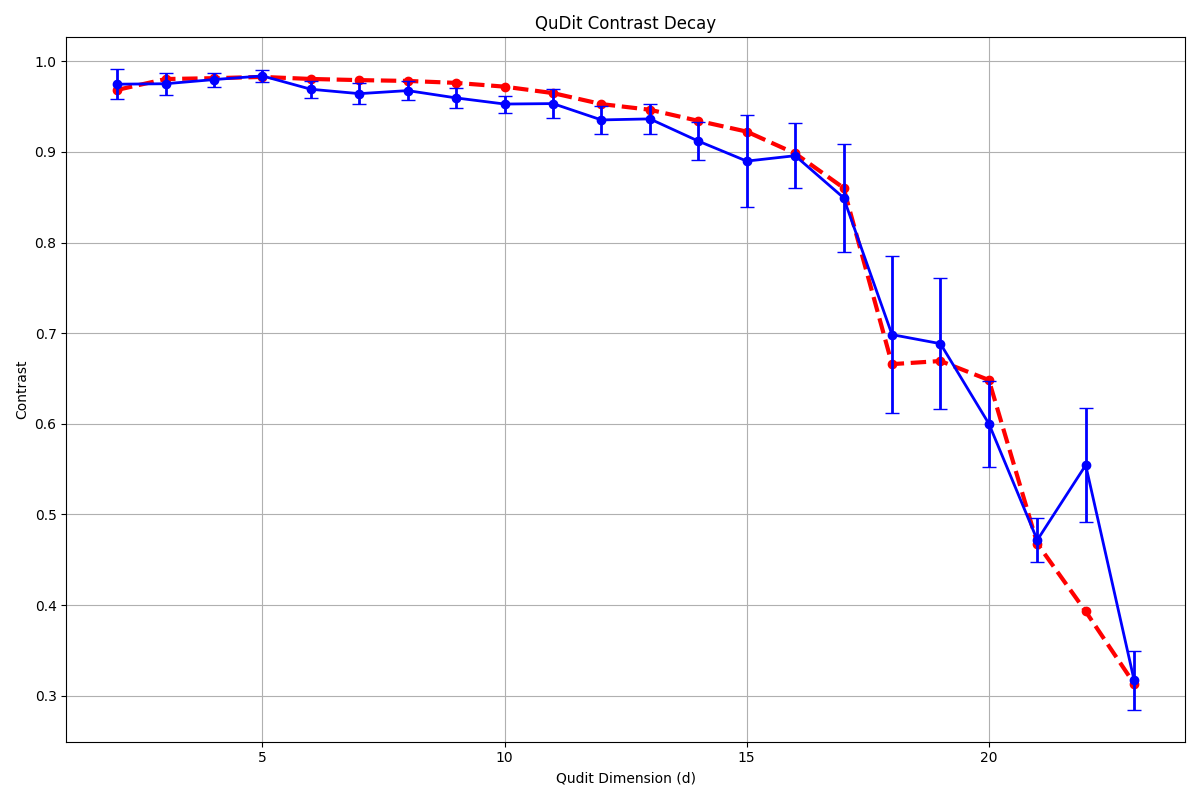

In [636]:
d_values =  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
unweighted_means= [0.9746243198941509, 0.9751331792118328, 0.9797303991429688, 0.9837478129419317, 0.9690606017845903, 0.9641878187262762, 0.9675687023658773, 0.9594827412225081, 0.9527347070014405, 0.9532257567061488, 0.9352135485420109, 0.9363541918033307, 0.9118685926204764, 0.8897933171677727, 0.8957499175744237, 0.8493528120901896, 0.6983903756295652, 0.6884042053391878, 0.6001455194916206, 0.47174465948903943, 0.5544135007733887, 0.31705795156468763]
unweighted_stds= [0.016373191318695125, 0.012330684111125057, 0.007710487534255474, 0.006268496962386803, 0.009434733545819859, 0.01130959042861035, 0.010533886493173694, 0.011161545617521584, 0.009387868943129585, 0.015799638069944895, 0.01538691348590878, 0.016951926914623078, 0.02080906329883904, 0.05102492568262053, 0.03592436216639484, 0.05927903410830684, 0.08698960254342508, 0.07209466766852173, 0.04747811360113549, 0.024157382573218956, 0.06296739268096378, 0.0324062711798922]

plt.figure(figsize = (12,8))
plt.plot(dimensions, np.array(contrasts_pi_t), 'o--',linewidth=3, color = 'red')
plt.errorbar(d_values, unweighted_means, yerr=unweighted_stds, fmt='o-', color='blue',
             label='Experimental Data', linewidth=2, capsize=5)
print(dimensions, contrasts)
plt.xlabel('Qudit Dimension (d)')
plt.ylabel('Contrast')
# plt.yscale('log')
plt.title('QuDit Contrast Decay')
plt.grid()
plt.tight_layout()
plt.show()

In [621]:
print(d_value_avg_pi_time)

{'17': nan, '2025-04-15 17:21:00': nan, '2025-04-15 23:23:00': nan, '2025-04-16 02:10:00': nan, '2025-04-16 04:45:00': nan, '2025-04-16 07:27:00': nan, '2025-04-15 18:21:00': nan, '2025-04-16 22:20:00': nan, '2025-04-17 09:11:00': nan, '2025-04-17 15:59:00': nan, '2025-04-17 19:18:00': nan, '2025-04-18 15:16:00': nan, '2025-04-18 19:19:00': nan, '2025-04-18 19:43:00': nan, '2025-04-18 22:50:00': nan, '2025-04-18 23:16:00': nan, '2025-05-20 23:26:00': nan, '2025-05-20 23:51:00': nan, '16': nan, '2025-04-16 18:18:00': nan, '2025-04-16 22:08:00': nan, '2025-04-17 09:01:00': nan, '2025-04-17 15:47:00': nan, '2025-04-17 19:05:00': nan, '2025-04-18 15:02:00': nan, '2025-04-18 19:07:00': nan, '2025-04-18 19:32:00': nan, '2025-04-18 22:39:00': nan, '2025-04-18 23:03:00': nan, '2025-05-20 22:56:00': nan, '2025-05-20 23:37:00': nan, '15': nan, '2025-04-15 20:42:00': nan, '2025-04-16 18:07:00': nan, '2025-04-16 21:55:00': nan, '2025-04-17 08:47:00': nan, '2025-04-17 15:35:00': nan, '2025-04-17 18

## 2D scan

In [227]:
ln_only = [0.9999094170794904, 0.9986870326874284, 0.9986505667446286, 0.9988211713736868, 0.9943466360681065, 0.9944307416849554, 0.9948724928731149, 0.9941058443476465, 0.9944975432007402, 0.9935163438219276, 0.9953040863398598, 0.9925980938883002, 0.9910792078087064, 0.9846350198658936, 0.9768914501717667, 0.9590531636449839, 0.6905802133648855]

In [397]:
import numpy as np
import matplotlib.pyplot as plt

dimension = [8]
ln_values = np.arange(1, 21, 0.5)  
cn_values = np.arange(1, 21,0.5)

contrast_matrix = np.zeros((len(ln_values), len(cn_values)))

for i, l in enumerate(ln_values):
    for j, c in enumerate(cn_values):
        ln = 1/l
        cn = 1/c
        bn = 1/3
        contrast = plot_contrast_decay(dimension, ln=ln, bn=bn, cn=cn)[0]
        contrast_matrix[i, j] = contrast

In [434]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Load previously saved data
filename = 'contrast_data_dim8_bn1over3.npz'
if not os.path.exists(filename):
    raise FileNotFoundError(f"{filename} not found. Make sure to run the initial script first.")

data = np.load(filename)
old_contrast_matrix = data['contrast_matrix']
old_ln_values = data['ln_values']
old_cn_values = data['cn_values']

# Define extended range
ln_values_full = np.arange(1, 31, 0.5)  # Up to 50 now
cn_values_full = np.arange(1, 31, 0.5)

# Initialize new matrix
contrast_matrix_full = np.full((len(ln_values_full), len(cn_values_full)), np.nan)

# Fill in the old values
for i, ln in enumerate(old_ln_values):
    for j, cn in enumerate(old_cn_values):
        idx_i = np.where(ln_values_full == ln)[0][0]
        idx_j = np.where(cn_values_full == cn)[0][0]
        contrast_matrix_full[idx_i, idx_j] = old_contrast_matrix[i, j]

# Start filling in only the new values
dimension = [8]
bn = 1 / 3

for i, l in enumerate(ln_values_full):
    for j, c in enumerate(cn_values_full):
        if np.isnan(contrast_matrix_full[i, j]):
            ln = 1 / l
            cn = 1 / c
            contrast = plot_contrast_decay(dimension, ln=ln, bn=bn, cn=cn)[0]
            contrast_matrix_full[i, j] = contrast

# Save updated data
np.savez('contrast_data_dim8_bn1over3_2.npz',
         contrast_matrix=contrast_matrix_full,
         ln_values=ln_values_full,
         cn_values=cn_values_full)


8 0.9909314075240939
8 0.9898855744291686
8 0.9905758101435529
8 0.9921848052000692
8 0.9892386538416169
8 0.9900226055350576
8 0.9899565760492647
8 0.9907450603191241
8 0.9922175225896659
8 0.9915044049028378
8 0.9900924845637777
8 0.9917596836374624
8 0.9928588450058927
8 0.9891823695117461
8 0.9923228277248288
8 0.9881664687715309
8 0.9905894025132492
8 0.9906808128689943
8 0.9920729699706505
8 0.9910143612298594
8 0.9937801197901287
8 0.996467053750202
8 0.9896032713828914
8 0.9951762384461437
8 0.9959223110967619
8 0.9952183446661909
8 0.9955452141530523
8 0.9940315398706147
8 0.9959672469266105
8 0.9960220117699761
8 0.9919580511775584
8 0.9945943960718303
8 0.9910791958014505
8 0.9946093474139278
8 0.9962372857177693
8 0.9955080134381875
8 0.9957512100612554
8 0.9941790468976058
8 0.9939161127037585
8 0.9947981411838214
8 0.997669454264166
8 0.9977035357294721
8 0.9954761950537395
8 0.9975205794647068
8 0.9975571046446724
8 0.997713169480402
8 0.9977621754640578
8 0.997116652893

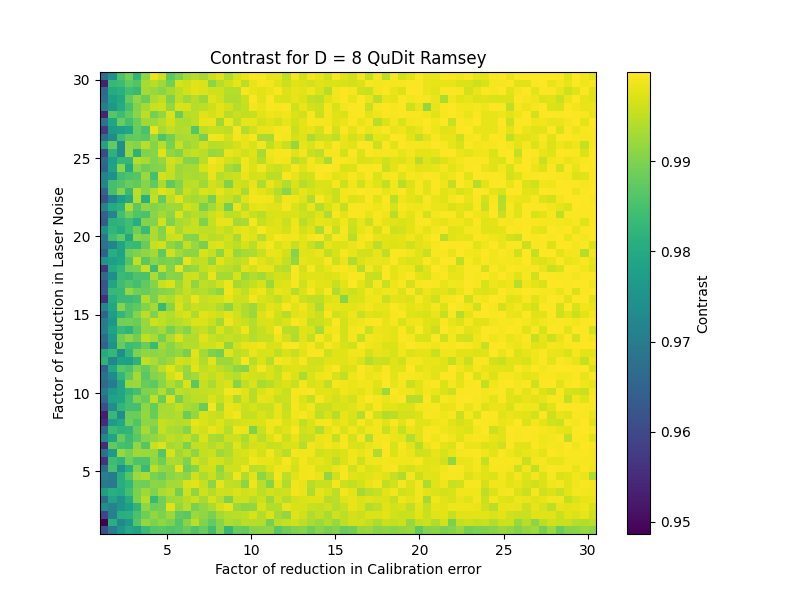

In [442]:
data = np.load('contrast_data_dim8_bn1over3_2.npz')
contrast_matrix = data['contrast_matrix']
ln_values = data['ln_values']
cn_values = data['cn_values']

plt.figure(figsize=(8, 6))
plt.imshow(contrast_matrix, origin='lower', extent=[
    cn_values[0], cn_values[-1], ln_values[0], ln_values[-1]
], aspect='auto', cmap='viridis')
plt.colorbar(label='Contrast')
plt.xlabel('Factor of reduction in Calibration error')
plt.ylabel('Factor of reduction in Laser Noise')
plt.title('Contrast for D = 8 QuDit Ramsey')
plt.show()

In [428]:
np.savez('contrast_data_dim8_bn1over3.npz', 
         contrast_matrix=contrast_matrix, 
         ln_values=ln_values, 
         cn_values=cn_values)


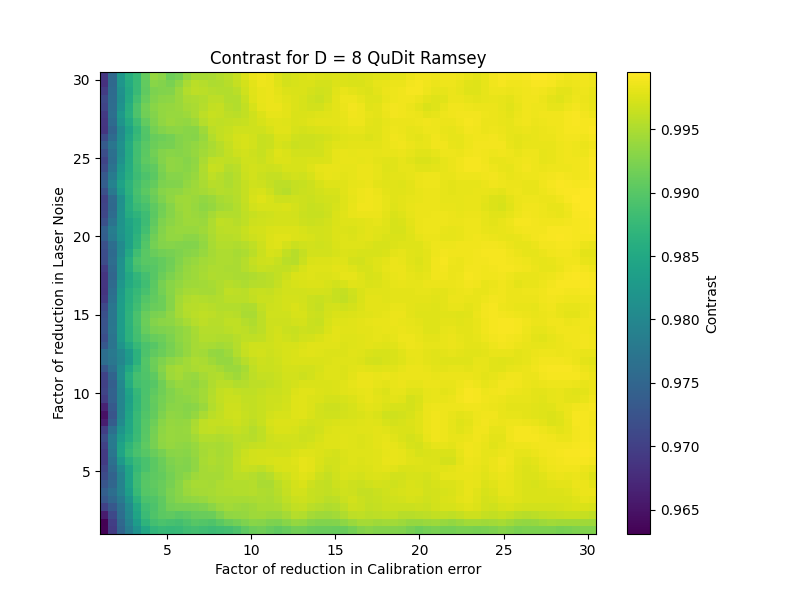

In [448]:
from scipy.ndimage import gaussian_filter

plt.figure(figsize=(8, 6))
smoothed_contrast = gaussian_filter(contrast_matrix, sigma=1.0)

extent = [cn_values[0], cn_values[-1], ln_values[0], ln_values[-1]]
im = plt.imshow(smoothed_contrast, origin='lower', extent=extent,
                aspect='auto', cmap='viridis', vmin=smoothed_contrast.min(), vmax=smoothed_contrast.max())

contour = plt.contour(
    cn_values, ln_values, smoothed_contrast, 
    levels=[0.9997], colors='red', linewidths=2
)
plt.clabel(contour, inline=True, fontsize=10, fmt='>0.9997')

plt.colorbar(im, label='Contrast')
plt.xlabel('Factor of reduction in Calibration error')
plt.ylabel('Factor of reduction in Laser Noise')
plt.title('Contrast for D = 8 QuDit Ramsey')
plt.show()

## Voigt Sampling

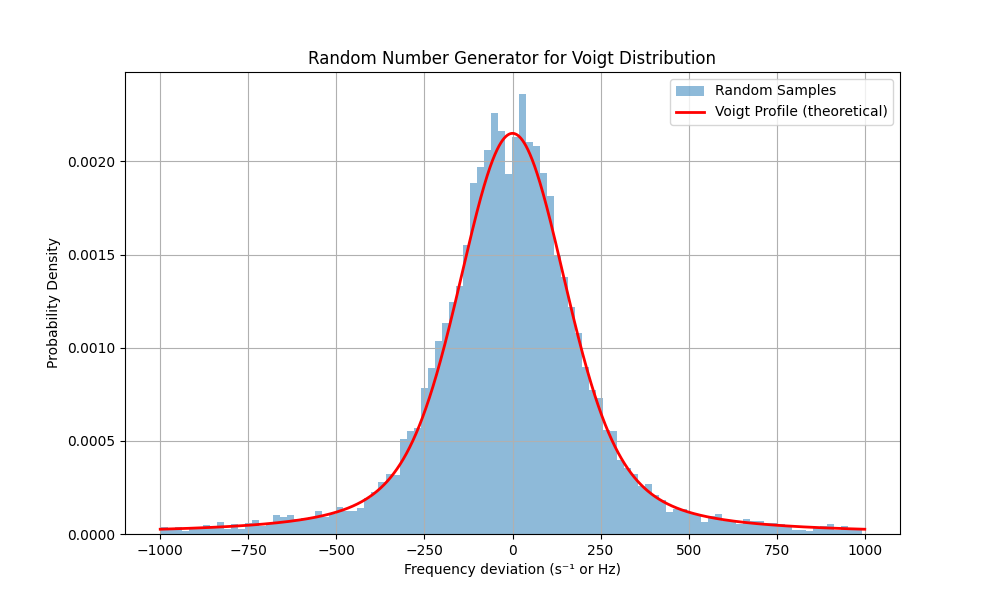

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import voigt_profile

T = 2*np.pi*1916.0e-6  
L = 2*np.pi*2054.0e-6 

sigma = np.sqrt(2) / T
gamma = 1.0 / L

def V(x):
    return voigt_profile(x, sigma, gamma)


x_min = -1000
x_max = 1000
res = 1000000  
x_vals = np.linspace(x_min, x_max, res)
dx = x_vals[1] - x_vals[0]

V_vals = V(x_vals)

cdf = np.cumsum(V_vals) * dx
cdf /= cdf[-1]  

def sample_voigt(n_samples):
    u = np.random.rand(n_samples)
    samples = np.interp(u, cdf, x_vals)
    return samples

n_samples = 10000 
samples = sample_voigt(n_samples)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=100, density=True, alpha=0.5, label='Random Samples')
plt.plot(x_vals, V_vals, 'r-', lw=2, label='Voigt Profile (theoretical)')
plt.xlabel('Frequency deviation (s⁻¹ or Hz)')
plt.ylabel('Probability Density')
plt.title('Random Number Generator for Voigt Distribution')
plt.legend()
plt.grid(True)
plt.show()


In [502]:
sample_voigt(1)

array([-1321.46036356])

In [159]:
x = 0
print(x + np.array([0,1,2]))

[0 1 2]


In [446]:
pulse_train_U1 = [[0, 3, -2], [0, 2, 1], [0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0, 2, 0], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2], [0, 2, -2], [-2, 2, -2], [-2, 3, -3], [-2, 4, -4]]


In [452]:
print(pulse_train_U1[::-1])

[[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1], [0, 2, 1], [0, 3, -2], [0, 2, 0], [2, 2, 0], [2, 4, 4], [2, 4, 3]]


In [ ]:
initial_state = [[2, 4, 3]]
 
pulse_train_U1 = [[2,4,4], [2,4,3], [2,4,2], [2,1,0], [2,2,0], [0,2,0], [0, 3, -2], [0, 2, 1], [0, 1, -1], [0, 2, -1], [0, 1, 1], [0, 3, -1], [0, 4, 1], [0, 2, 2], [0,2,-2], [0, 4, 0], [0, 3, 2], [0, 3, 0], [0, 4, -1], [0, 3, 1], [0, 4, -2]]
fractions_U1 = [0.05, 0.05263157894736842, 0.05555555555555555, 0.058823529411764705, 1, 1, 0.0625, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 
pulse_train_U2 = [[0, 4, -2], [0, 3, 1], [0, 4, -1], [0, 3, 0], [0, 3, 2], [0, 4, 0], [0, 2, -2], [0, 2, 2], [0, 4, 1], [0, 3, -1], [0, 1, 1], [0, 2, -1], [0, 1, -1], [0, 2, 1], [0, 3, -2], [0, 2, 0], [2, 2, 0], [2, 1, 0], [2, 4, 2], [2, 4, 3], [2, 4, 4]]
fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 1, 1, 0.058823529411764705, 0.05555555555555555, 0.05263157894736842, 0.05]
simulated_phase_mask_U2 = [19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 0, 0, 3, 2, 1]
fixed_phase_mask_U2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
 
s12_state_shelvings = []
s12_state_fractions = []
s12_state_fixed_phases = []
s12_state_simulated_phases = []
 
probe_trans = [[2, 4, 4], [2, 4, 3], [2, 4, 2], [2, 1, 0], [-2, 3, -2], [2, 2, 1], [-2, 1, -1], [1, 2, -1], [0, 1, 1], [-1, 3, -1], [1, 4, 1], [1, 2, 2], [0, 2, -2], [1, 4, 0], [1, 3, 2], [-1, 3, 0], [1, 4, -1], [0, 3, 1], [0, 4, -2]]
